## Predicting Critical Temperature of Superconducter Data maintained by Japan's National Institute for Materials Science(NIMS) 

#### Author and Developer: Jeffery Chieh Liu


Packages/Libraries used:
* reshape2 (for melt function to reshape data)
* psych (for advanced descriptive statistics)
* car (for Companion to Applied Regression functions) 
* GGally (for functions to reduce complexity in combining geometric objects with transformed data)  
* boot (for bootstrapping)
* lattice (for high-level data visualisation)
* glmnet (for lasso regression/regularization)
* ggplot2 (for graphing/plotting visualisations)
* cowplot (for creating publication-quality visualisations)
* gbm (for gradient boosting model)
* scales (for internal scaling infrastructure to ggplot2)
* grid (for graphics system)
* stats (for statistical calculation functions) 
* gridExtra (for user-level functions to work with grid visualisations) 
* RColorBrewer (for ready-to-use color palettes in creating visualisation graphics) 

# Table of Contents 

## [Inference & Exploratory Data Analysis](#Description)
* [Preliminary Tasks](#Preliminary Tasks)
* [1. Introduction](#Introduction)
* [2. Import and Load the required libraries](#Import and Load Required Libraries) 
* [3. Load and Read in the Dataset](#Load and Read in the Dataset)
* [4. Exploratory Data Analysis (EDA)](#Exploratory Data Analysis (EDA))
   * [4.1 Non-Graphical Exploratory Data Analysis (EDA)](#Non-Graphical Exploratory Data Analysis (EDA))
      * [4.1.1 Attributes Summary](#Attributes Summary)
      * [4.1.2 Number of unique values for each attribute](#Number of unique values for each attribute)
      * [4.1.3 Correlation Coefficients Analysis](#Correlation Coefficients Analysis)
   * [4.2 Graphical Exploratory Data Analysis (EDA)](#Graphical Exploratory Data Analysis (EDA))
      * [4.2.1 Boxplot Analysis](#Boxplot Analysis)
      * [4.2.2 Histograms Analysis](#Histograms Analysis) 
      * [4.2.3 Scatterplot Matrix Analysis](#Scatterplot Matrix Analysis) 
      * [4.2.4 Correlation Matrix Analysis](#Correlation Matrix Analysis)
* [5. Data preprocessing and Reformatting](#Data preprocessing and Reformatting)
   * [5.1 Multicollinearity Detection](#Multicollinearity Detection)
   * [5.2 Data Transformation for reducing skewness](#Data Transformation for reducing skewness)
* [6. Split the dataset into training set and testing set](#Split the dataset into training set and testing set)
   * [6.1 Initial dataset training set and testing set split](#Initial dataset training set and testing set split)
      * [6.1.1 Initial Dataset Training Set and Testing Set Split Exploratory Data Analysis](#Initial Dataset Training Set and Testing Set Split Exploratory Data Analysis)
   * [6.2 Feature selected dataset training set and testing set split](#Feature selected dataset training set and testing set split)
      * [6.2.1 Feature selected dataset Training Set and Testing Set Split Exploratory Data Analysis](#Feature selected dataset Training Set and Testing Set Split Exploratory Data Analysis)

## [Predictive Models](#Prediction)
* [7. Model Developments and Implementations](#Model Developments and Implementation)
   * [7.1 Linear Regression](#Linear Regression)
      * [7.1.1 Linear Regression Implementation](#Linear Regression Implementation)
         * [7.1.1.1 Linear Regression Benchmark Model using all features](#Linear Regression Benchmark Model using all features)
         * [7.1.1.2 Linear Regression fitting selected features to examine improvement and difference analysis](#Linear Regression fitting selected features to examine improvement and difference analysis)
      * [7.1.2 Linear Regression Predictions and Analysis](#Linear Regression Predictions and Analysis)
         * [7.1.2.1 Linear Regression Benchmark Model Predictions and Analysis](#Linear Regression Benchmark Model Predictions and Analysis)
         * [7.1.2.2 Feature Selected Linear Regression Model Predictions and Analysis](#Feature Selected Linear Regression Model Predictions and Analysis)
   * [7.2 Lasso Regression](#Lasso Regression)
      * [7.2.1 Lasso Regression Implementation](#Lasso Regression Implementation)
         * [7.2.1.1 Lasso Regression Benchmark Model using all features](#Lasso Regression Benchmark Model using all features)
         * [7.2.1.2 Lasso Regression fitting selected features to examine improvement and difference analysis](#Lasso Regression fitting selected features to examine improvement and difference analysis)
      * [7.2.2 Lasso Regression Predictions and Analysis](#Lasso Regression Predictions and Analysis)
         * [7.2.2.1 Lasso Regression Benchmark Model Predictions and Analysis](#Lasso Regression Benchmark Model Predictions and Analysis)
         * [7.2.2.2 Feature Selected Lasso Regression Model Predictions and Analysis](#Feature Selected Lasso Regression Model Predictions and Analysis)
   * [7.3 Gradient Boosting](#Gradient Boosting)
      * [7.3.1 Gradient Boosting Implementation](#Gradient Boosting Implementation)
         * [7.3.1.1 Gradient Boosting Benchmark Model using all features](#Gradient Boosting Benchmark Model using all features)
         * [7.3.1.2 Gradient Boosting fitting selected features to examine improvement and difference analysis](#Gradient Boosting fitting selected features to examine improvement and difference analysis)
      * [7.3.2 Gradient Boosting Model Predictions and Analysis](#Gradient Boosting Model Predictions and Analysis)
         * [7.3.2.1 Gradient Boosting Benchmark Model Predictions and Analysis](#Gradient Boosting Benchmark Model Predictions and Analysis)
         * [7.3.2.2 Feature Selected Gradient Boosting Model Predictions and Analysis](#Feature Selected Gradient Boosting Model Predictions and Analysis)

## [Model Comparisons, Results Analysis and Feature Selection Discussion](#Model Comparisons, Results Analysis and Feature Selection Discussion)
* [8. Model Comparison and Analysis](#Model Comparison and Analysis)
   * [8.1 Linear Regression Models Influence Analysis](#Linear Regression Models Influence Analysis)
      * [8.1.1 Linear Regression Benchmark Model Diagnostic Visualisation](#Linear Regression Benchmark Model Diagnostic Visualisation)
      * [8.1.2 Linear Regression Benchmark Model Influence Visualization](#Linear Regression Benchmark Model Influence Visualization)
      * [8.2.1 Feature Selected Linear Regression Model Diagnostic Visualisation](#Feature Selected Linear Regression Model Diagnostic Visualisation)
      * [8.2.2 Feature Selected Linear Regression Influence](#Feature Selected Linear Regression Influence)
   * [8.2 Tabulated benchmark models test prediction comparison and analysis](#Tabulated benchmark models test prediction comparison and analysis)
   * [8.3 Featured Selected models test prediction comparison and analysis](#Featured Selected models test prediction comparison and analysis)
* [9. Feature selection justification and prediction impact analysis](#Feature selection justification and prediction impact analysis)
* [10. Conclusion](#Conclusion)


### [References](#references)

# Inference & Exploratory Data Analysis
<a id="Description"></a>

## Preliminary Tasks
<a id="Preliminary Tasks"></a>

Firstly, as a preliminary step, the **following libraries** will be utilised throughout this `jupyter notebook file` **Predicton_Ct_Superconduct_Data_maintain_Japan_NIMS.ipynb**, thus, if they're not installed on the **local system** please run the following code block to install all the required `packages/libraries`.

In [ ]:
# the following packages/libraries are utilisied throughout this jupyter notebook file 
# `Predicton_Ct_Superconduct_Data_maintain_Japan_NIMS.ipynb`, thus, if they're not installed locally on the system, please run 
# this code/cell block 

install.packages("reshape2") # installs the library/package reshape2
install.packages("psych") # installs the library/package psych
install.packages("ggplot2") # installs the library/package ggplot2
install.packages("cowplot") # installs the library/package cowplot
install.packages("gridExtra") # installs the library/package gridExtra
install.packages("GGally") # installs the library/package GGally
install.packages("lattice") # installs the library/package lattice
install.packages("glmnet") # installs the library/package glmnet
install.packages("car") # installs the library/package car
install.packages("gbm") # installs the library/package gbm
install.packages("scales") # installs the library/package scales 
install.packages("boot") # installs the library/package boots
install.packages("stats") # installs the library/package stats
install.packages("grid") # installs the library/package grid
install.packages("RColorBrewer") # installs the library/package  RColorBrewer

## 1. Introduction
<a id="Introduction"></a>

This `jupyter notebook` **Predicton_Ct_Superconduct_Data_maintain_Japan_NIMS** provides the **source code** with accompanying comprehensive explanation on the process which was utilised for developing various models in prediciting the **critical temperature (Tc)** of a superconductor using a dataset from **Superconducting Material Database** maintained/provided by **Japan's National Institute for Materials Science (NIMS)**. The report is segemented into three main sections:
* **Inference**
* **Predictive Models**
* **Model Comparisons, Results Analysis and Feature Selection Discussion**



The first section **Inference** within this `jupyter notebook` **Predicton_Ct_Superconduct_Data_maintain_Japan_NIMS** illustrates the procedure and methodology utilised in performing `non-graphical Exploratory Data Analysis (EDA)` and `graphical Exploratory Data Analysis (EDA)` on the original dataset **train.csv**. 



The second section **Predictive Models** within this `jupyter notebook` **Predicton_Ct_Superconduct_Data_maintain_Japan_NIMS** implements and analyses the accuracy of three different models for predicting the **critical temperature (Tc)** of a superconductor. The three models implemented are:

* **Linear Regression**
* **Lasso (L1) Regression**
* **Gradient Boosting** 



These models were chosen based on their **varying degrees of accuracy**, where **Linear Regression** models are regarded as **highly interpretable** but **not very accuracte**. Conversely, **Lasso (L1) Regression has medium intrepretability and medium accuracy**, additionally due to the **large number of features/variables (82 features/variables) in the dataset train.csv** Lasso (L1) Regression was implemented to validate its **variable selection** and **regularization** capabilities. Lastly, **graident boosting** model was used as it's a **highly accurate but not very interpretable model**, thus, this `jupyter notebook` **Predicton_Ct_Superconduct_Data_maintain_Japan_NIMS** validates its accuracy with regards to **Linear Regression model** and **Lasso (L1) Regression model**.   


Each of these models will have two sub-models developed where one is a **benchmark model** which is trained with **all the features within the original dataset `train.csv`** and alternatively a **feature selected model** will also be trained with **all selected features from performing exploratory data analysis (EDA) throughout the `Inference/EDA` section**. Respectively these **two sub-models** for each **model type** will be compared utilising **model evaluation metrics** such as:

* **Mean Squared Error (MSE)**
* **Root Mean Squared Error (RMSE)** 
* **Residual Sum of Squares (RSS)**
* **Total Sum of Squares (TSS)**
* **R-Square**


Lastly, the third section **Model Comparisons, Results Analysis and Feature Selection Discussion** within this `jupyter notebook` **Predicton_Ct_Superconduct_Data_maintain_Japan_NIMS** provides a comprehensive **non-graphical** and **graphical** statistical analysis in comparing the three models **Linear Regression**, **Lasso (L1) Regression** and **Gradient Boosting** in their capatibilities and accuracy for predicting the **critical temperature (Tc) of a superconductor**. Additionally, justification will also be provided on the choice of selection for the different **features/variables** from the dataset **train.csv**. 

## 2. Import and Load the required libraries 
<a id="Import and Load Required Libraries"></a>

Now all the libraries which will be utilisied throughout this `jupyter notebook` **Predicton_Ct_Superconduct_Data_maintain_Japan_NIMS** will be loaded using the **library()** function. 

In [265]:
# load the required libraries
library(reshape2) # load reshape2 library for melt function to reshape data
library(psych) # load psych library for advanced descriptive statistics
library(car) # load car library for Companion to Applied Regression functions 
library(GGally) # load GGally library for functions to reduce complexity in combining geometric objects with transformed data
library(boot) # load boot library for bootstrapping 
library(lattice) # load lattice library for high-level data visualisation 
library(glmnet) # load glmnet for lasso regression/regulariszation
library(ggplot2) # load ggplot2 library for graphing/plotting visualisations
library(cowplot) # load cowplot library for creating publication-quality visualisations
library(gbm) # load gbm library for gradient boosting model 
library(scales) # load scales library for internal scaling infrastructure to ggplot2
library(grid) # load grid library for graphics system 
library(stats) # load stats library for statistical calculation functions 
library(gridExtra) # load gridExtra library for user-level functions to work with grid visualisations
library(RColorBrewer) # load RColorBrewer library for ready-to-use color palettes in creating visualisation graphics
options(warn=-1)


Attaching package: 'scales'

The following objects are masked from 'package:psych':

    alpha, rescale



## 3. Load and Read in the Dataset
<a id="Load and Read in the Dataset"></a>

Prior to performing **exploratory data analysis (EDA)**, first, load in the dataset **train.csv** which is located under the folder name `superconduct`. The dataset will be loaded as a **dataframe** under the variable name `dataset`. 

In [484]:
# load and read the dataset train.csv into a dataframe 
dataset <- read.csv("./superconduct/train.csv", header = TRUE) # dataframe 

## 4. Exploratory Data Analysis (EDA) 
<a id="Exploratory Data Analysis (EDA)"></a>

Now **non-graphical Exploratory Data Analysis (EDA)** and **graphical Exploratory Data Analysis (EDA)** will be performed on the dataset `train.csv` which is stored as a dataframe under the variable name **dataset**. 

### 4.1 Non-Graphical Exploratory Data Analysis (EDA) 
<a id="Non-Graphical Exploratory Data Analysis (EDA)"></a>

Firstly, the number of **records** and **attributes** in the dataset `train.csv` will be examined using **dim()** function on the dataframe `dataset`. 

In [3]:
# examine the number of rows x columns in the dataset train.csv which is loaded as a dataframe under the variable name dataset 

cat("The superconduct dataset \"train.csv\" dataset which is stored as a dataframe under the variable name dataset has", 
    dim(dataset)[1], "records each with", dim(dataset)[2], "attributes.") # number of rows x columns 

The superconduct dataset "train.csv" dataset which is stored as a dataframe under the variable name dataset has 21263 records each with 82 attributes.

From the output it can be observed that the dataset **train.csv** which is stored as a dataframe under the variable name `dataset` has **21263 records** and **82 attributes**. 

Now the column names for each of these **82 attributes** will be examined using the function **names()**. 

In [4]:
# examine all the column names in the dataset train.csv which is loaded as a dataframe under the variable name dataset for 
# referencing 
names(dataset) # all the column names in the dataset train.csv

[1] "number_of_elements"              "mean_atomic_mass"               
 [3] "wtd_mean_atomic_mass"            "gmean_atomic_mass"              
 [5] "wtd_gmean_atomic_mass"           "entropy_atomic_mass"            
 [7] "wtd_entropy_atomic_mass"         "range_atomic_mass"              
 [9] "wtd_range_atomic_mass"           "std_atomic_mass"                
[11] "wtd_std_atomic_mass"             "mean_fie"                       
[13] "wtd_mean_fie"                    "gmean_fie"                      
[15] "wtd_gmean_fie"                   "entropy_fie"                    
[17] "wtd_entropy_fie"                 "range_fie"                      
[19] "wtd_range_fie"                   "std_fie"                        
[21] "wtd_std_fie"                     "mean_atomic_radius"             
[23] "wtd_mean_atomic_radius"          "gmean_atomic_radius"            
[25] "wtd_gmean_atomic_radius"         "entropy_atomic_radius"          
[27] "wtd_entropy_atomic_radius"       "range_atomic_radius"            
[29] "wtd_range_atomic_radius"         "std_atomic_radius"              
[31] "wtd_std_atomic_radius"           "mean_Density"                   
[33] "wtd_mean_Density"                "gmean_Density"                  
[35] "wtd_gmean_Density"               "entropy_Density"                
[37] "wtd_entropy_Density"             "range_Density"                  
[39] "wtd_range_Density"               "std_Density"                    
[41] "wtd_std_Density"                 "mean_ElectronAffinity"          
[43] "wtd_mean_ElectronAffinity"       "gmean_ElectronAffinity"         
[45] "wtd_gmean_ElectronAffinity"      "entropy_ElectronAffinity"       
[47] "wtd_entropy_ElectronAffinity"    "range_ElectronAffinity"         
[49] "wtd_range_ElectronAffinity"      "std_ElectronAffinity"           
[51] "wtd_std_ElectronAffinity"        "mean_FusionHeat"                
[53] "wtd_mean_FusionHeat"             "gmean_FusionHeat"               
[55] "wtd_gmean_FusionHeat"            "entropy_FusionHeat"             
[57] "wtd_entropy_FusionHeat"          "range_FusionHeat"               
[59] "wtd_range_FusionHeat"            "std_FusionHeat"                 
[61] "wtd_std_FusionHeat"              "mean_ThermalConductivity"       
[63] "wtd_mean_ThermalConductivity"    "gmean_ThermalConductivity"      
[65] "wtd_gmean_ThermalConductivity"   "entropy_ThermalConductivity"    
[67] "wtd_entropy_ThermalConductivity" "range_ThermalConductivity"      
[69] "wtd_range_ThermalConductivity"   "std_ThermalConductivity"        
[71] "wtd_std_ThermalConductivity"     "mean_Valence"                   
[73] "wtd_mean_Valence"                "gmean_Valence"                  
[75] "wtd_gmean_Valence"               "entropy_Valence"                
[77] "wtd_entropy_Valence"             "range_Valence"                  
[79] "wtd_range_Valence"               "std_Valence"                    
[81] "wtd_std_Valence"                 "critical_temp"

From the observed attributes/variables column names, the following names were too long, thus, will be abbreviated and renamed: 
- **mean_atomic_mass**
- **wtd_mean_atomic_mass**
- **gmean_atomic_mass**
- **wtd_gmean_atomic_mass**
- **entropy_atomic_mass**
- **wtd_entropy_atomic_mass**
- **range_atomic_mass**
- **wtd_range_atomic_mass**
- **std_atomic_mass**
- **wtd_std_atomic_mass**

- **mean_fie** 
- **wtd_mean_fie** 
- **gmean_fie** 
- **wtd_gmean_fie** 
- **entropy_fie** 
- **wtd_entropy_fie** 
- **range_fie** 
- **wtd_range_fie** 
- **std_fie** 
- **wtd_std_fie** 


- **mean_atomic_radius**
- **wtd_mean_atomic_radius**
- **gmean_atomic_radius**
- **wtd_gmean_atomic_radius**
- **entropy_atomic_radius**
- **wtd_entropy_atomic_radius**
- **range_atomic_radius**
- **wtd_range_atomic_radius**
- **std_atomic_radius**
- **wtd_std_atomic_radius**


- **mean_ElectronAffinity** 
- **wtd_mean_ElectronAffinity** 
- **gmean_ElectronAffinity** 
- **wtd_gmean_ElectronAffinity** 
- **entropy_ElectronAffinity** 
- **wtd_entropy_ElectronAffinity** 
- **range_ElectronAffinity** 
- **wtd_range_ElectronAffinity** 
- **std_ElectronAffinity** 
- **wtd_std_ElectronAffinity** 


- **mean_FusionHeat** 
- **wtd_mean_FusionHeat** 
- **gmean_FusionHeat** 
- **wtd_gmean_FusionHeat** 
- **entropy_FusionHeat** 
- **wtd_entropy_FusionHeat** 
- **range_FusionHeat** 
- **wtd_range_FusionHeat** 
- **std_FusionHeat** 
- **wtd_std_FusionHeat** 


- **mean_ThermalConductivity**
- **wtd_mean_ThermalConductivity**
- **gmean_ThermalConductivity**
- **wtd_gmean_ThermalConductivity**
- **entropy_ThermalConductivity**
- **wtd_entropy_ThermalConductivity**
- **range_ThermalConductivity**
- **wtd_range_ThermalConductivity**
- **std_ThermalConductivity**
- **wtd_std_ThermalConductivity** 

- **mean_Valence**
- **wtd_mean_Valence** 
- **gmean_Valence**
- **wtd_gmean_Valence**
- **entropy_Valence**
- **wtd_entropy_Valence**
- **range_Valence**
- **wtd_range_Valence**
- **std_Valence**
- **wtd_std_Valence**


Thus, these columns will be abbreviated and renamed as: 
- **mean_am** which is at `column` **2** in the dataset **train.csv** which is stored as a dataframe under the variable name **dataset**
- **wtd_mean_am** which is at `column` **3** in the dataset **train.csv** which is stored as a dataframe under the variable name **dataset**
- **gmean_am** which is at `column` **4** in the dataset **train.csv** which is stored as a dataframe under the variable name **dataset**
- **wtd_gmean_am** which is at `column` **5** in the dataset **train.csv** which is stored as a dataframe under the variable name **dataset**
- **entropy_am** which is at `column` **6** in the dataset **train.csv** which is stored as a dataframe under the variable name **dataset**
- **wtd_entropy_am** which is at `column` **7** in the dataset **train.csv** which is stored as a dataframe under the variable name **dataset**
- **range_am** which is at `column` **8** in the dataset **train.csv** which is stored as a dataframe under the variable name **dataset**
- **wtd_range_am** which is at `column` **9** in the dataset **train.csv** which is stored as a dataframe under the variable name **dataset**
- **std_am** which is at `column` **10** in the dataset **train.csv** which is stored as a dataframe under the variable name **dataset**
- **wtd_std_am** which is at `column` **11** in the dataset **train.csv** which is stored as a dataframe under the variable name **dataset**


- **mean_f** which is at `column` **12** in the dataset **train.csv** which is stored as a dataframe under the variable name **dataset**
- **wtd_mean_f** which is at `column` **13** in the dataset **train.csv** which is stored as a dataframe under the variable name **dataset**
- **gmean_f** which is at `column` **14** in the dataset **train.csv** which is stored as a dataframe under the variable name **dataset** 
- **wtd_gmean_f** which is at `column` **15** in the dataset **train.csv** which is stored as a dataframe under the variable name **dataset** 
- **entropy_f** which is at `column` **16** in the dataset **train.csv** which is stored as a dataframe under the variable name **dataset** 
- **wtd_entropy_f** which is at `column` **17** in the dataset **train.csv** which is stored as a dataframe under the variable name **dataset** 
- **range_f** which is at `column` **18** in the dataset **train.csv** which is stored as a dataframe under the variable name **dataset**
- **wtd_range_f** which is at `column` **19** in the dataset **train.csv** which is stored as a dataframe under the variable name **dataset** 
- **std_f** which is at `column` **20** in the dataset **train.csv** which is stored as a dataframe under the variable name **dataset**
- **wtd_std_f** which is at `column` **21** in the dataset **train.csv** which is stored as a dataframe under the variable name **dataset** 


- **mean_ar** which is at `column` **22** in the dataset **train.csv** which is stored as a dataframe under the variable name **dataset**
- **wtd_mean_ar** which is at `column` **23** in the dataset **train.csv** which is stored as a dataframe under the variable name **dataset**
- **gmean_ar** which is at `column` **24** in the dataset **train.csv** which is stored as a dataframe under the variable name **dataset**
- **wtd_gmean_ar** which is at `column` **25** in the dataset **train.csv** which is stored as a dataframe under the variable name **dataset**
- **entropy_ar** which is at `column` **26** in the dataset **train.csv** which is stored as a dataframe under the variable name **dataset**
- **wtd_entropy_ar** which is at `column` **27** in the dataset **train.csv** which is stored as a dataframe under the variable name **dataset**
- **range_ar** which is at `column` **28** in the dataset **train.csv** which is stored as a dataframe under the variable name **dataset**
- **wtd_range_ar** which is at `column` **29** in the dataset **train.csv** which is stored as a dataframe under the variable name **dataset**
- **std_ar** which is at `column` **30** in the dataset **train.csv** which is stored as a dataframe under the variable name **dataset**
- **wtd_std_ar** which is at `column` **31** in the dataset **train.csv** which is stored as a dataframe under the variable name **dataset**


- **mean_EA** which is at `column` **42** in the dataset **train.csv** which is stored as a dataframe under the variable name **dataset** 
- **wtd_mean_EA** which is at `column` **43** in the dataset **train.csv** which is stored as a dataframe under the variable name **dataset** 
- **gmean_EA** which is at `column` **44** in the dataset **train.csv** which is stored as a dataframe under the variable name **dataset**
- **wtd_gmean_EA** which is at `column` **45** in the dataset **train.csv** which is stored as a dataframe under the variable name **dataset** 
- **entropy_EA** which is at `column` **46** in the dataset **train.csv** which is stored as a dataframe under the variable name **dataset** 
- **wtd_entropy_EA** which is at `column` **47** in the dataset **train.csv** which is stored as a dataframe under the variable name **dataset** 
- **range_EA** which is at `column` **48** in the dataset **train.csv** which is stored as a dataframe under the variable name **dataset** 
- **wtd_range_EA** which is at `column` **49** in the dataset **train.csv** which is stored as a dataframe under the variable name **dataset** 
- **std_EA** which is at `column` **50** in the dataset **train.csv** which is stored as a dataframe under the variable name **dataset** 
- **wtd_std_EA** which is at `column` **51** in the dataset **train.csv** which is stored as a dataframe under the variable name **dataset** 


- **mean_FH** which is at `column` **52** in the dataset **train.csv** which is stored as a dataframe under the variable name **dataset** 
- **wtd_mean_FH** which is at `column` **53** in the dataset **train.csv** which is stored as a dataframe under the variable name **dataset** 
- **gmean_FH** which is at `column` **54** in the dataset **train.csv** which is stored as a dataframe under the variable name **dataset** 
- **wtd_gmean_FH** which is at `column` **55** in the dataset **train.csv** which is stored as a dataframe under the variable name **dataset** 
- **entropy_FH** which is at `column` **56** in the dataset **train.csv** which is stored as a dataframe under the variable name **dataset** 
- **wtd_entropy_FH** which is at `column` **57** in the dataset **train.csv** which is stored as a dataframe under the variable name **dataset** 
- **range_FH** which is at `column` **58** in the dataset **train.csv** which is stored as a dataframe under the variable name **dataset** 
- **wtd_range_FH** which is at `column` **59** in the dataset **train.csv** which is stored as a dataframe under the variable name **dataset** 
- **std_FH** which is at `column` **60** in the dataset **train.csv** which is stored as a dataframe under the variable name **dataset** 
- **wtd_std_FH** which is at `column` **61** in the dataset **train.csv** which is stored as a dataframe under the variable name **dataset** 


- **mean_TC** which is at `column` **62** in the dataset **train.csv** which is stored as a dataframe under the variable name **dataset**
- **wtd_mean_TC** which is at `column` **63** in the dataset **train.csv** which is stored as a dataframe under the variable name **dataset**
- **gmean_TC** which is at `column` **64** in the dataset **train.csv** which is stored as a dataframe under the variable name **dataset**
- **wtd_gmean_TC** which is at `column` **65** in the dataset **train.csv** which is stored as a dataframe under the variable name **dataset**
- **entropy_TC** which is at `column` **66** in the dataset **train.csv** which is stored as a dataframe under the variable name **dataset**
- **wtd_entropy_TC** which is at `column` **67** in the dataset **train.csv** which is stored as a dataframe under the variable name **dataset**
- **range_TC** which is at `column` **68** in the dataset **train.csv** which is stored as a dataframe under the variable name **dataset**
- **wtd_range_TC** which is at `column` **69** in the dataset **train.csv** which is stored as a dataframe under the variable name **dataset**
- **std_TC** which is at `column` **70** in the dataset **train.csv** which is stored as a dataframe under the variable name **dataset**
- **wtd_std_TC** which is at `column` **71** in the dataset **train.csv** which is stored as a dataframe under the variable name **dataset**


- **mean_V** which is at `column` **72** in the dataset **train.csv** which is stored as a dataframe under the variable name **dataset**
- **wtd_mean_V** which is at `column` **73** in the dataset **train.csv** which is stored as a dataframe under the variable name **dataset** 
- **gmean_V** which is at `column` **74** in the dataset **train.csv** which is stored as a dataframe under the variable name **dataset**
- **wtd_gmean_V** which is at `column` **75** in the dataset **train.csv** which is stored as a dataframe under the variable name **dataset**
- **entropy_V** which is at `column` **76** in the dataset **train.csv** which is stored as a dataframe under the variable name **dataset**
- **wtd_entropy_V** which is at `column` **77** in the dataset **train.csv** which is stored as a dataframe under the variable name **dataset**
- **range_V** which is at `column` **78** in the dataset **train.csv** which is stored as a dataframe under the variable name **dataset**
- **wtd_range_V** which is at `column` **79** in the dataset **train.csv** which is stored as a dataframe under the variable name **dataset**
- **std_V** which is at `column` **80** in the dataset **train.csv** which is stored as a dataframe under the variable name **dataset**
- **wtd_std_V** which is at `column` **81** in the dataset **train.csv** which is stored as a dataframe under the variable name **dataset**

Therefore, a total of **70 columns** in the dataset **train.csv** which is stored as a dataframe under the variable name **dataset** will be abbreviated to their respective specified names. 

In [485]:
# renaming all the columns which are too long in the dataset `train.csv` which is stored as a dataframe under the variable name 
# `dataset` using column indexing 
names(dataset)[c(2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,42,43,44,45,46,47,48,49,50,
                 51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81)] <- c(
                      "mean_am", "wtd_mean_am", "gmean_am", "wtd_gmean_am", "entropy_am", "wtd_entropy_am", "range_am", 
                      "wtd_range_am", "std_am", "wtd_std_am", "mean_f", "wtd_mean_f", "gmean_f", "wtd_gmean_f", 
                      "entropy_f", "wtd_entropy_f", "range_f", "wtd_range_f", "std_f", "wtd_std_f", "mean_ar", "wtd_mean_ar", 
                      "gmean_ar", "wtd_gmean_ar", "entropy_ar", "wtd_entropy_ar", "range_ar", "wtd_range_ar", "std_ar", 
                      "wtd_std_ar", "mean_EA", "wtd_mean_EA", "gmean_EA", "wtd_gmean_EA", "entropy_EA", "wtd_entropy_EA", 
                      "range_EA", "wtd_range_EA", "std_EA", "wtd_std_EA", "mean_FH", "wtd_mean_FH", "gmean_FH", "wtd_gmean_FH", 
                      "entropy_FH", "wtd_entropy_FH", "range_FH", "wtd_range_FH", "std_FH", "wtd_std_FH", "mean_TC", 
                      "wtd_mean_TC", "gmean_TC", "wtd_gmean_TC", "entropy_TC", "wtd_entropy_TC", "range_TC", "wtd_range_TC", 
                      "std_TC", "wtd_std_TC", "mean_V", "wtd_mean_V", "gmean_V", "wtd_gmean_V", "entropy_V", "wtd_entropy_V", 
                      "range_V", "wtd_range_V", "std_V", "wtd_std_V")

Next the **first six rows** in the dataset **train.csv** which is stored as a dataframe under the variable name `dataset` will be examined to verify and validate that the **attribute names** were **abbreviated correctly**. Additionally, the values with for each **attribute** will also be examined to provide a general picture on the **potential range of values** and **attribute types**.

In [6]:
# examine the first six rows of the dataset train.csv which is loaded under the variable name "dataset" 
head(dataset) # examine first six rows 

number_of_elements mean_am  wtd_mean_am gmean_am wtd_gmean_am entropy_am
1 4                  88.94447 57.86269    66.36159 36.11661     1.181795  
2 5                  92.72921 58.51842    73.13279 36.39660     1.449309  
3 4                  88.94447 57.88524    66.36159 36.12251     1.181795  
4 4                  88.94447 57.87397    66.36159 36.11956     1.181795  
5 4                  88.94447 57.84014    66.36159 36.11072     1.181795  
6 4                  88.94447 57.79504    66.36159 36.09893     1.181795  
  wtd_entropy_am range_am wtd_range_am std_am   ... wtd_mean_V gmean_V 
1 1.0623955      122.9061 31.79492     51.96883 ... 2.257143   2.213364
2 1.0577551      122.9061 36.16194     47.09463 ... 2.257143   1.888175
3 0.9759805      122.9061 35.74110     51.96883 ... 2.271429   2.213364
4 1.0222909      122.9061 33.76801     51.96883 ... 2.264286   2.213364
5 1.1292237      122.9061 27.84874     51.96883 ... 2.242857   2.213364
6 1.2252028      122.9061 20.68746     51.96883 ... 2.214286   2.213364
  wtd_gmean_V entropy_V wtd_entropy_V range_V wtd_range_V std_V     wtd_std_V
1 2.219783    1.368922  1.066221      1       1.085714    0.4330127 0.4370588
2 2.210679    1.557113  1.047221      2       1.128571    0.6324555 0.4686063
3 2.232679    1.368922  1.029175      1       1.114286    0.4330127 0.4446966
4 2.226222    1.368922  1.048834      1       1.100000    0.4330127 0.4409521
5 2.206963    1.368922  1.096052      1       1.057143    0.4330127 0.4288095
6 2.181543    1.368922  1.141474      1       1.000000    0.4330127 0.4103259
  critical_temp
1 29           
2 26           
3 19           
4 22           
5 23           
6 23

Similarly the **last six rows** in the dataset **train.csv** which is stored as a dataframe under the variable name `dataset` will be examined to observe the values with for each **attribute**, thus, providing a general picture on the **potential range of values** and **attribute types**.

In [7]:
# examine the last six rows of the dataset train.csv which is loaded under the variable name "dataset" 
tail(dataset) # examine last six rows 

number_of_elements mean_am   wtd_mean_am gmean_am wtd_gmean_am entropy_am
21258 3                   89.38983 89.38983    63.69471 63.69471     0.7825737 
21259 4                  106.95788 53.09577    82.51538 43.13556     1.1771448 
21260 5                   92.26674 49.02137    64.81266 32.86775     1.3232866 
21261 2                   99.66319 95.60910    99.43388 95.46432     0.6908472 
21262 2                   99.66319 97.09560    99.43388 96.90108     0.6908472 
21263 3                   87.46833 86.85850    82.55576 80.45872     1.0412701 
      wtd_entropy_am range_am  wtd_range_am std_am   ... wtd_mean_V gmean_V 
21258 0.7825737      164.13150 54.710500    73.15689 ... 4.666667   4.578857
21259 1.2541187      146.88130 15.504479    65.76408 ... 3.555556   3.223710
21260 1.5716301      188.38390  7.353333    69.23266 ... 2.047619   2.168944
21261 0.5301975       13.51362 53.041104     6.75681 ... 4.800000   4.472136
21262 0.6408830       13.51362 31.115202     6.75681 ... 4.690000   4.472136
21263 0.8952292       71.75500 43.144000    29.90528 ... 4.500000   4.762203
      wtd_gmean_V entropy_V wtd_entropy_V range_V wtd_range_V std_V    
21258 4.578857    1.0789922 1.0789922     2       0.6666667   0.9428090
21259 3.519911    1.3778195 0.9136580     1       2.1688889   0.4330127
21260 2.038991    1.5941667 1.3372458     1       0.9047619   0.4000000
21261 4.781762    0.6869616 0.4505612     1       3.2000000   0.5000000
21262 4.665819    0.6869616 0.5776012     1       2.2100000   0.5000000
21263 4.242641    1.0549202 0.9701158     3       1.8000000   1.4142136
      wtd_std_V critical_temp
21258 0.9428090   3.43       
21259 0.4969040   2.44       
21260 0.2129589 122.10       
21261 0.4000000   1.98       
21262 0.4624932   1.84       
21263 1.5000000  12.80

In [8]:
# display and examine the structure of dataset train.csv which is stored as a dataframe under the variable name "dataset"
str(dataset) # attributes summary 

'data.frame':	21263 obs. of  82 variables:
 $ number_of_elements : int  4 5 4 4 4 4 4 4 4 4 ...
 $ mean_am            : num  88.9 92.7 88.9 88.9 88.9 ...
 $ wtd_mean_am        : num  57.9 58.5 57.9 57.9 57.8 ...
 $ gmean_am           : num  66.4 73.1 66.4 66.4 66.4 ...
 $ wtd_gmean_am       : num  36.1 36.4 36.1 36.1 36.1 ...
 $ entropy_am         : num  1.18 1.45 1.18 1.18 1.18 ...
 $ wtd_entropy_am     : num  1.062 1.058 0.976 1.022 1.129 ...
 $ range_am           : num  123 123 123 123 123 ...
 $ wtd_range_am       : num  31.8 36.2 35.7 33.8 27.8 ...
 $ std_am             : num  52 47.1 52 52 52 ...
 $ wtd_std_am         : num  53.6 54 53.7 53.6 53.6 ...
 $ mean_f             : num  775 766 775 775 775 ...
 $ wtd_mean_f         : num  1010 1011 1011 1011 1010 ...
 $ gmean_f            : num  718 721 718 718 718 ...
 $ wtd_gmean_f        : num  938 939 939 939 937 ...
 $ entropy_f          : num  1.31 1.54 1.31 1.31 1.31 ...
 $ wtd_entropy_f      : num  0.791 0.807 0.774 0.783 0.805 

In [9]:
# Return the summary statistics for each of the variables in the dataset train.csv which is stored under the variable name 
# dataset 
summary(dataset) # summary statistics 

 number_of_elements    mean_am         wtd_mean_am         gmean_am      
 Min.   :1.000      Min.   :  6.941   Min.   :  6.423   Min.   :  5.321  
 1st Qu.:3.000      1st Qu.: 72.458   1st Qu.: 52.144   1st Qu.: 58.041  
 Median :4.000      Median : 84.923   Median : 60.697   Median : 66.362  
 Mean   :4.115      Mean   : 87.558   Mean   : 72.988   Mean   : 71.291  
 3rd Qu.:5.000      3rd Qu.:100.404   3rd Qu.: 86.104   3rd Qu.: 78.117  
 Max.   :9.000      Max.   :208.980   Max.   :208.980   Max.   :208.980  
  wtd_gmean_am       entropy_am     wtd_entropy_am      range_am     
 Min.   :  1.961   Min.   :0.0000   Min.   :0.0000   Min.   :  0.00  
 1st Qu.: 35.249   1st Qu.:0.9667   1st Qu.:0.7754   1st Qu.: 78.51  
 Median : 39.918   Median :1.1995   Median :1.1468   Median :122.91  
 Mean   : 58.540   Mean   :1.1656   Mean   :1.0639   Mean   :115.60  
 3rd Qu.: 73.113   3rd Qu.:1.4445   3rd Qu.:1.3594   3rd Qu.:154.12  
 Max.   :208.980   Max.   :1.9838   Max.   :1.9582   Max.   :2

##### 4.1.1 Attributes Summary 
<a id="Attributes Summary"></a>

The following table provides a summary for all **82 attributes** in the dataset `train.csv` which is stored as a dataframe under the variable name **dataset**. This summary outlines the **attribute type and sub-type** respectively for each **attribute** and the possiblity of **outliers deduced from the range of values and output observed from the summary statistics**.

|Attribute             |Type            |Sub-type      |Comments                                               | 
|----------------------|----------------|--------------|-------------------------------------------------------|
|number_of_elements    |Numerical       |Discrete      |Values range from 1 to 9 and majority of the values are 3 and 5 |
|mean_am               |Numerical       |Continuous    |Values range from 6.941 to 208.980, there could be outliers |
|wtd_mean_am           |Numerical       |Continuous    |Values range from 6.423 to 208.980, there could be outliers |
|gmean_am              |Numerical       |Continuous    |Values range from 5.321 to 208.980, there could be outliers |  
|wtd_gmean_am          |Numerical       |Continuous    |Values range from 1.961 to 208.980, there could be outliers |
|entropy_am            |Numerical       |Continuous    |Values range from 0 to 1.9838                     |
|wtd_entropy_am        |Numerical       |Continuous    |Values range from 0 to 1.9582                     |
|range_am              |Numerical       |Continuous    |Values range from 0 to 207.97, there could be outliers |
|wtd_range_am          |Numerical       |Continuous    |Values range from 0 to 205.59                    |
|std_am                |Numerical       |Continuous    |Values range from 0 to 101.02                    |
|wtd_std_am            |Numerical       |Continuous    |Values range from 0 to 101.02                    |
|mean_f                |Numerical       |Continuous    |Values range from 375.5 to 1313.1, there could be extreme outliers |
|wtd_mean_f            |Numerical       |Continuous    |Values range from 375.5 to 1348, there could be extreme outliers |
|gmean_f               |Numerical       |Continuous    |Values range from 375.5 to 1313.1, there could be extreme outliers |
|wtd_gmean_f           |Numerical       |Continuous    |Values range from 375.5 to 1327.6, there could be extreme outliers |
|entropy_f             |Numerical       |Continuous    |Values range from 0 to 2.158                     |
|wtd_entropy_f         |Numerical       |Continuous    |Values range from 0 to 2.0386               |
|range_f               |Numerical       |Continuous    |Values range from 0 to 1304.5, there could be extreme outliers |  
|wtd_range_f           |Numerical       |Continuous    |Values range from 0 to 1251.9, there could be extreme outliers |
|std_f                 |Numerical       |Continuous    |Values range from 0 to 499.7, there could be extreme outliers |
|wtd_std_f             |Numerical       |Continuous    |Values range from 0 to 479.16, there could be extreme outliers |
|mean_ar               |Numerical       |Continuous    |Values range from 48 to 298, there could be outliers |
|wtd_mean_ar           |Numerical       |Continuous    |Values range from 48 to 298, there could be outliers |
|gmean_ar              |Numerical       |Continuous    |Values range from 48 to 298, there could be outliers |
|wtd_gmean_ar          |Numerical       |Continuous    |Values range from 48 to 298, there could be outliers |
|entropy_ar            |Numerical       |Continuous    |Values range from 0 to 2.142 |
|wtd_entropy_ar        |Numerical       |Continuous    |Values range from 0 to 1.9037 |
|range_ar              |Numerical       |Continuous    |Values range from 0 to 256 |
|wtd_range_ar          |Numerical       |Continuous    |Values range from 0 to 240.16, there could be outliers |
|std_ar                |Numerical       |Continuous    |Values range from 0 to 115.50, there could be outliers |
|wtd_std_ar            |Numerical       |Continuous    |Values range from 0 to 97.14  |
|mean_Density          |Numerical       |Continuous    |Values range from 1.429 to 22590, there could be extreme outliers  |
|wtd_mean_Density      |Numerical       |Continuous    |Values range from 1.429 to 22590, there could be extreme outliers   |
|gmean_Density         |Numerical       |Continuous    |Values range from 1.429 to 22590, there could be extreme outliers   |
|wtd_gmean_Density     |Numerical       |Continuous    |Values range from 0.686 to 22590, there could be extreme outliers  |
|entropy_Density       |Numerical       |Continuous    |Values range from 0 to 1.954  |
|wtd_entropy_Density   |Numerical       |Continuous    |Values range from 0 to 1.7034   |
|range_Density         |Numerical       |Continuous    |Values range from 0 to 22589, there could be extreme outliers   |
|wtd_range_Density     |Numerical       |Continuous    |Values range from 0 to 22434, there could be extreme outliers   |
|std_Density           |Numerical       |Continuous    |Values range from 0 to 10724, there could be extreme outliers  |
|wtd_std_Density       |Numerical       |Continuous    |Values range from 0 to 10411, there could be extreme outliers   |
|mean_EA               |Numerical       |Continuous    |Values range from 1.5 to 326.10, there could be outliers   |
|wtd_mean_EA           |Numerical       |Continuous    |Values range from 1.5 to 326.10, there could be outliers  |
|gmean_EA              |Numerical       |Continuous    |Values range from 1.5 to 326.10, there could be outliers   |
|wtd_gmean_EA          |Numerical       |Continuous    |Values range from 1.5 to 326.10, there could be outliers   |
|entropy_EA            |Numerical       |Continuous    |Values range from 0 to 1.7677  |
|wtd_entropy_EA        |Numerical       |Continuous    |Values range from 0 to 1.6754   |
|range_EA              |Numerical       |Continuous    |Values range from 0 to 349, there could be outliers   |
|wtd_range_EA          |Numerical       |Continuous    |Values range from 0 to 218.7, there could be outliers   |
|std_EA                |Numerical       |Continuous    |Values range from 0 to 162.9, there could be outliers  |
|wtd_std_EA            |Numerical       |Continuous    |Values range from 0 to 169.08, there could be outliers  |
|mean_FH               |Numerical       |Continuous    |Values range from 0.222 to 105, there could be outliers   |
|wtd_mean_FH           |Numerical       |Continuous    |Values range from 0.222 to 105, there could be outliers  |
|gmean_FH              |Numerical       |Continuous    |Values range from 0.222 to 105, there could be outliers  |
|wtd_gmean_FH          |Numerical       |Continuous    |Values range from 0 to 105, there could be outliers  |
|entropy_FH            |Numerical       |Continuous    |Values range from 0 to 2.0344   |
|wtd_entropy_FH        |Numerical       |Continuous    |Values range from 0 to 1.7472   |
|range_FH              |Numerical       |Continuous    |Values range from 0 to 104.78, there could be outliers   |
|wtd_range_FH          |Numerical       |Continuous    |Values range from 0 to 102.675, there could be outliers   |
|std_FH                |Numerical       |Continuous    |Values range from 0 to 51.635, there could be outliers   |
|wtd_std_FH            |Numerical       |Continuous    |Values range from 0 to 51.680   |
|mean_TC               |Numerical       |Continuous    |Values range from 0 to 332.5, there could be extreme outliers   |
|wtd_mean_TC           |Numerical       |Continuous    |Values range from 0 to 406.96, there could be extreme outliers  |
|gmean_TC              |Numerical       |Continuous    |Values range from 0.0266 to 317.8836, there could be extreme outliers  |
|wtd_gmean_TC          |Numerical       |Continuous    |Values range from 0.023 to 376.033, there could be extreme outliers   |
|entropy_TC            |Numerical       |Continuous    |Values range from 0 to 1.6340   |
|wtd_entropy_TC        |Numerical       |Continuous    |Values range from 0 to 1.6130  |
|range_TC              |Numerical       |Continuous    |Values range from 0 to 429.97, there could be extreme outliers   |
|wtd_range_TC          |Numerical       |Continuous    |Values range from 0 to 401.44, there could be extreme outliers  |
|std_TC                |Numerical       |Continuous    |Values range from 0 to 214.99, there could be outliers   |
|wtd_std_TC            |Numerical       |Continuous    |Values range from 0 to 213.30, there could be outliers  |
|mean_V                |Numerical       |Continuous    |Values range from 1 to 7   |
|wtd_mean_V            |Numerical       |Continuous    |Values range from 1 to 7  |
|gmean_V               |Numerical       |Continuous    |Values range from 1 to 7   |
|wtd_gmean_V           |Numerical       |Continuous    |Values range from 1 to 7  |
|entropy_V             |Numerical       |Continuous    |Values range from 1 to 2.142 |
|wtd_entropy_V         |Numerical       |Continuous    |Values range from 0 to 1.9497   |
|range_V               |Numerical       |Discrete      |Values range from 0 to 6  |
|wtd_range_V           |Numerical       |Continuous    |Values range from 0 to 6.9922   |
|std_V                 |Numerical       |Continuous    |Values range from 0 to 3  |
|wtd_std_V             |Numerical       |Continuous    |Values range from 0 to 3  |
|critical_temp         |Numerical       |Continuous    |Values range from 0.0021 to 185, there could be outliers  |

#### 4.1.2 Number of unique values for each attribute
<a id="Number of unique values for each attribute"></a>

Now the number of unique values in the dataset `train.csv` which is stored as a dataframe under the variable name **dataset** will be determined for each **attirbute**. 

In [10]:
# number of unique values for each attribute in the dataset `train.csv`  
cat("The number of unique values for each attribute in the dataset \"train.csv\" which is stored as a dataframe under the 
    variable name \"dataset\" are:")
apply(dataset, 2, function(x) length(unique(x)))

The number of unique values for each attribute in the dataset "train.csv" which is stored as a dataframe under the 
    variable name "dataset" are:

number_of_elements             mean_am         wtd_mean_am            gmean_am 
                  9                3365               15164                3365 
       wtd_gmean_am          entropy_am      wtd_entropy_am            range_am 
              15165                3314               15113                1042 
       wtd_range_am              std_am          wtd_std_am              mean_f 
              12641                3313               15031                2997 
         wtd_mean_f             gmean_f         wtd_gmean_f           entropy_f 
              14940                3286               15089                3238 
      wtd_entropy_f             range_f         wtd_range_f               std_f 
              15058                 854               12266                3185 
          wtd_std_f             mean_ar         wtd_mean_ar            gmean_ar 
              14922                 942               12423                3148 
       wtd_gmean_ar          entropy_ar      wtd_entropy_ar            range_ar 
              14969                3111               14948                 195 
       wtd_range_ar              std_ar          wtd_std_ar        mean_Density 
              11407                2529               14312                3274 
   wtd_mean_Density       gmean_Density   wtd_gmean_Density     entropy_Density 
              15010                3332               15085                3283 
wtd_entropy_Density       range_Density   wtd_range_Density         std_Density 
              15087                 890                9279                3265 
    wtd_std_Density             mean_EA         wtd_mean_EA            gmean_EA 
              14939                2377               13526                2678 
       wtd_gmean_EA          entropy_EA      wtd_entropy_EA            range_EA 
              13752                2635               14078                 644 
       wtd_range_EA              std_EA          wtd_std_EA             mean_FH 
              10937                2562               13581                2660 
        wtd_mean_FH            gmean_FH        wtd_gmean_FH          entropy_FH 
              14194                3166               14767                3108 
     wtd_entropy_FH            range_FH        wtd_range_FH              std_FH 
              14885                 595                9671                2920 
         wtd_std_FH             mean_TC         wtd_mean_TC            gmean_TC 
              14470                1980               13150                2737 
       wtd_gmean_TC          entropy_TC      wtd_entropy_TC            range_TC 
              14152                2711               14269                 452 
       wtd_range_TC              std_TC          wtd_std_TC              mean_V 
               7996                2492               13797                  63 
         wtd_mean_V             gmean_V         wtd_gmean_V           entropy_V 
               5737                 243                8102                 319 
      wtd_entropy_V             range_V         wtd_range_V               std_V 
              10778                   7                5908                 125 
          wtd_std_V       critical_temp 
               7082                3007

From the output it can be observed that the following attributes have a large **variability in the range of values**:
* **wtd_mean_am**
* **wtd_gmean_am**
* **wtd_entropy_am**
* **wtd_range_am**
* **wtd_std_am**


* **wtd_mean_f**
* **wtd_gmean_f**
* **wtd_entropy_f**
* **wtd_range_f**
* **wtd_std_f**


* **wtd_mean_ar**
* **wtd_gmean_ar** 
* **wtd_range_ar**
* **wtd_std_ar**


* **wtd_mean_Density**
* **wtd_gmean_Density**
* **wtd_entropy_Density**
* **wtd_std_Density**


* **wtd_mean_EA**
* **wtd_gmean_EA**
* **wtd_entropy_EA**
* **wtd_range_EA**
* **wtd_std_EA**


* **wtd_mean_FH** 
* **wtd_gmean_FH**
* **wtd_entropy_FH**
* **wtd_std_FH**


* **wtd_mean_TC** 
* **wtd_gmean_TC**
* **wtd_entropy_TC**
* **wtd_std_TC**


* **wtd_entropy_V**

It can be observed, that there's that the **diversity of values** reccurringly occurs in the features extracted **Weighted mean**, **Weight geometric mean**, **entropy**, and **Weighted Standard Deviation** with respect to the eight properties **Atomic Mass (am), First Ionization Energy (f), Atomic Radius (ar), Density, Electron Affinity (EA), Fusion Heat (FH), Thermal Conductivity (TC) and Valence (V). 

#### 4.1.3 Correlation Coefficients Analysis  
<a id="ACorrelation Coefficients Analysis"></a>

In [11]:
options(digits=3)
cor(dataset)

number_of_elements mean_am wtd_mean_am gmean_am wtd_gmean_am
number_of_elements  1.00000           -0.1419 -0.3531     -0.293   -0.455      
mean_am            -0.14192            1.0000  0.8160      0.940    0.746      
wtd_mean_am        -0.35306            0.8160  1.0000      0.848    0.964      
gmean_am           -0.29297            0.9403  0.8482      1.000    0.857      
wtd_gmean_am       -0.45453            0.7458  0.9641      0.857    1.000      
entropy_am          0.93930           -0.1040 -0.3080     -0.190   -0.371      
wtd_entropy_am      0.88185           -0.0976 -0.4127     -0.232   -0.485      
range_am            0.68278            0.1257 -0.1440     -0.176   -0.352      
wtd_range_am       -0.32029            0.4462  0.7166      0.458    0.673      
std_am              0.51400            0.1965 -0.0607     -0.122   -0.274      
wtd_std_am          0.54639            0.1307 -0.0895     -0.166   -0.332      
mean_f              0.16745           -0.2858 -0.2093     -0.368   -0.277      
wtd_mean_f          0.48444           -0.2221 -0.5226     -0.355   -0.612      
gmean_f             0.02423           -0.2406 -0.1095     -0.287   -0.154      
wtd_gmean_f         0.42415           -0.2194 -0.5081     -0.342   -0.588      
entropy_f           0.97320           -0.1669 -0.3698     -0.317   -0.471      
wtd_entropy_f       0.71921           -0.1636 -0.1298     -0.288   -0.228      
range_f             0.78123           -0.2556 -0.4523     -0.432   -0.575      
wtd_range_f         0.32962           -0.0805 -0.4205     -0.155   -0.451      
std_f               0.67400           -0.2766 -0.4593     -0.450   -0.579      
wtd_std_f           0.71783           -0.2228 -0.4923     -0.391   -0.617      
mean_ar            -0.00139            0.4977  0.2885      0.511    0.302      
wtd_mean_ar        -0.42214            0.3768  0.6600      0.489    0.721      
gmean_ar           -0.24044            0.5611  0.4685      0.648    0.527      
wtd_gmean_ar       -0.51826            0.3599  0.6671      0.496    0.750      
entropy_ar          0.97225           -0.1400 -0.3451     -0.282   -0.442      
wtd_entropy_ar      0.90412           -0.1476 -0.4005     -0.312   -0.515      
range_ar            0.76806           -0.2707 -0.5249     -0.460   -0.646      
wtd_range_ar       -0.37135            0.1411  0.3639      0.240    0.433      
std_ar              0.62481           -0.3264 -0.5511     -0.513   -0.665      
...                ...                ...     ...         ...      ...         
wtd_mean_FH        -0.44927           -0.1354  0.01468    -0.0891   0.07266    
gmean_FH           -0.51425            0.0148  0.16424     0.0866   0.21975    
wtd_gmean_FH       -0.51911           -0.0430  0.12004     0.0242   0.18935    
entropy_FH          0.90076           -0.0085 -0.22529    -0.1268  -0.31374    
wtd_entropy_FH      0.86048           -0.0285 -0.23722    -0.1719  -0.34984    
range_FH            0.00573           -0.3476 -0.28342    -0.3848  -0.27930    
wtd_range_FH       -0.37179           -0.1675 -0.07041    -0.1288  -0.00601    
std_FH             -0.11336           -0.3380 -0.25391    -0.3612  -0.23907    
wtd_std_FH         -0.07480           -0.3358 -0.27281    -0.3727  -0.27776    
mean_TC             0.22766           -0.1583 -0.23642    -0.1909  -0.24885    
wtd_mean_TC         0.20607           -0.0660 -0.05808    -0.1049  -0.05679    
gmean_TC           -0.48532            0.0060  0.18499     0.1108   0.27108    
wtd_gmean_TC       -0.46921            0.0564  0.25023     0.1316   0.32233    
entropy_TC          0.50187           -0.1001 -0.07694    -0.1165  -0.07616    
wtd_entropy_TC      0.20707           -0.0982  0.02564    -0.1046   0.02049    
range_TC            0.69606           -0.1145 -0.37657    -0.2435  -0.46486    
wtd_range_TC        0.31677           -0.0278 -0.10851    -0.0957  -0.12921    
std_TC              0.60202           -0.1107 -0.36251    -0.2336  -0.44724    
wtd_std_TC         

### 4.2 Graphical Exploratory Data Analysis (EDA)
<a id="Graphical Exploratory Data Analysis (EDA)"></a>

#### 4.2.1 Boxplot Analysis 
<a id="Boxplot Analysis"></a>

No id variables; using all as measure variables


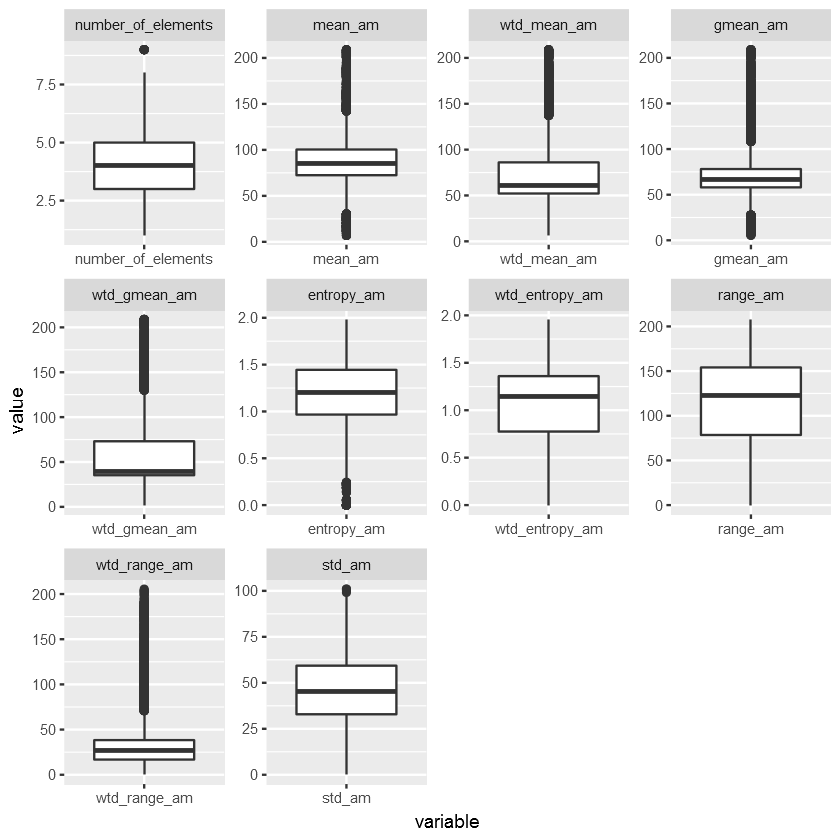

In [12]:
m1 <- melt(as.data.frame(dataset[, 1:10]))
ggplot(m1, aes(x = variable, y = value)) + 
facet_wrap(~variable, scales="free") +
geom_boxplot() + 
scale_y_continuous(labels=function (n) {format(n, scientific=FALSE)})

No id variables; using all as measure variables


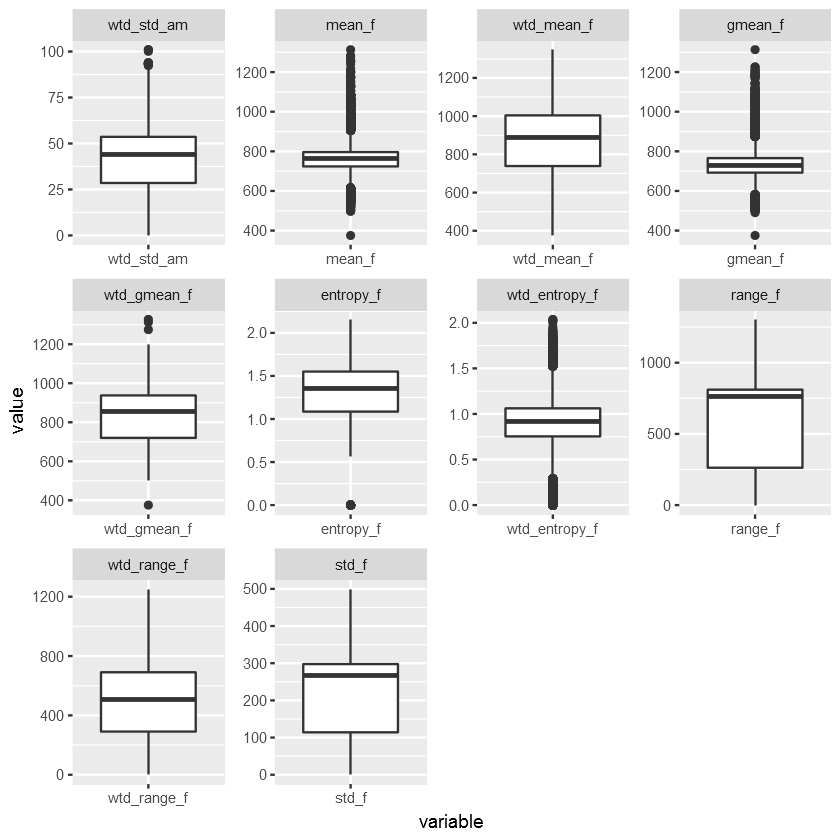

In [13]:
m2 <- melt(as.data.frame(dataset[, 11:20]))
ggplot(m2, aes(x = variable, y = value)) + 
facet_wrap(~variable, scales="free") +
geom_boxplot() + 
scale_y_continuous(labels=function (n) {format(n, scientific=FALSE)})

No id variables; using all as measure variables


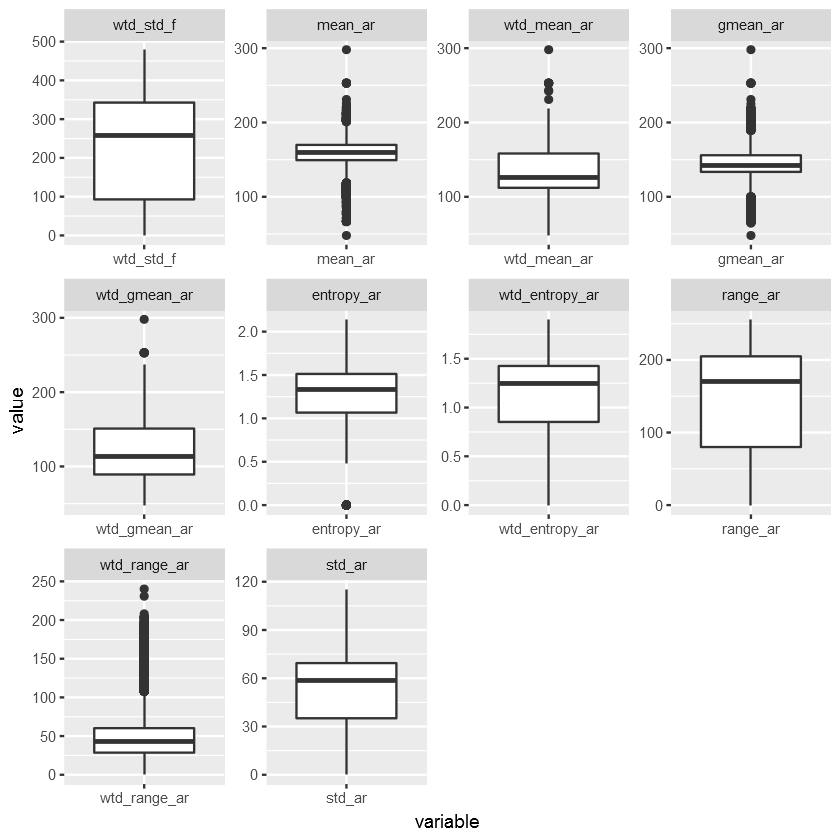

In [14]:
m3 <- melt(as.data.frame(dataset[, 21:30]))
ggplot(m3, aes(x = variable, y = value)) + 
facet_wrap(~variable, scales="free") +
geom_boxplot() + 
scale_y_continuous(labels=function (n) {format(n, scientific=FALSE)})

No id variables; using all as measure variables


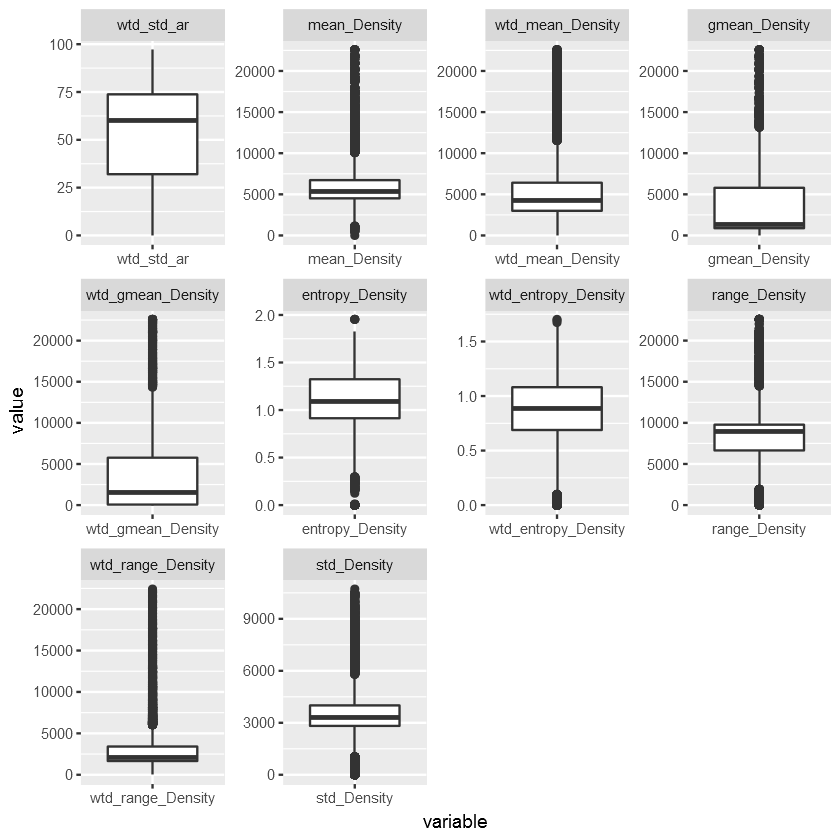

In [15]:
m4 <- melt(as.data.frame(dataset[, 31:40]))
ggplot(m4, aes(x = variable, y = value)) + 
facet_wrap(~variable, scales="free") +
geom_boxplot() + 
scale_y_continuous(labels=function (n) {format(n, scientific=FALSE)})

No id variables; using all as measure variables


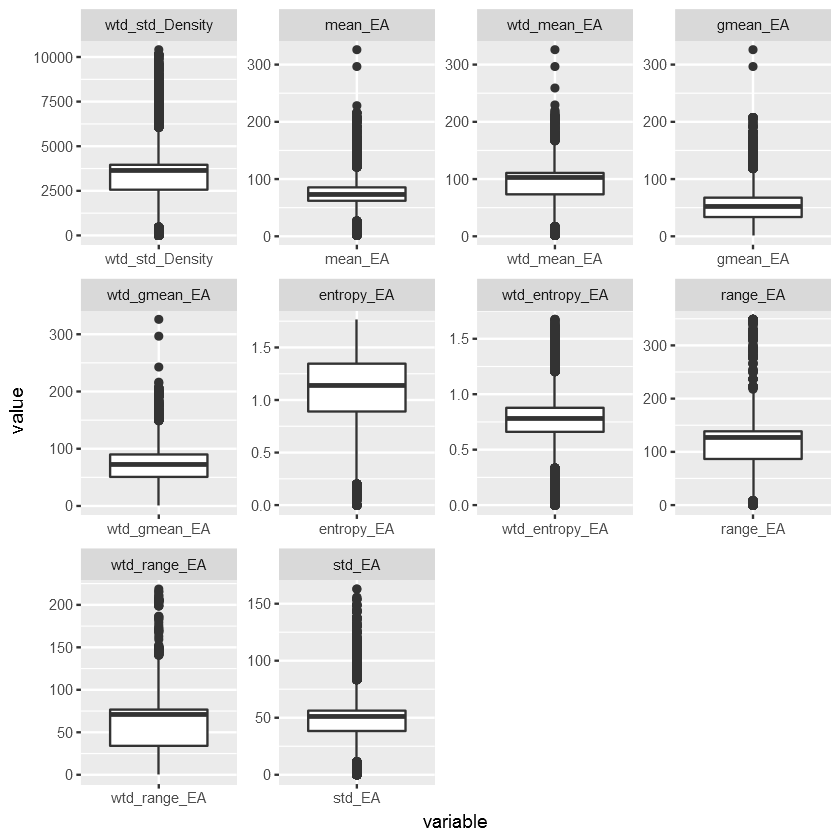

In [16]:
m5 <- melt(as.data.frame(dataset[, 41:50]))
ggplot(m5, aes(x = variable, y = value)) + 
facet_wrap(~variable, scales="free") +
geom_boxplot() + 
scale_y_continuous(labels=function (n) {format(n, scientific=FALSE)})

No id variables; using all as measure variables


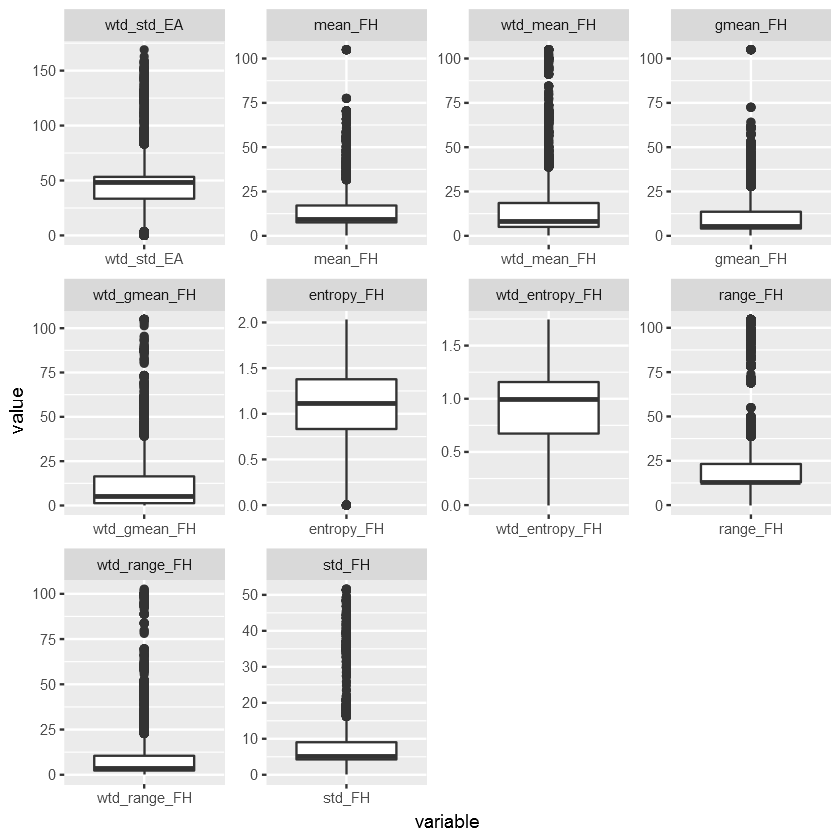

In [17]:
m6 <- melt(as.data.frame(dataset[, 51:60]))
ggplot(m6, aes(x = variable, y = value)) + 
facet_wrap(~variable, scales="free") +
geom_boxplot() + 
scale_y_continuous(labels=function (n) {format(n, scientific=FALSE)})

No id variables; using all as measure variables


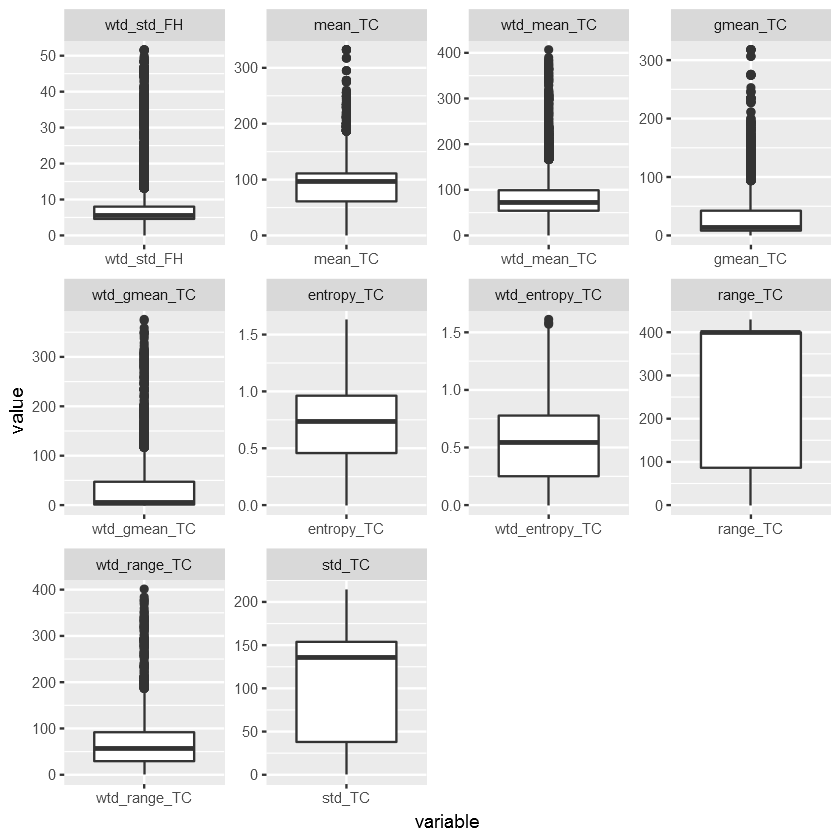

In [18]:
m7 <- melt(as.data.frame(dataset[, 61:70]))
ggplot(m7, aes(x = variable, y = value)) + 
facet_wrap(~variable, scales="free") +
geom_boxplot() + 
scale_y_continuous(labels=function (n) {format(n, scientific=FALSE)})

No id variables; using all as measure variables


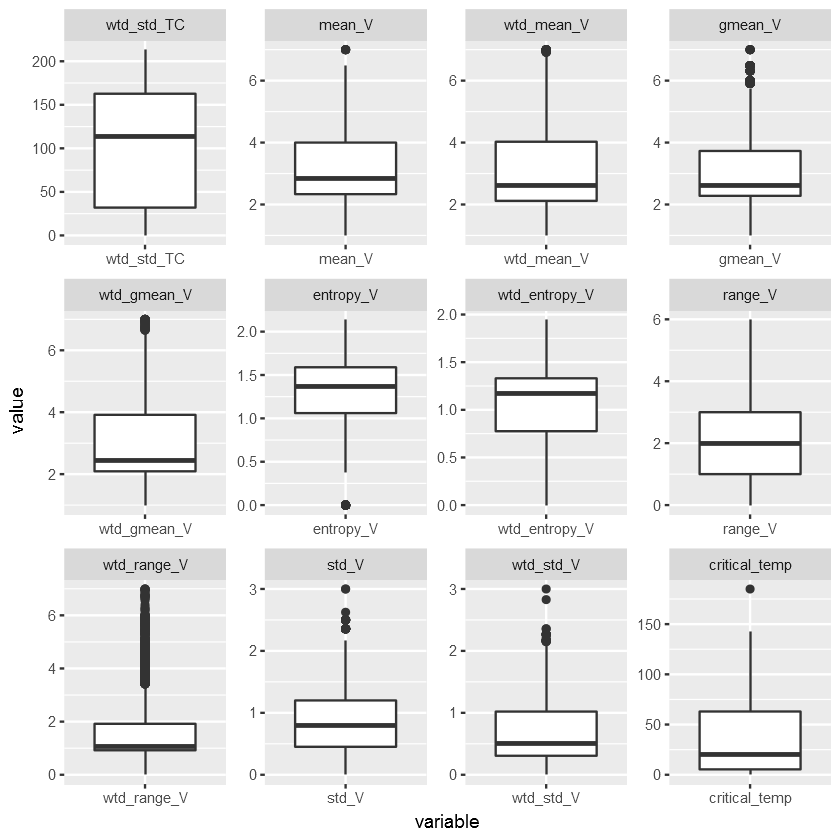

In [19]:
m8 <- melt(as.data.frame(dataset[, 71:82]))
ggplot(m8, aes(x = variable, y = value)) + 
facet_wrap(~variable, scales="free") +
geom_boxplot() + 
scale_y_continuous(labels=function (n) {format(n, scientific=FALSE)})

#### 4.2.2 Histograms Analysis 
<a id="Histograms Analysis"></a>

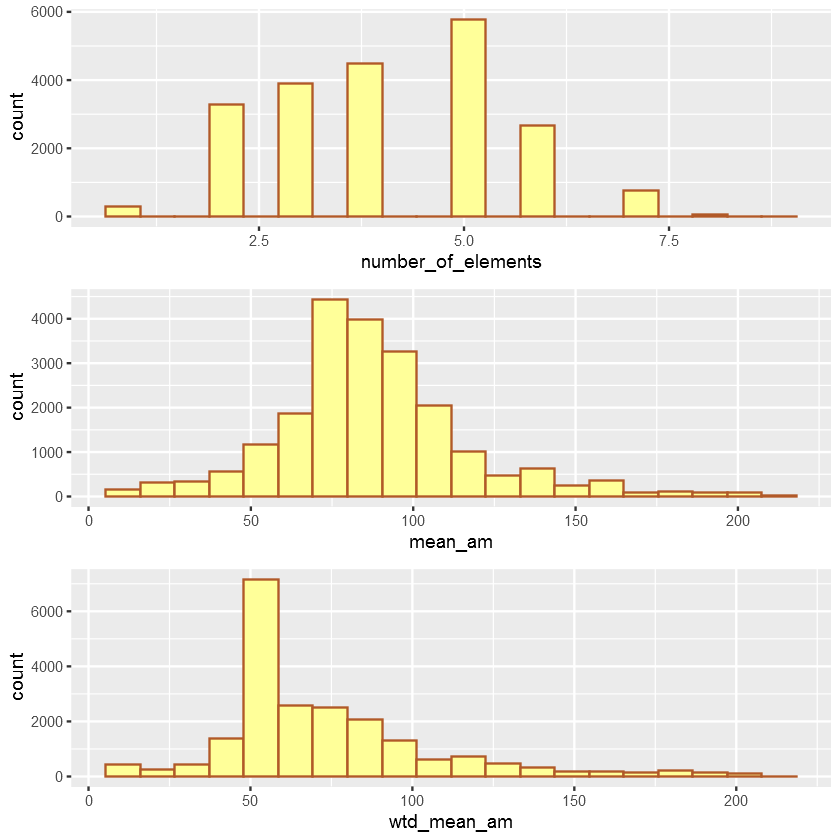

In [321]:
# Set some colours using Colorbrewer
gg.colour <- brewer.pal(12,"Paired")[12]
gg.fill <- brewer.pal(12,"Paired")[11]

# Histogram visualisations for all features/variables in the dataset train.csv 
p1 <- ggplot(aes(x=number_of_elements), data=dataset) +
      geom_histogram(bins=20, colour=gg.colour, fill=gg.fill)

p2 <- ggplot(aes(x=mean_am), data=dataset) +
      geom_histogram(bins=20, colour=gg.colour, fill=gg.fill)

p3 <- ggplot(aes(x=wtd_mean_am), data=dataset) +
      geom_histogram(bins=20, colour=gg.colour, fill=gg.fill)
grid.arrange(p1, p2, p3, ncol=1, nrow=3)

From the output it can observed that the `histogram visualisations` for the features **mean_am** and **wtd_mean_am** distributions are **positively skewed**.

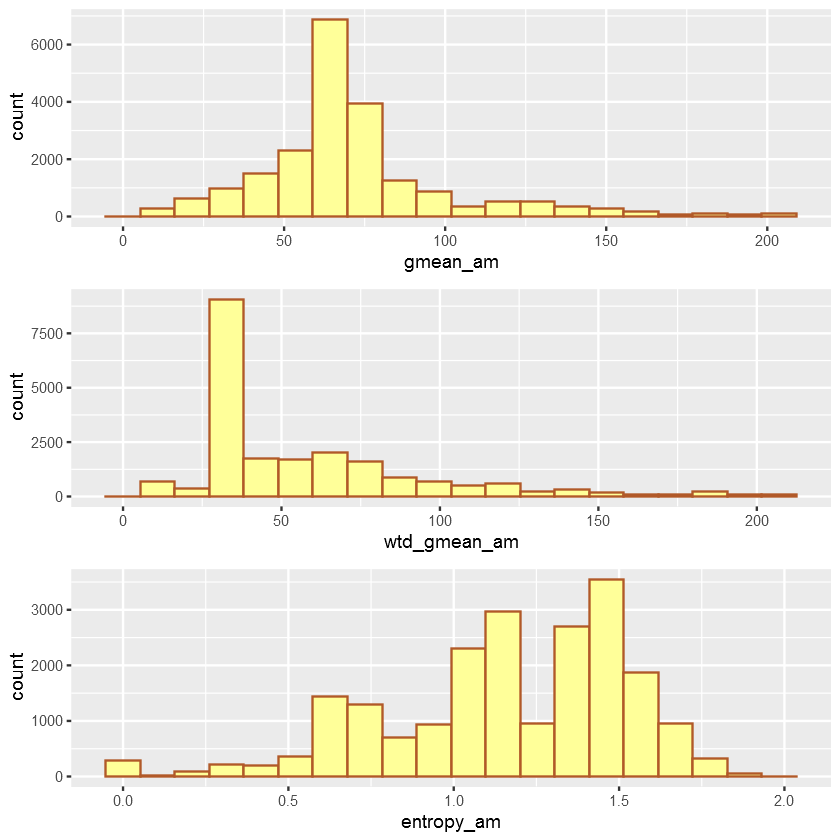

In [322]:
# Histogram visualisations for all features/variables in the dataset train.csv using log scales to counteract the skew
p4 <- ggplot(aes(x=gmean_am), data=dataset) +
      geom_histogram(bins=20, colour=gg.colour, fill=gg.fill) 

p5 <- ggplot(aes(x=wtd_gmean_am), data=dataset) +
      geom_histogram(bins=20, colour=gg.colour, fill=gg.fill) 

p6 <- ggplot(aes(x=entropy_am), data=dataset) +
      geom_histogram(bins=20, colour=gg.colour, fill=gg.fill) 
grid.arrange(p4, p5, p6, ncol=1, nrow=3)

From the output it can observed that the `histogram visualisations` for the features **gmean_am**, **wtd_gmean_am** and **entropy_am** distributions are **positively skewed** for **gmean_am distribution** and **wtd_gmean_am distribution**. Whereas for the feature **entropy_am** it follows a **negatively skewed distribution**. 

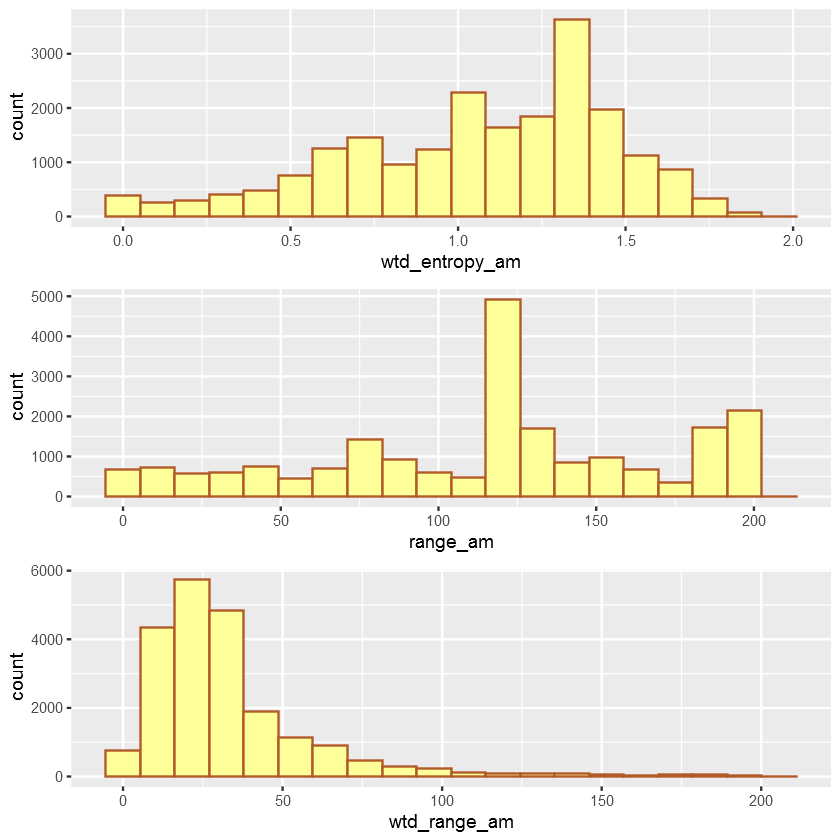

In [323]:
# Histogram visualisations for all features/variables in the dataset train.csv 
p7 <- ggplot(aes(x=wtd_entropy_am), data=dataset) +
      geom_histogram(bins=20, colour=gg.colour, fill=gg.fill) 

p8 <- ggplot(aes(x=range_am), data=dataset) +
      geom_histogram(bins=20, colour=gg.colour, fill=gg.fill) 

p9 <- ggplot(aes(x=wtd_range_am), data=dataset) +
      geom_histogram(bins=20, colour=gg.colour, fill=gg.fill) 
grid.arrange(p7, p8, p9, ncol=1, nrow=3)

From the output it can observed that the `histogram visualisations` for the features **wtd_entropy_am**, **range_am** and **wtd_range_am** distributions are **multi-modal distributions** for the features **wtd_entropy_am** and **range_am**. 

However, it's a **positively skewed distribution** for the feature **wtd_range_am**.

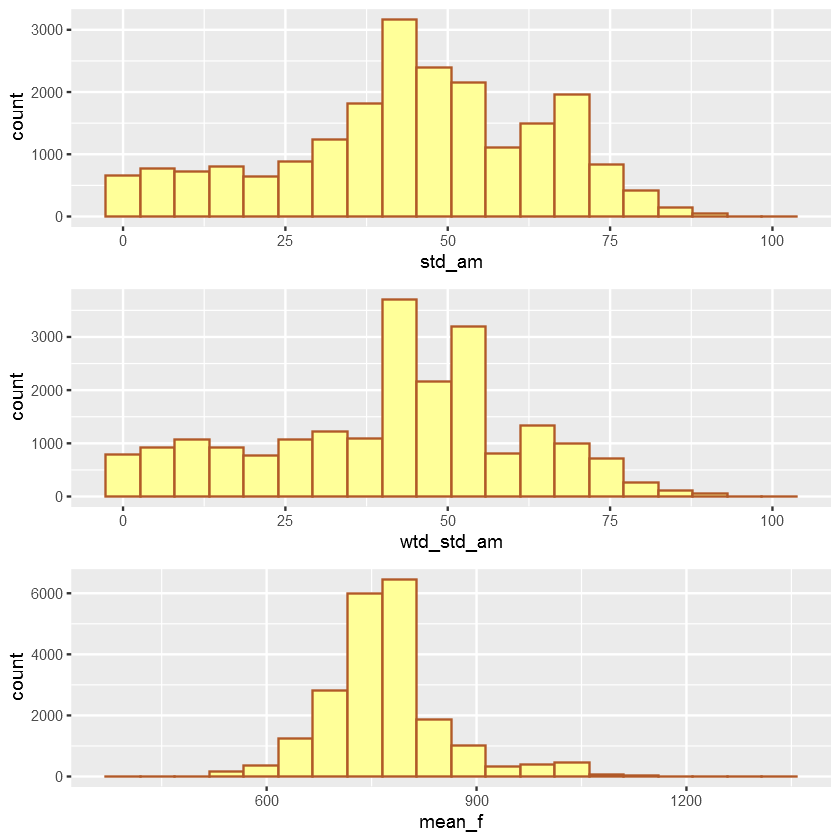

In [324]:
# Histogram visualisations for all features/variables in the dataset train.csv 
p10 <- ggplot(aes(x=std_am), data=dataset) +
      geom_histogram(bins=20, colour=gg.colour, fill=gg.fill) 

p11 <- ggplot(aes(x=wtd_std_am), data=dataset) +
      geom_histogram(bins=20, colour=gg.colour, fill=gg.fill) 

p12 <- ggplot(aes(x=mean_f), data=dataset) +
      geom_histogram(bins=20, colour=gg.colour, fill=gg.fill) 
grid.arrange(p10, p11, p12, ncol=1, nrow=3)

From the output it can observed that the `histogram visualisations` for the features **std_am**, **wtd_std_am** and **mean_f** distributions are close to following a **normal distribution** for **std_am** distributions and **wtd_std_am** distributions.

However, for the feature **mean_f** the distribution is also close to **following a normal distribution** but it's slightly **positively skewed**.

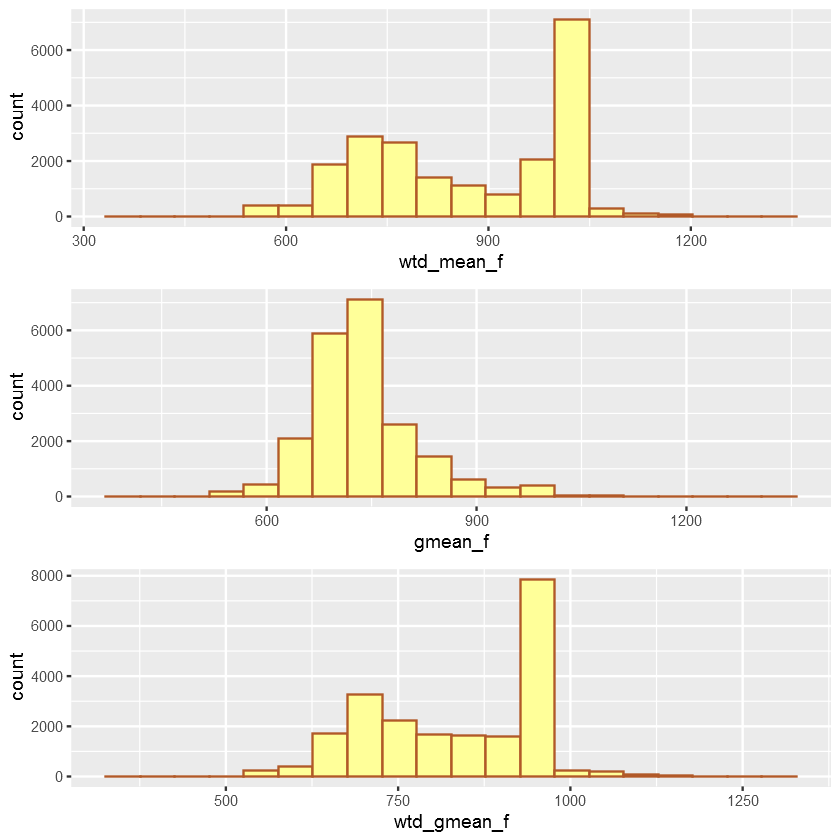

In [325]:
# Histogram visualisations for all features/variables in the dataset train.csv 
p13 <- ggplot(aes(x=wtd_mean_f), data=dataset) +
      geom_histogram(bins=20, colour=gg.colour, fill=gg.fill) 

p14 <- ggplot(aes(x=gmean_f), data=dataset) +
      geom_histogram(bins=20, colour=gg.colour, fill=gg.fill) 

p15 <- ggplot(aes(x=wtd_gmean_f), data=dataset) +
      geom_histogram(bins=20, colour=gg.colour, fill=gg.fill) 
grid.arrange(p13, p14, p15, ncol=1, nrow=3)

From the output it can observed that the `histogram visualisations` for the features **wtd_mean_f**, **gmean_f** and **wtd_gmean_f** distributions is **positively skewed** for **gmean_f** distributions.

However, for the features **wtd_mean_f** and **wtd_gmean_f** the distributions are **negatively skewed**.

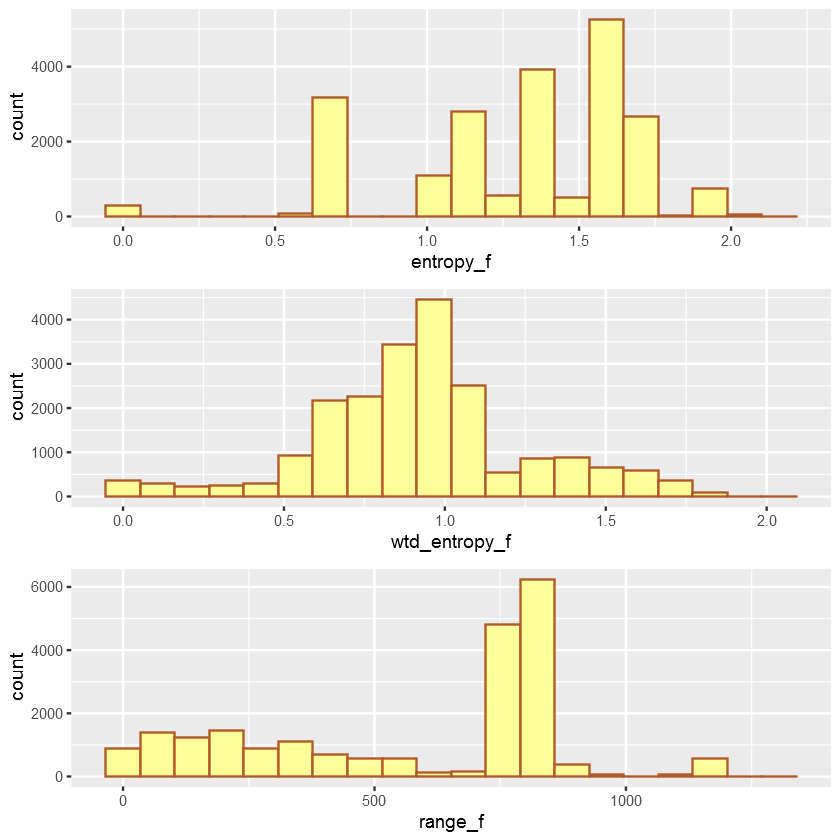

In [326]:
# Histogram visualisations for all features/variables in the dataset train.csv 
p16 <- ggplot(aes(x=entropy_f), data=dataset) +
      geom_histogram(bins=20, colour=gg.colour, fill=gg.fill) 

p17 <- ggplot(aes(x=wtd_entropy_f), data=dataset) +
      geom_histogram(bins=20, colour=gg.colour, fill=gg.fill) 

p18 <- ggplot(aes(x=range_f), data=dataset) +
      geom_histogram(bins=20, colour=gg.colour, fill=gg.fill) 
grid.arrange(p16, p17, p18, ncol=1, nrow=3)

From the output it can observed that the `histogram visualisations` for the features **entropy_f**, **wtd_entropy_f** and **range_f** distributions the distribution for **wtd_entropy_f** is **nearly normal distributed**.

Whereas, for the feature **wtd_entropy_f** the distribution is **negatively skewed** and for **range_f** the distribution is **positively negative skewed**. 

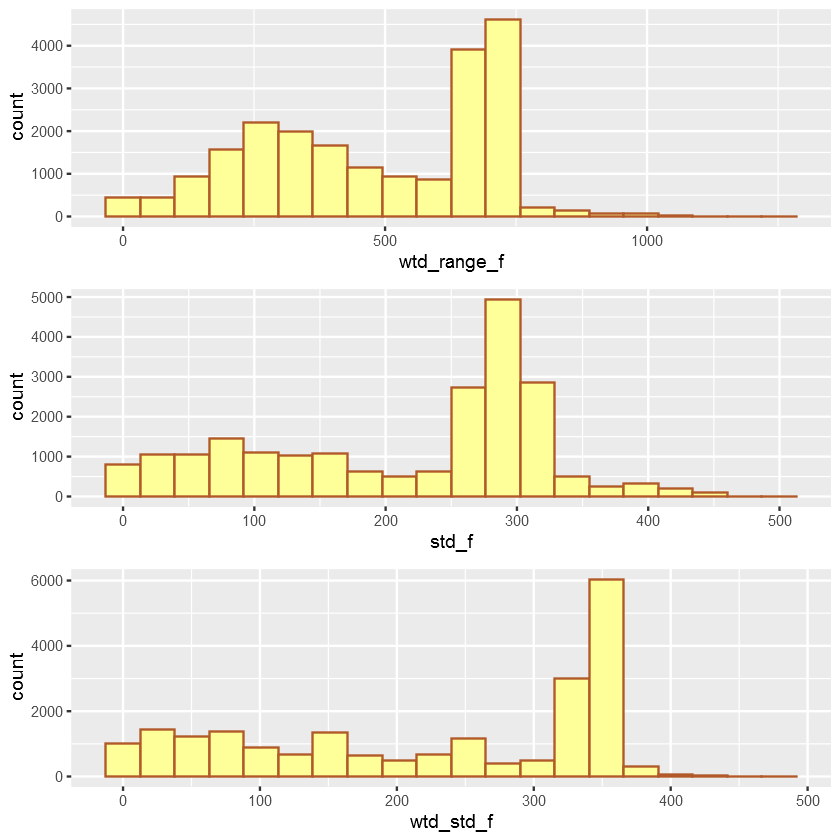

In [327]:
# Histogram visualisations for all features/variables in the dataset train.csv 
p19 <- ggplot(aes(x=wtd_range_f), data=dataset) +
      geom_histogram(bins=20, colour=gg.colour, fill=gg.fill) 

p20 <- ggplot(aes(x=std_f), data=dataset) +
      geom_histogram(bins=20, colour=gg.colour, fill=gg.fill) 

p21 <- ggplot(aes(x=wtd_std_f), data=dataset) +
      geom_histogram(bins=20, colour=gg.colour, fill=gg.fill) 
grid.arrange(p19, p20, p21, ncol=1, nrow=3)

From the output it can observed that the `histogram visualisations` for the features **wtd_range_f**, **std_f** and **wtd_std_f** distributions they are all **positively skewed** distributions.

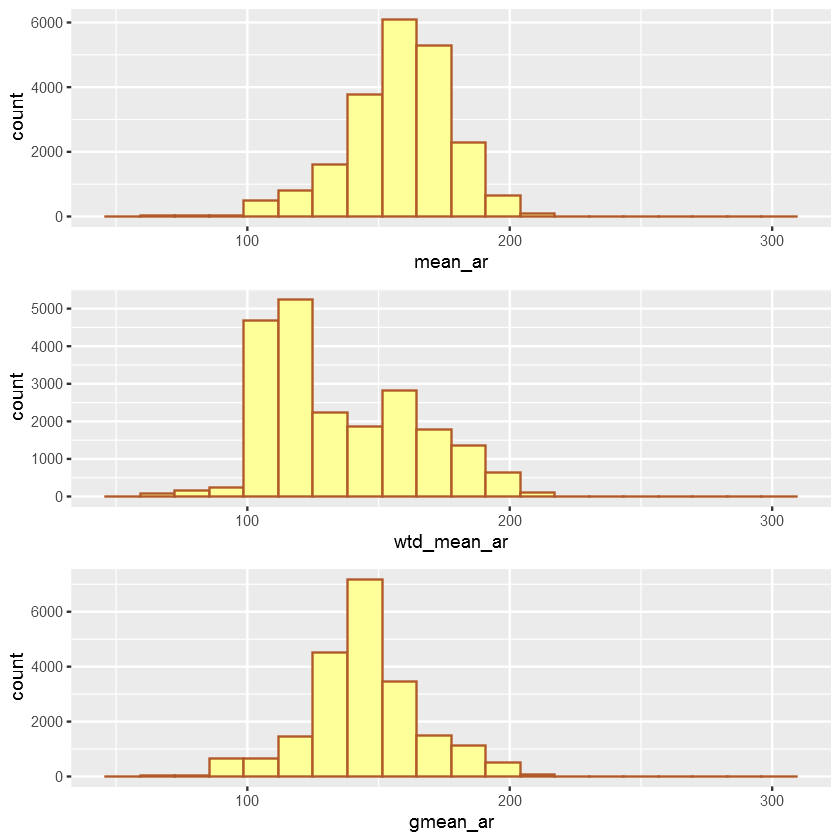

In [328]:
# Histogram visualisations for all features/variables in the dataset train.csv 
p22 <- ggplot(aes(x=mean_ar), data=dataset) +
      geom_histogram(bins=20, colour=gg.colour, fill=gg.fill) 

p23 <- ggplot(aes(x=wtd_mean_ar), data=dataset) +
      geom_histogram(bins=20, colour=gg.colour, fill=gg.fill) 

p24 <- ggplot(aes(x=gmean_ar), data=dataset) +
      geom_histogram(bins=20, colour=gg.colour, fill=gg.fill)
grid.arrange(p22, p23, p24, ncol=1, nrow=3)

From the output it can observed that the `histogram visualisations` for the features **mean_ar**, **wtd_mean_ar** and **gmean_ar** distributions with **logarithmic scales respectively for each distribution** are all **negatively skewed** distributions.

However, for the features **wtd_mean_ar** and **gmean_ar** the distributions are close to following **normal distributions**.

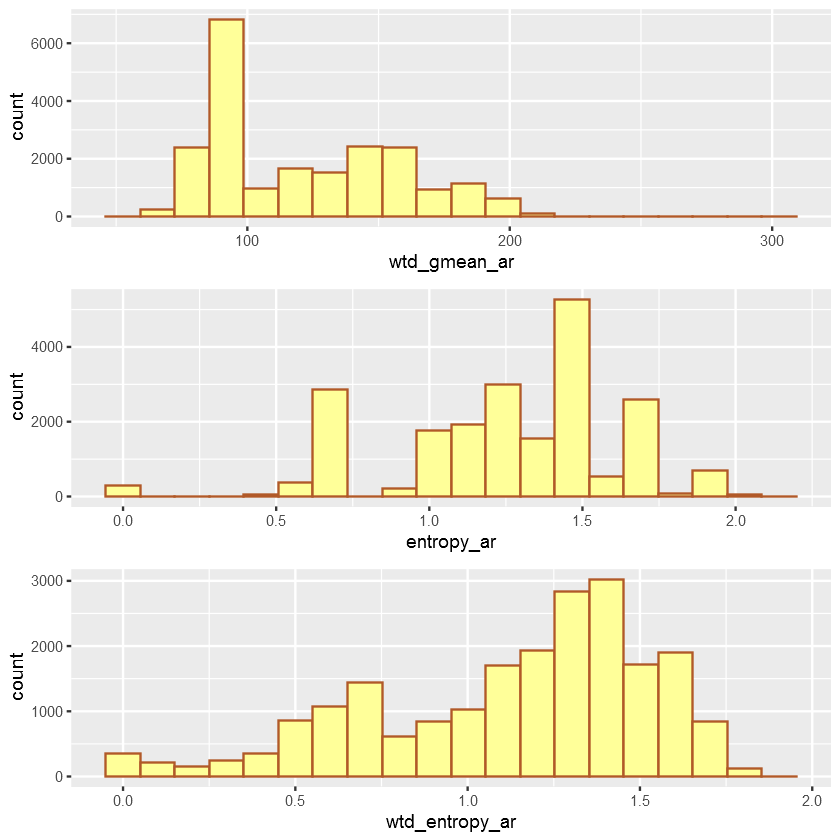

In [329]:
# Histogram visualisations for all features/variables in the dataset train.csv 
p25 <- ggplot(aes(x=wtd_gmean_ar), data=dataset) +
      geom_histogram(bins=20, colour=gg.colour, fill=gg.fill) 

p26 <- ggplot(aes(x=entropy_ar), data=dataset) +
      geom_histogram(bins=20, colour=gg.colour, fill=gg.fill) 

p27 <- ggplot(aes(x=wtd_entropy_ar), data=dataset) +
      geom_histogram(bins=20, colour=gg.colour, fill=gg.fill) 
grid.arrange(p25, p26, p27, ncol=1, nrow=3)

From the output it can observed that the `histogram visualisations` for the features **wtd_gmean_ar**, **entropy_ar** and **wtd_entropy_ar** distributions with **logarithmic scales applied respectively for each distribution** are **multimodal distributons** for the features **wtd_mean_ar** and **entropy_ar** but a **heavily negatively skewed distribution** for the feature **wtd_entropy_ar**.

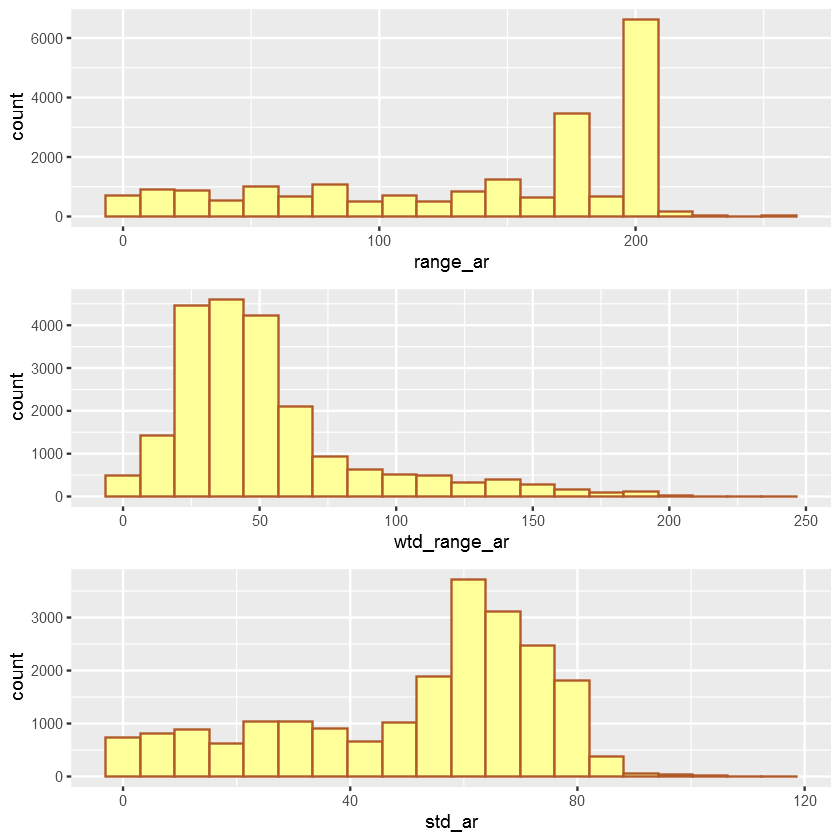

In [330]:
# Histogram visualisations for all features/variables in the dataset train.csv 
p28 <- ggplot(aes(x=range_ar), data=dataset) +
      geom_histogram(bins=20, colour=gg.colour, fill=gg.fill) 

p29 <- ggplot(aes(x=wtd_range_ar), data=dataset) +
      geom_histogram(bins=20, colour=gg.colour, fill=gg.fill) 

p30 <- ggplot(aes(x=std_ar), data=dataset) +
      geom_histogram(bins=20, colour=gg.colour, fill=gg.fill)
grid.arrange(p28, p29, p30, ncol=1, nrow=3)

From the output it can observed that the `histogram visualisations` for the features **range_ar**, **wtd_range_ar** and **std_ar** distributions with **logarithmic scales applied respectively for each distribution** are all **negatively skewed distributions**.

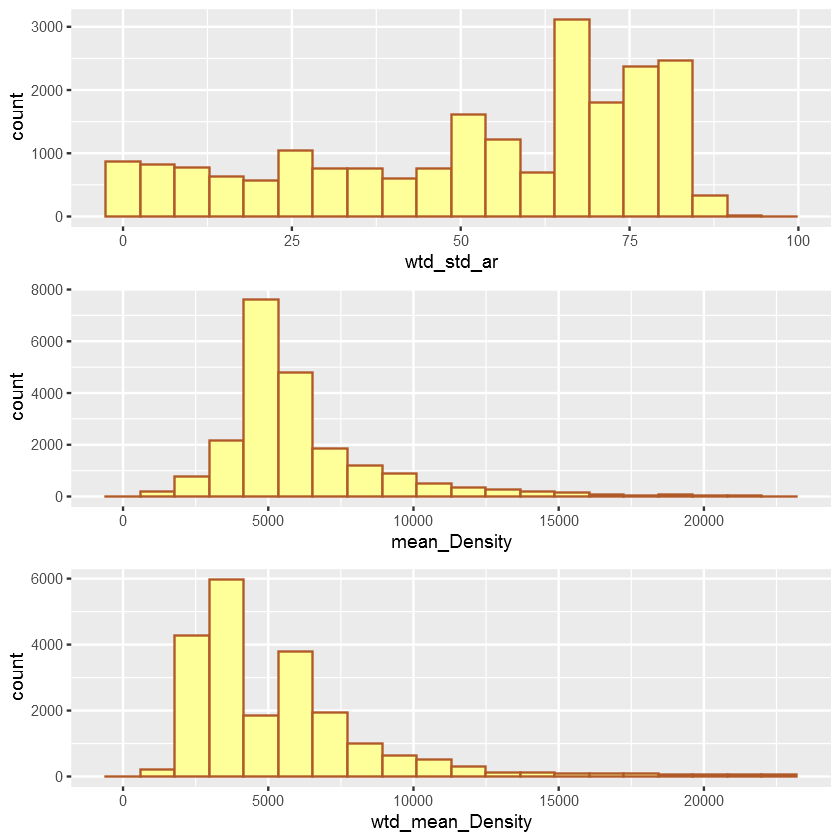

In [331]:
# Histogram visualisations for all features/variables in the dataset train.csv 
p31 <- ggplot(aes(x=wtd_std_ar), data=dataset) +
      geom_histogram(bins=20, colour=gg.colour, fill=gg.fill) 

p32 <- ggplot(aes(x=mean_Density), data=dataset) +
      geom_histogram(bins=20, colour=gg.colour, fill=gg.fill) 

p33 <- ggplot(aes(x=wtd_mean_Density), data=dataset) +
      geom_histogram(bins=20, colour=gg.colour, fill=gg.fill) 
grid.arrange(p31, p32, p33, ncol=1, nrow=3)

From the output it can observed that the `histogram visualisations` for the features **wtd_std_ar**, **mean_Density** and **wtd_mean_Density** distributions are all **positively skewed distributions**.

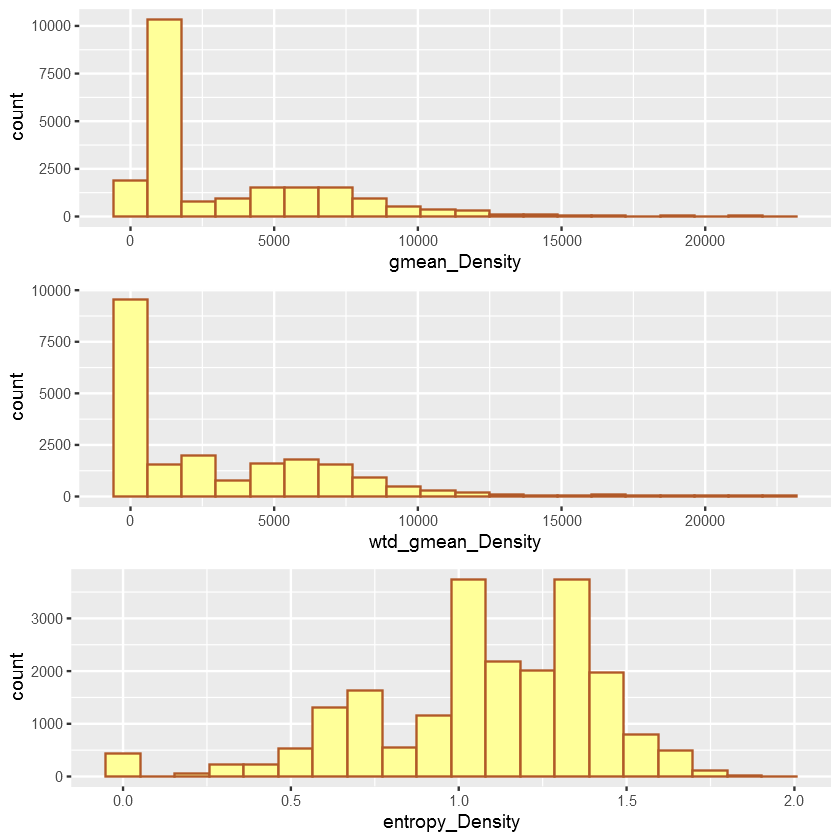

In [332]:
# Histogram visualisations for all features/variables in the dataset train.csv
p34 <- ggplot(aes(x=gmean_Density), data=dataset) +
      geom_histogram(bins=20, colour=gg.colour, fill=gg.fill) 

p35 <- ggplot(aes(x=wtd_gmean_Density), data=dataset) +
      geom_histogram(bins=20, colour=gg.colour, fill=gg.fill)

p36 <- ggplot(aes(x=entropy_Density), data=dataset) +
      geom_histogram(bins=20, colour=gg.colour, fill=gg.fill) 
grid.arrange(p34, p35, p36, ncol=1, nrow=3)

From the output it can observed that the `histogram visualisations` for the features **gmean_Density**, **wtd_gmean_Density** and **entropy_Density** distributions are **heavily positively skewed distributions** for the features **gmean_Density** and **wtd_gmean_Density**.

However, for the feature **entropy_Density** it follows a **neagtively skewed distribution**. 

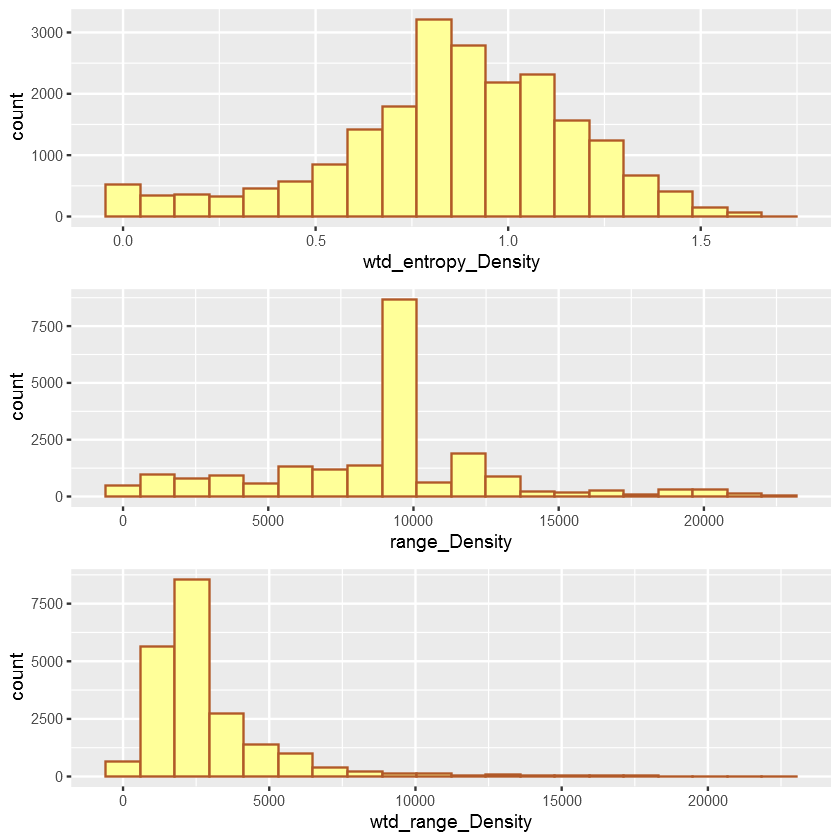

In [333]:
# Histogram visualisations for all features/variables in the dataset train.csv 
p37 <- ggplot(aes(x=wtd_entropy_Density), data=dataset) +
      geom_histogram(bins=20, colour=gg.colour, fill=gg.fill) 

p38 <- ggplot(aes(x=range_Density), data=dataset) +
      geom_histogram(bins=20, colour=gg.colour, fill=gg.fill) 

p39 <- ggplot(aes(x=wtd_range_Density), data=dataset) +
      geom_histogram(bins=20, colour=gg.colour, fill=gg.fill) 
grid.arrange(p37, p38, p39, ncol=1, nrow=3)

From the output it can observed that the `histogram visualisations` for the features **wtd_entropy_Density**, **range_Density** and **wtd_range_Density** distributions the distribution is **nearly normally distributed** for the feature **wtd_entropy_Density**. 

Whereas for the features **range_Density** and **wtd_range_Density** they are both **positively skewed distributions**.

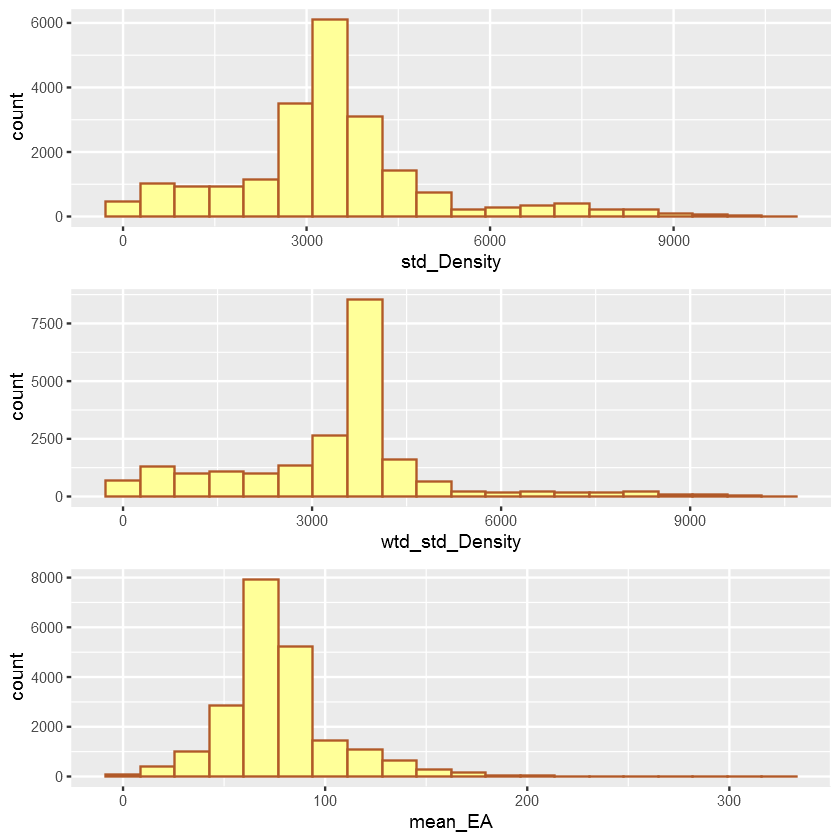

In [334]:
# Histogram visualisations for all features/variables in the dataset train.csv 
p40 <- ggplot(aes(x=std_Density), data=dataset) +
      geom_histogram(bins=20, colour=gg.colour, fill=gg.fill) 

p41 <- ggplot(aes(x=wtd_std_Density), data=dataset) +
      geom_histogram(bins=20, colour=gg.colour, fill=gg.fill) 

p42 <- ggplot(aes(x=mean_EA), data=dataset) +
      geom_histogram(bins=20, colour=gg.colour, fill=gg.fill) 
grid.arrange(p40, p41, p42, ncol=1, nrow=3)

From the output it can observed that the `histogram visualisations` for the features **std_Density**, **wtd_std_Density** and **mean_EA** distributions are all **positively skewed distributions**.

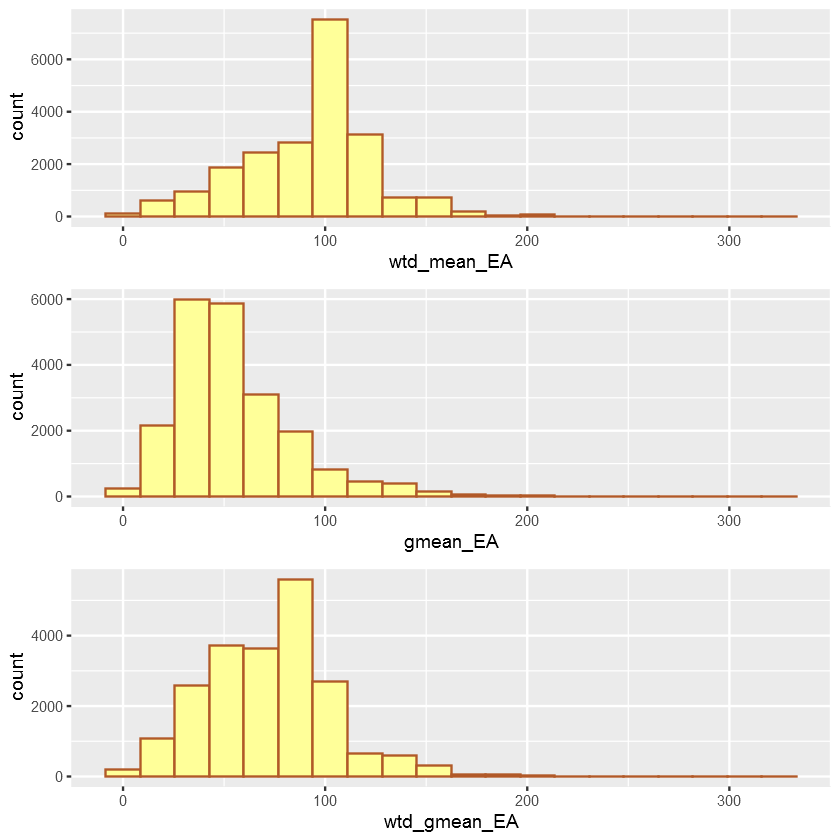

In [335]:
# Histogram visualisations for all features/variables in the dataset train.csv 
p43 <- ggplot(aes(x=wtd_mean_EA), data=dataset) +
      geom_histogram(bins=20, colour=gg.colour, fill=gg.fill) 

p44 <- ggplot(aes(x=gmean_EA), data=dataset) +
      geom_histogram(bins=20, colour=gg.colour, fill=gg.fill) 

p45 <- ggplot(aes(x=wtd_gmean_EA), data=dataset) +
      geom_histogram(bins=20, colour=gg.colour, fill=gg.fill) 
grid.arrange(p43, p44, p45, ncol=1, nrow=3)

From the output it can observed that the `histogram visualisations` for the features **wtd_mean_EA**, **gmean_EA** and **wtd_gmean_EA** distributions are all **positively skewed distributions**.

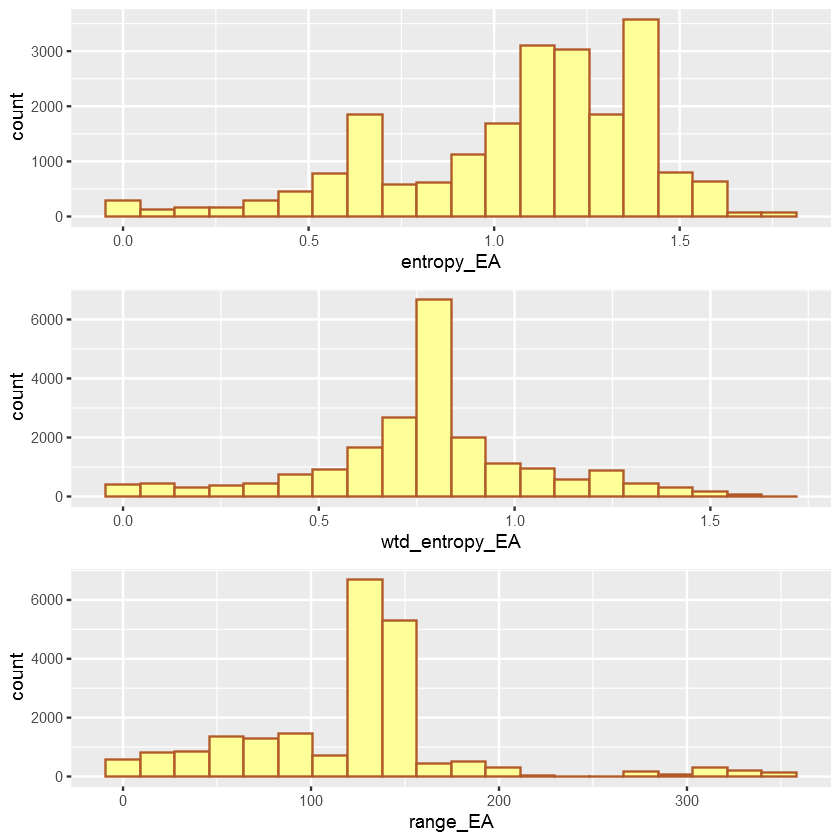

In [336]:
# Histogram visualisations for all features/variables in the dataset train.csv 
p46 <- ggplot(aes(x=entropy_EA), data=dataset) +
      geom_histogram(bins=20, colour=gg.colour, fill=gg.fill) 

p47 <- ggplot(aes(x=wtd_entropy_EA), data=dataset) +
      geom_histogram(bins=20, colour=gg.colour, fill=gg.fill) 

p48 <- ggplot(aes(x=range_EA), data=dataset) +
      geom_histogram(bins=20, colour=gg.colour, fill=gg.fill) 
grid.arrange(p46, p47, p48, ncol=1, nrow=3)

From the output it can observed that the `histogram visualisations` for the features **entropy_EA**, **wtd_entropy_EA** and **range_EA** distributions is **normally distributed** for the feature **wtd_entropy_EA**. 

Whereas, for the feature **range_EA** it is **positively skewed distributed** and for the feature **entropy_EA** it follows a **neagtively skewed distribution**.

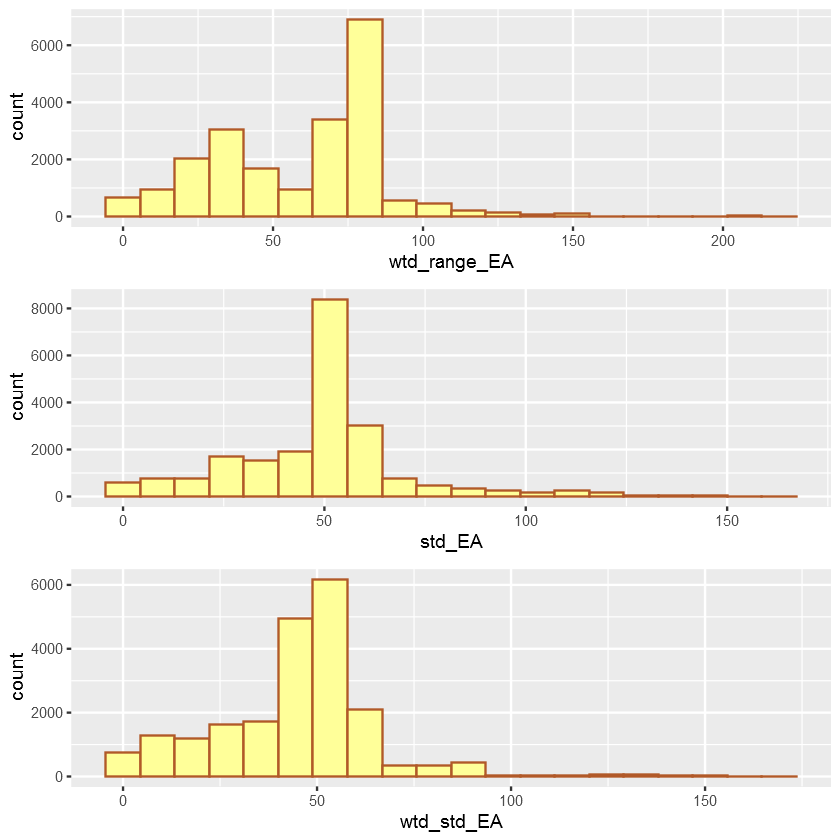

In [337]:
# Histogram visualisations for all features/variables in the dataset train.csv 
p49 <- ggplot(aes(x=wtd_range_EA), data=dataset) +
      geom_histogram(bins=20, colour=gg.colour, fill=gg.fill) 

p50 <- ggplot(aes(x=std_EA), data=dataset) +
      geom_histogram(bins=20, colour=gg.colour, fill=gg.fill) 

p51 <- ggplot(aes(x=wtd_std_EA), data=dataset) +
      geom_histogram(bins=20, colour=gg.colour, fill=gg.fill) 
grid.arrange(p49, p50, p51, ncol=1, nrow=3)

From the output it can observed that the `histogram visualisations` for the features **wtd_range_EA**, **std_EA** and **wtd_std_EA** distributions are all **positively skewed distributions**.

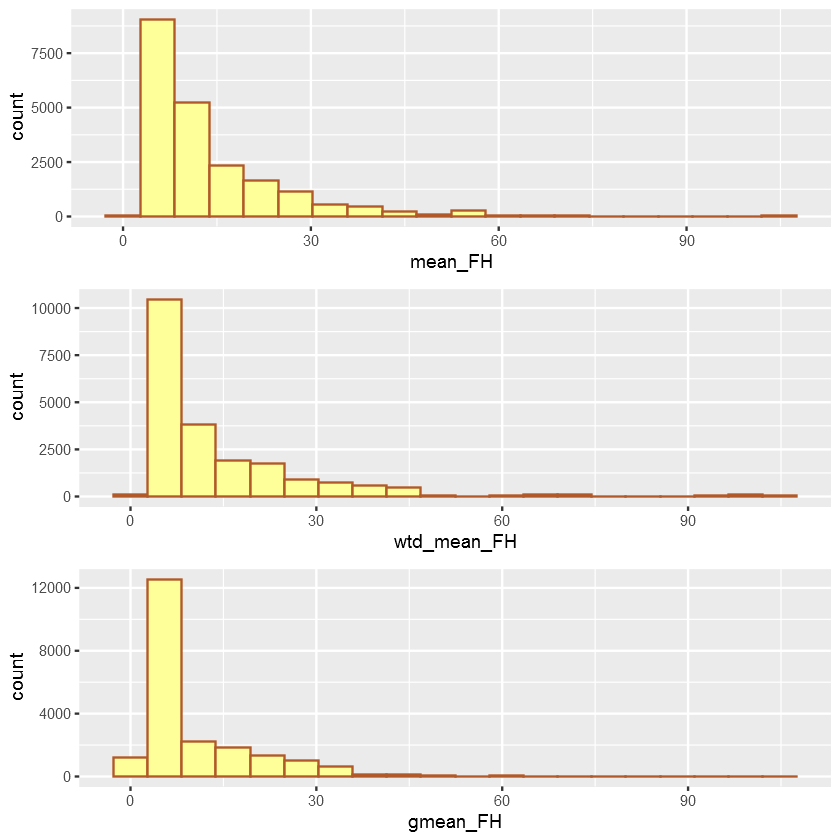

In [338]:
# Histogram visualisations for all features/variables in the dataset train.csv 
p52 <- ggplot(aes(x=mean_FH), data=dataset) +
      geom_histogram(bins=20, colour=gg.colour, fill=gg.fill) 

p53 <- ggplot(aes(x=wtd_mean_FH), data=dataset) +
      geom_histogram(bins=20, colour=gg.colour, fill=gg.fill) 

p54 <- ggplot(aes(x=gmean_FH), data=dataset) +
      geom_histogram(bins=20, colour=gg.colour, fill=gg.fill) 
grid.arrange(p52, p53, p54, ncol=1, nrow=3)

From the output it can observed that the `histogram visualisations` for the features **mean_FH**, **wtd_mean_FH** and **gmean_FH** distributions are all **positively skewed distributions**.

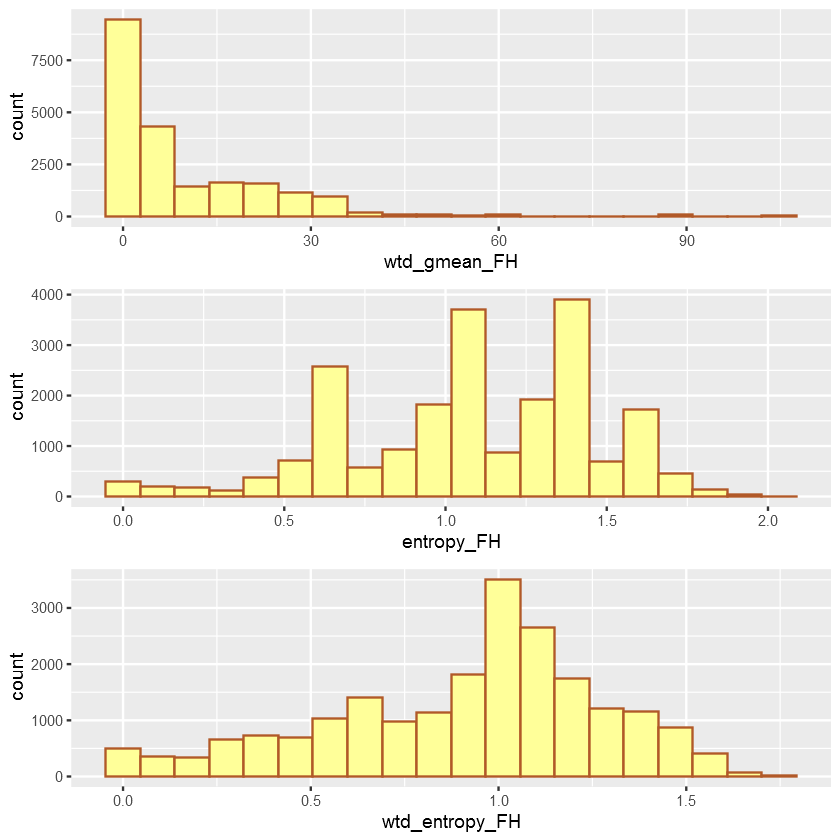

In [339]:
# Histogram visualisations for all features/variables in the dataset train.csv 
p55 <- ggplot(aes(x=wtd_gmean_FH), data=dataset) +
      geom_histogram(bins=20, colour=gg.colour, fill=gg.fill) 

p56 <- ggplot(aes(x=entropy_FH), data=dataset) +
      geom_histogram(bins=20, colour=gg.colour, fill=gg.fill) 

p57 <- ggplot(aes(x=wtd_entropy_FH), data=dataset) +
      geom_histogram(bins=20, colour=gg.colour, fill=gg.fill) 
grid.arrange(p55, p56, p57, ncol=1, nrow=3)

From the output it can observed that the `histogram visualisations` for the feature **wtd_gmean_FH** follows a **positively skewed distribution**.

Whereas for the feature **entropy_FH** it's a **multi-modal distribution** and the feature **wtd_entropy_FH** is close to following a **normal distribution** but it's **slightly negatively skewed**.  

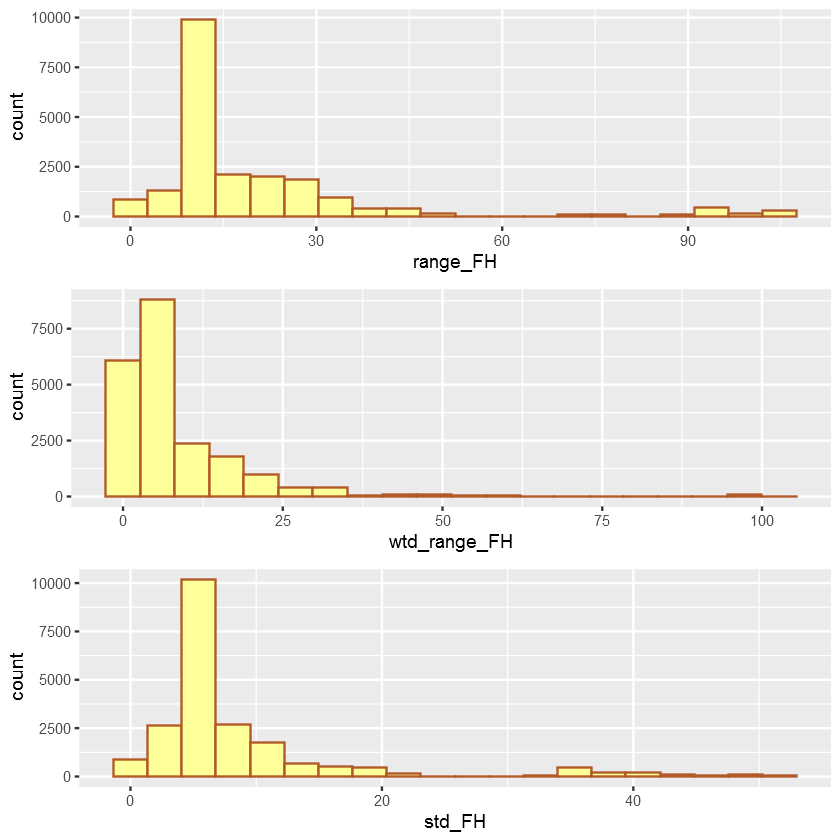

In [340]:
# Histogram visualisations for all features/variables in the dataset train.csv
p58 <- ggplot(aes(x=range_FH), data=dataset) +
      geom_histogram(bins=20, colour=gg.colour, fill=gg.fill) 

p59 <- ggplot(aes(x=wtd_range_FH), data=dataset) +
      geom_histogram(bins=20, colour=gg.colour, fill=gg.fill) 

p60 <- ggplot(aes(x=std_FH), data=dataset) +
      geom_histogram(bins=20, colour=gg.colour, fill=gg.fill) 
grid.arrange(p58, p59, p60, ncol=1, nrow=3)

From the output it can observed that the `histogram visualisations` for the features **range_FH**, **wtd_range_FH** and **std_FH** distributions with **logarithmic scales applied respectively for each distribution** are all **negatively skewed distributions**.

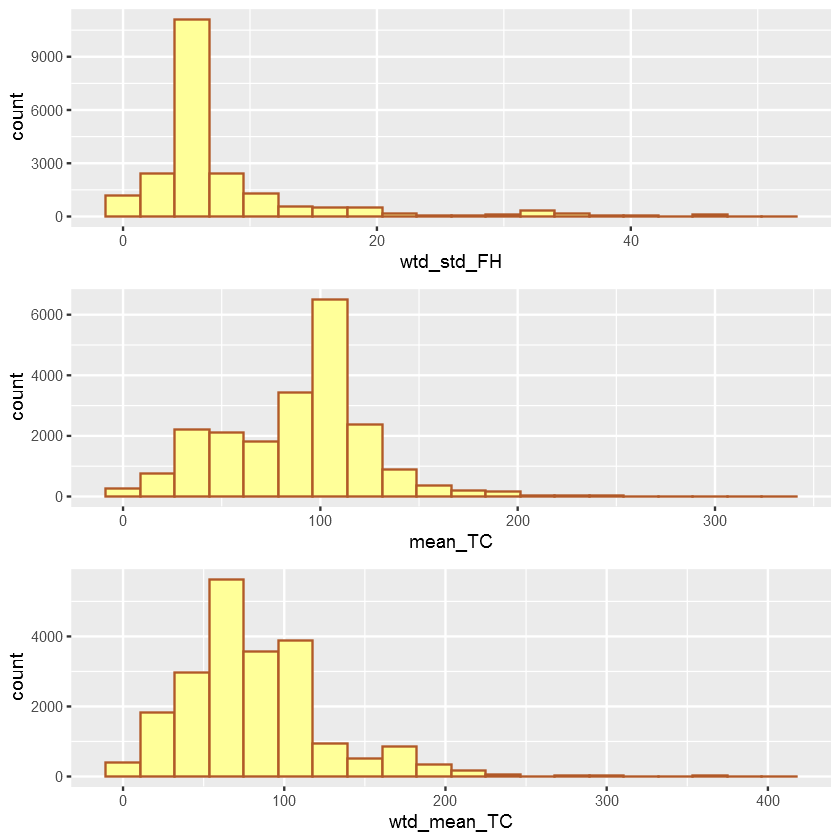

In [341]:
# Histogram visualisations for all features/variables in the dataset train.csv 
p61 <- ggplot(aes(x=wtd_std_FH), data=dataset) +
      geom_histogram(bins=20, colour=gg.colour, fill=gg.fill) 

p62 <- ggplot(aes(x=mean_TC), data=dataset) +
      geom_histogram(bins=20, colour=gg.colour, fill=gg.fill) 

p63 <- ggplot(aes(x=wtd_mean_TC), data=dataset) +
      geom_histogram(bins=20, colour=gg.colour, fill=gg.fill) 
grid.arrange(p61, p62, p63, ncol=1, nrow=3)

From the output it can observed that the `histogram visualisations` for the features **wtd_std_FH**, **mean_TC** and **wtd_mean_TC** distributions with **logarithmic scales applied respectively for each distribution** are all **negatively skewed distributions**.

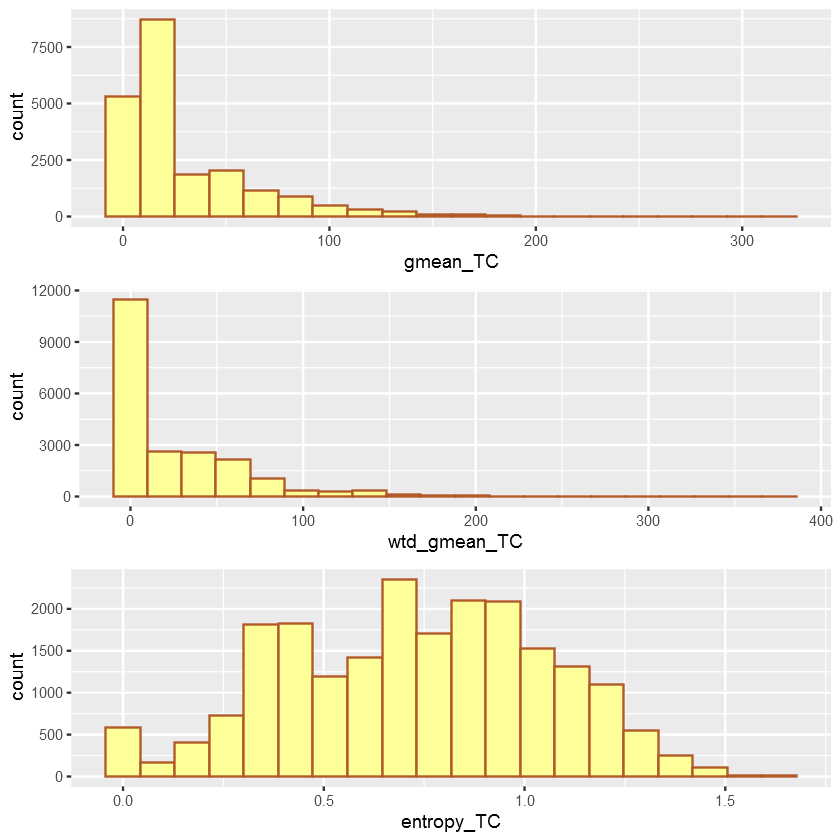

In [342]:
# Histogram visualisations for all features/variables in the dataset train.csv 
p64 <- ggplot(aes(x=gmean_TC), data=dataset) +
      geom_histogram(bins=20, colour=gg.colour, fill=gg.fill) 

p65 <- ggplot(aes(x=wtd_gmean_TC), data=dataset) +
      geom_histogram(bins=20, colour=gg.colour, fill=gg.fill) 

p66 <- ggplot(aes(x=entropy_TC), data=dataset) +
      geom_histogram(bins=20, colour=gg.colour, fill=gg.fill) 
grid.arrange(p64, p65, p66, ncol=1, nrow=3)

From the output it can observed that the `histogram visualisations` for the features **gmean_TC**, **wtd_gmean_TC** and **entropy_TC** distributions are **positively skewed distributions** for the features **gmean_TC** and **wtd_gmean_TC**.

Whereas for the feature **entropy_TC** it follows a **normal distribution**.

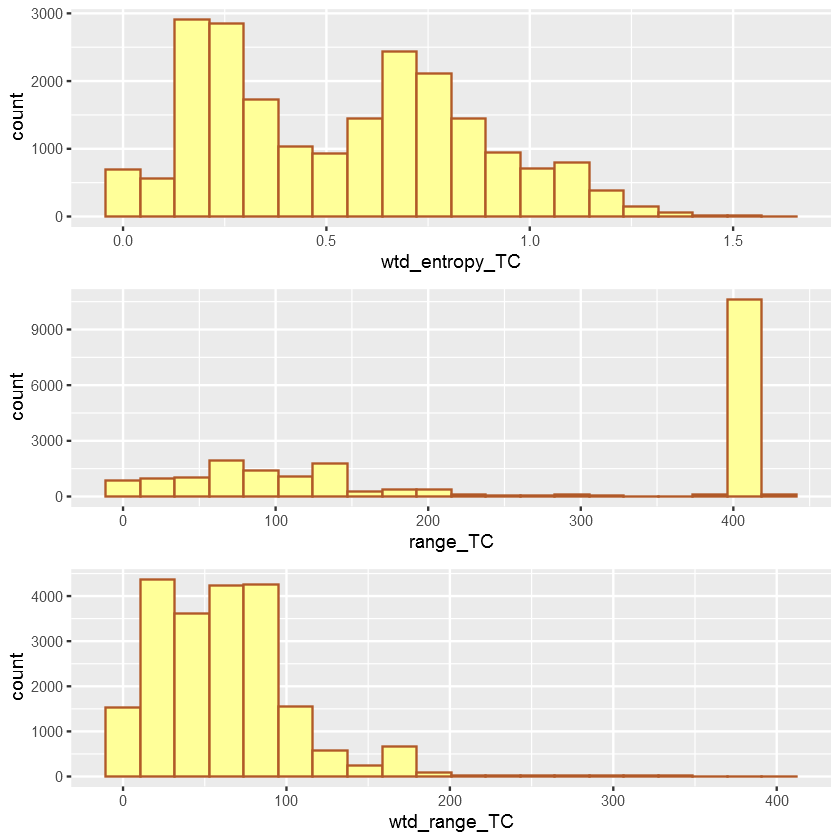

In [343]:
# Histogram visualisations for all features/variables in the dataset train.csv 
p67 <- ggplot(aes(x=wtd_entropy_TC), data=dataset) +
      geom_histogram(bins=20, colour=gg.colour, fill=gg.fill) 

p68 <- ggplot(aes(x=range_TC), data=dataset) +
      geom_histogram(bins=20, colour=gg.colour, fill=gg.fill) 

p69 <- ggplot(aes(x=wtd_range_TC), data=dataset) +
      geom_histogram(bins=20, colour=gg.colour, fill=gg.fill) 
grid.arrange(p67, p68, p69, ncol=1, nrow=3)

From the output it can observed that the `histogram visualisations` for the features **wtd_entropy_TC**, **range_TC** and **wtd_range_TC** distributions that for the feature **wtd_entropy_TC** it's a **multi-modal positively skewed distribution**. 

Whereas, for the feature **range_TC** it follows a **negaitvely skewed distribution** and for the feature **wtd_range_TC** it follows a **positively skewed distribution**.

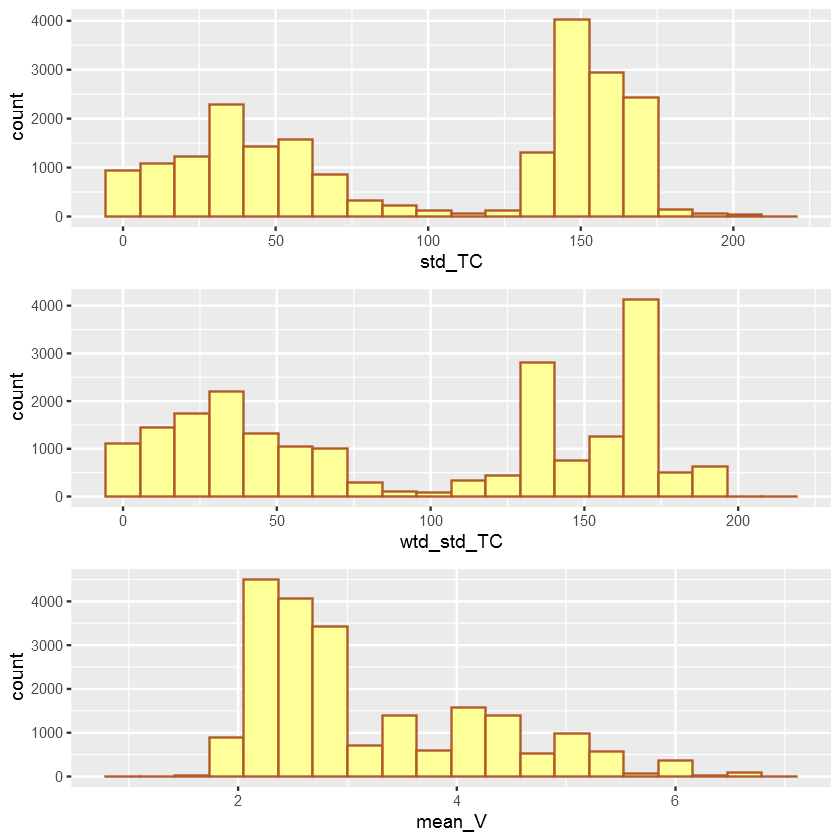

In [344]:
# Histogram visualisations for all features/variables in the dataset train.csv 
p70 <- ggplot(aes(x=std_TC), data=dataset) +
      geom_histogram(bins=20, colour=gg.colour, fill=gg.fill) 

p71 <- ggplot(aes(x=wtd_std_TC), data=dataset) +
      geom_histogram(bins=20, colour=gg.colour, fill=gg.fill) 

p72 <- ggplot(aes(x=mean_V), data=dataset) +
      geom_histogram(bins=20, colour=gg.colour, fill=gg.fill) 
grid.arrange(p70, p71, p72, ncol=1, nrow=3)

From the output it can observed that the `histogram visualisations` for the features **std_TC**, **wtd_std_TC** and **mean_V** distributions the for the features **std_TC** and **wtd_std_TC** they are **multimodal distributions**.

Whereas for the feature **mean_V** it follows a **positively skewed distribution**.

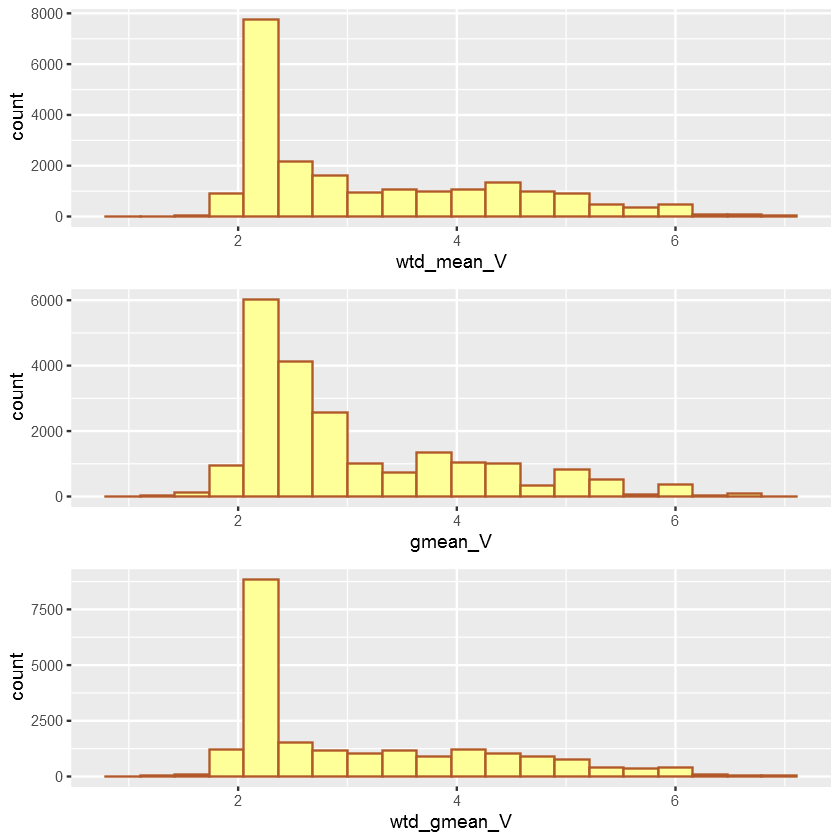

In [345]:
# Histogram visualisations for all features/variables in the dataset train.csv 
p73 <- ggplot(aes(x=wtd_mean_V), data=dataset) +
      geom_histogram(bins=20, colour=gg.colour, fill=gg.fill) 

p74 <- ggplot(aes(x=gmean_V), data=dataset) +
      geom_histogram(bins=20, colour=gg.colour, fill=gg.fill) 

p75 <- ggplot(aes(x=wtd_gmean_V), data=dataset) +
      geom_histogram(bins=20, colour=gg.colour, fill=gg.fill) 
grid.arrange(p73, p74, p75, ncol=1, nrow=3)

From the output it can observed that the `histogram visualisations` for the features **wtd_mean_V**, **gmean_V** and **wtd_gmean_V** distributions with **logarithmic scales applied respectively for each distribution** are all **negatively skewed distributions**.

However, for each of these distributions respectively they're all **close to following a normal distribution**. 

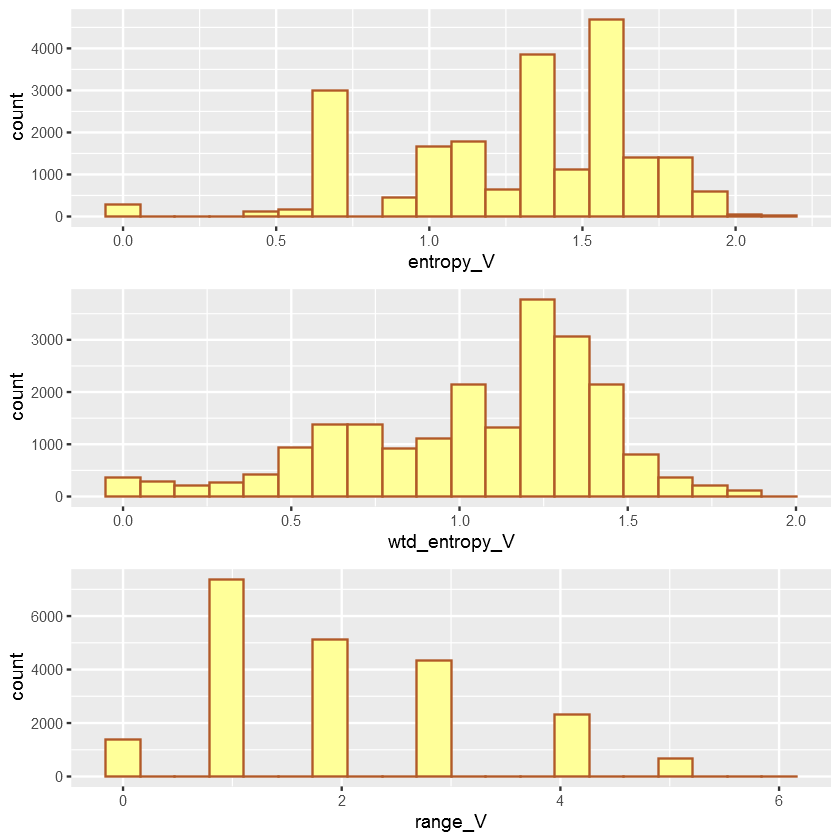

In [346]:
# Histogram visualisations for all features/variables in the dataset train.csv
p76 <- ggplot(aes(x=entropy_V), data=dataset) +
      geom_histogram(bins=20, colour=gg.colour, fill=gg.fill) 

p77 <- ggplot(aes(x=wtd_entropy_V), data=dataset) +
      geom_histogram(bins=20, colour=gg.colour, fill=gg.fill) 

p78 <- ggplot(aes(x=range_V), data=dataset) +
      geom_histogram(bins=20, colour=gg.colour, fill=gg.fill) 
grid.arrange(p76, p77, p78, ncol=1, nrow=3)

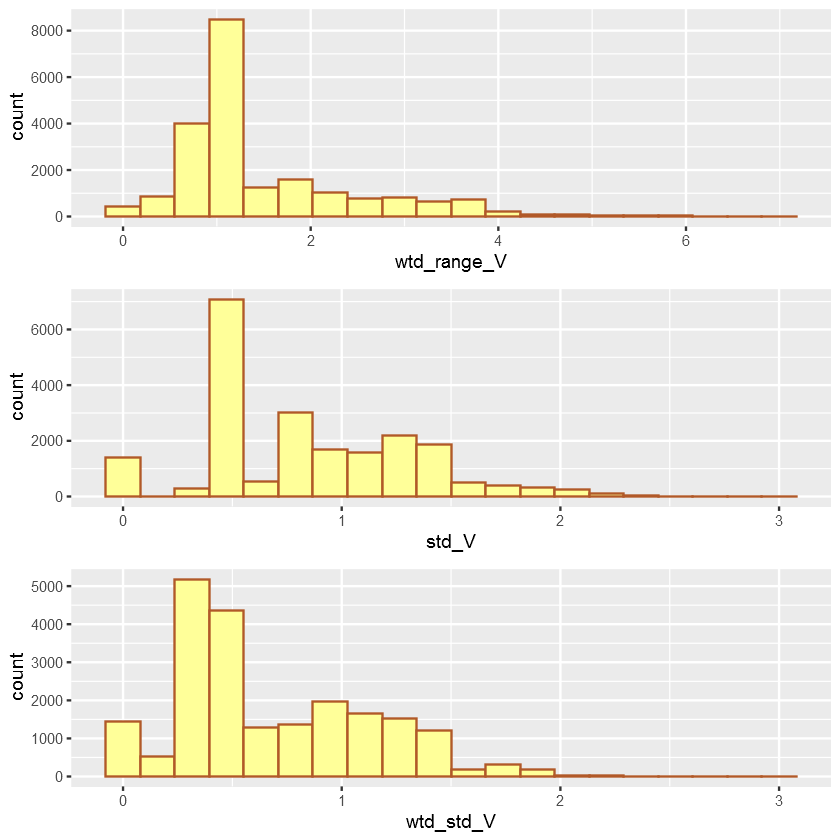

In [347]:
# Histogram visualisations for all features/variables in the dataset train.csv 
p79 <- ggplot(aes(x=wtd_range_V), data=dataset) +
      geom_histogram(bins=20, colour=gg.colour, fill=gg.fill) 

p80 <- ggplot(aes(x=std_V), data=dataset) +
      geom_histogram(bins=20, colour=gg.colour, fill=gg.fill) 

p81 <- ggplot(aes(x=wtd_std_V), data=dataset) +
      geom_histogram(bins=20, colour=gg.colour, fill=gg.fill) 
grid.arrange(p79, p80, p81, ncol=1, nrow=3)

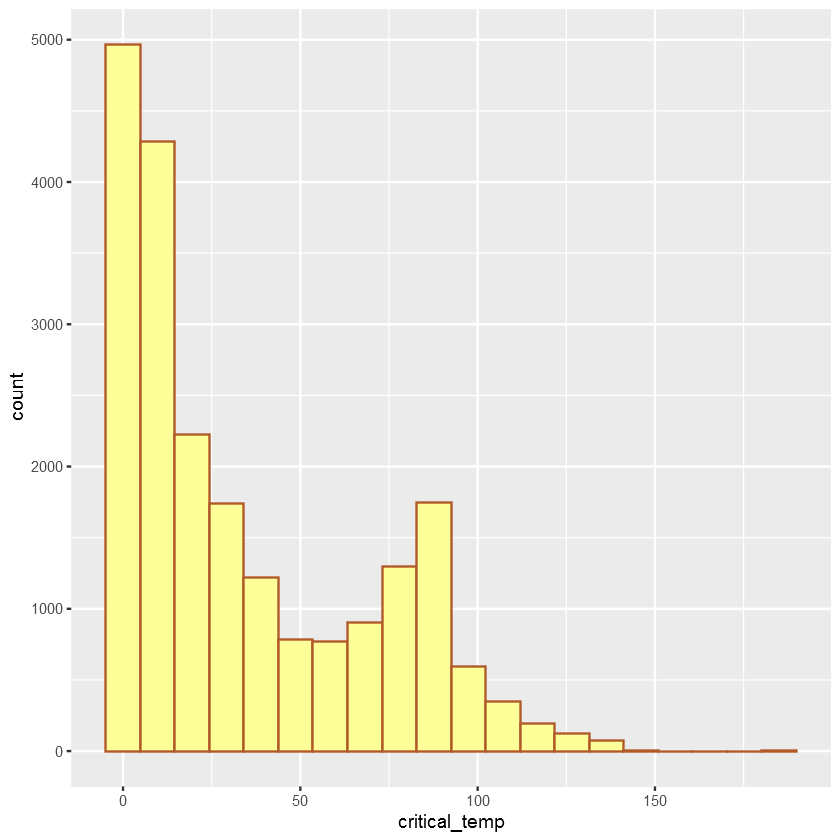

In [348]:
# Histogram visualisations for all features/variables in the dataset train.csv 
p82 <- ggplot(aes(x=critical_temp), data=dataset) +
      geom_histogram(bins=20, colour=gg.colour, fill=gg.fill) 

grid.arrange(p82, ncol=1, nrow=1)

From the output it can observed that the `histogram visualisations` for the features **critical_temp** distribution is a **positively skewed distribution**.

Additionally, from the `histogram visualisations` for all **82 attributes** in the dataset `train.csv` which is stored in a dataframe under the variable name **dataset** all the attributes are predominantly either **positively skewed distributions** or **negatively skewed distributions**. The distinction between the **two distributions is** a **positively skewed distribution** will have a **tail towards the right** as shown: 
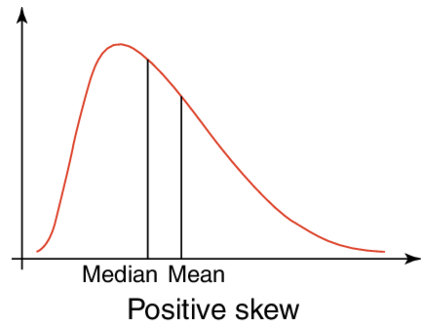

Therefore, in a **positive distribution** the extreme data results are larger, thus, the **skewed data will raise the mean**. Hence, the **mean will be larger than the median** in positive distributions for each of the **positively skewed features respectively**.

Whereas, a **negatively skewed distribution** will have a **tail towards the left** as shown:
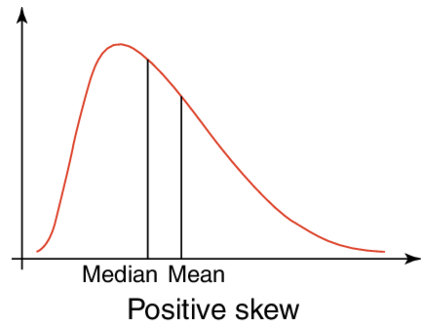


Therefore, in a **negative distribution** the extreme data results are smaller, which means that the **median is larger than the mean** in negative distributions for each of the **negatively skewed features respectively**.

#### 4.2.3 Scatterplot Matrix Analysis 
<a id="Scatterplot Matrix Analysis"></a>

A total of **20 Scatterplot Matrices** were created to examine and visualise the correlations between **critical_temp** and all other **81 attributes/variables** in the dataset **train.csv** which is stored as a dataframe under the variable name `dataset`. 

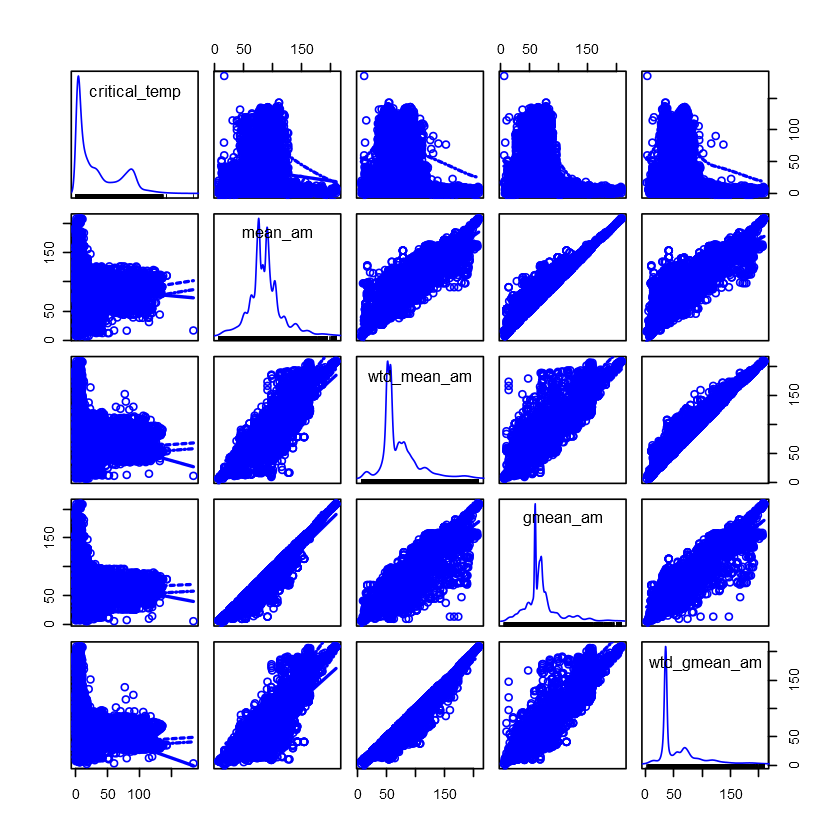

In [20]:
scatterplotMatrix(~critical_temp+mean_am+wtd_mean_am+gmean_am+wtd_gmean_am, data=dataset)

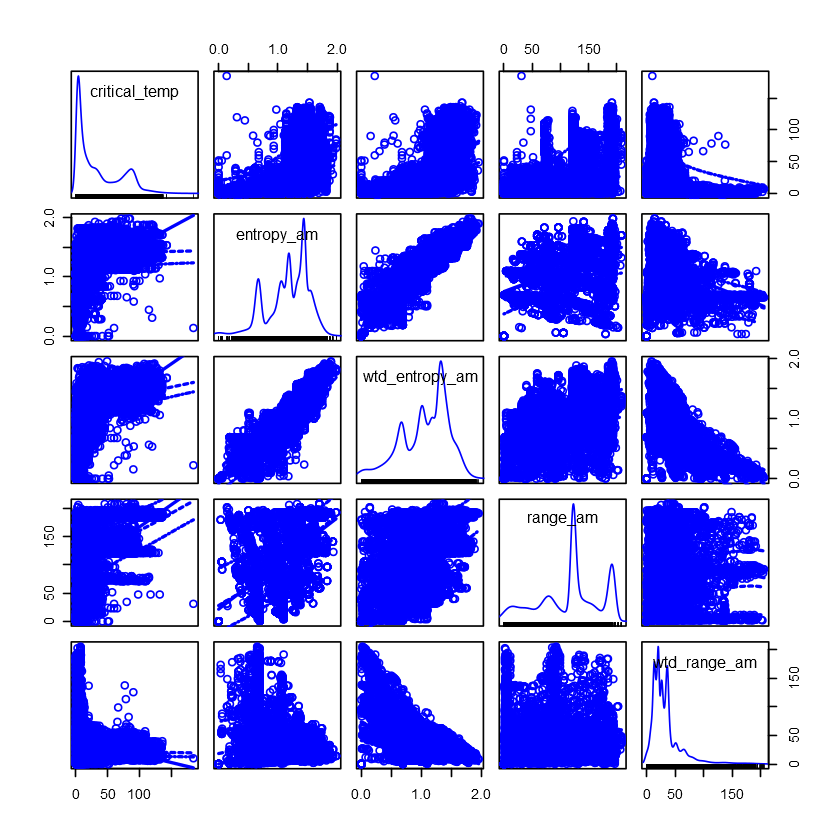

In [21]:
scatterplotMatrix(~critical_temp+entropy_am+wtd_entropy_am+range_am+wtd_range_am, data=dataset)

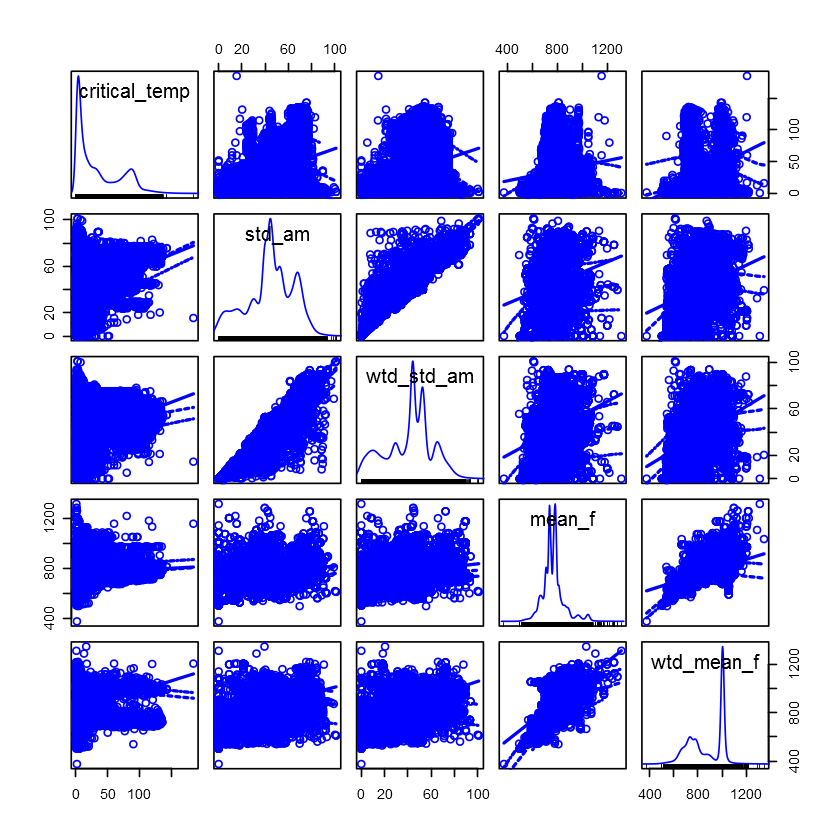

In [22]:
scatterplotMatrix(~critical_temp+std_am+wtd_std_am+mean_f+wtd_mean_f, data=dataset)

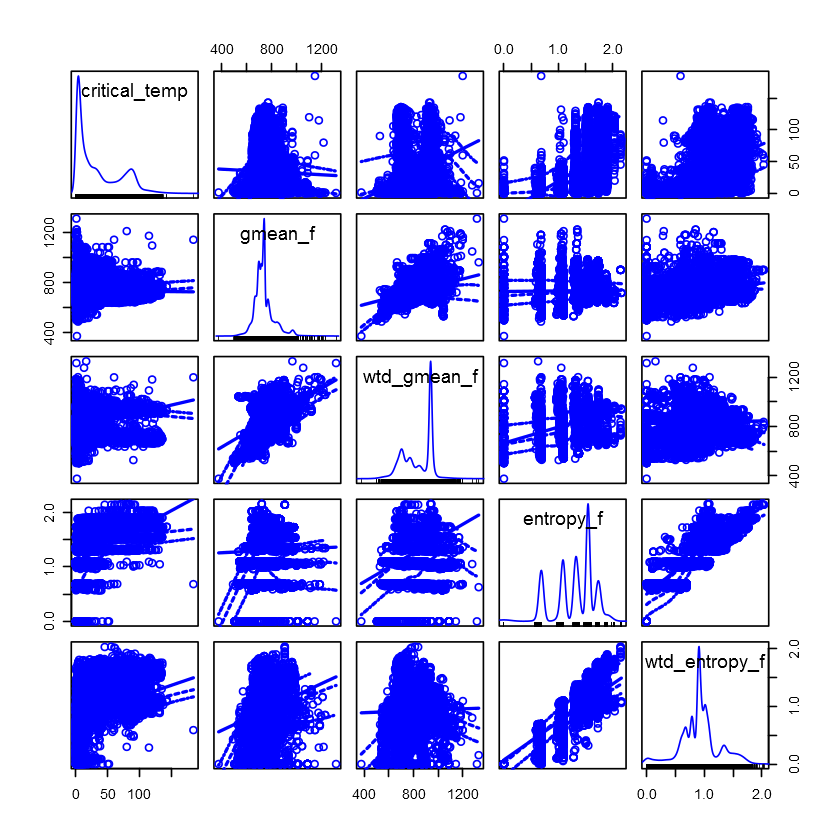

In [23]:
scatterplotMatrix(~critical_temp+gmean_f+wtd_gmean_f+entropy_f+wtd_entropy_f, data=dataset)

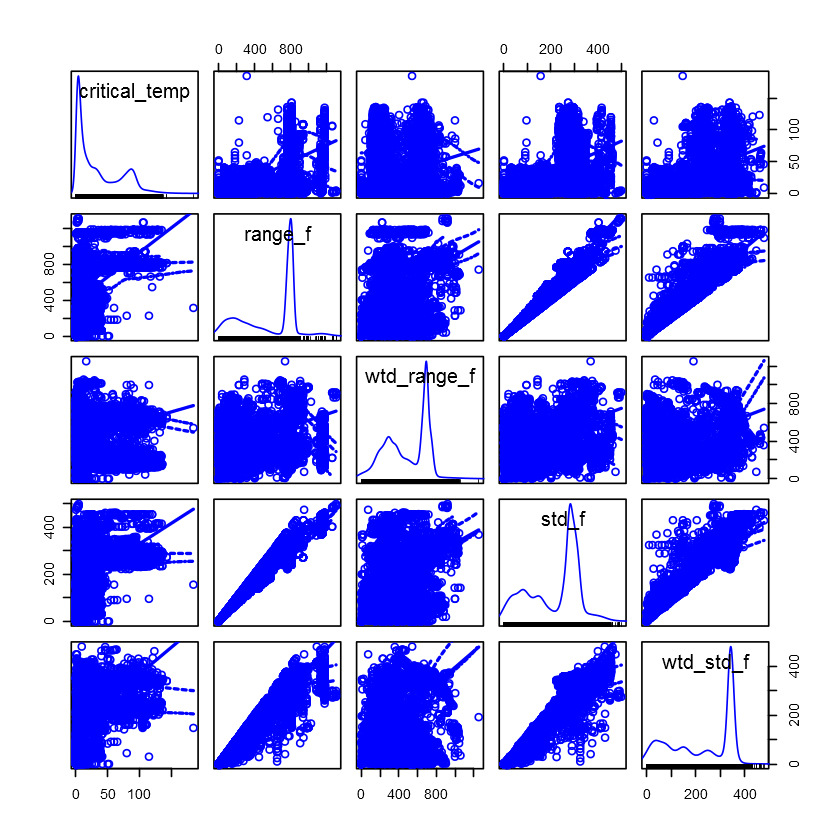

In [24]:
scatterplotMatrix(~critical_temp+range_f+wtd_range_f+std_f+wtd_std_f, data=dataset)

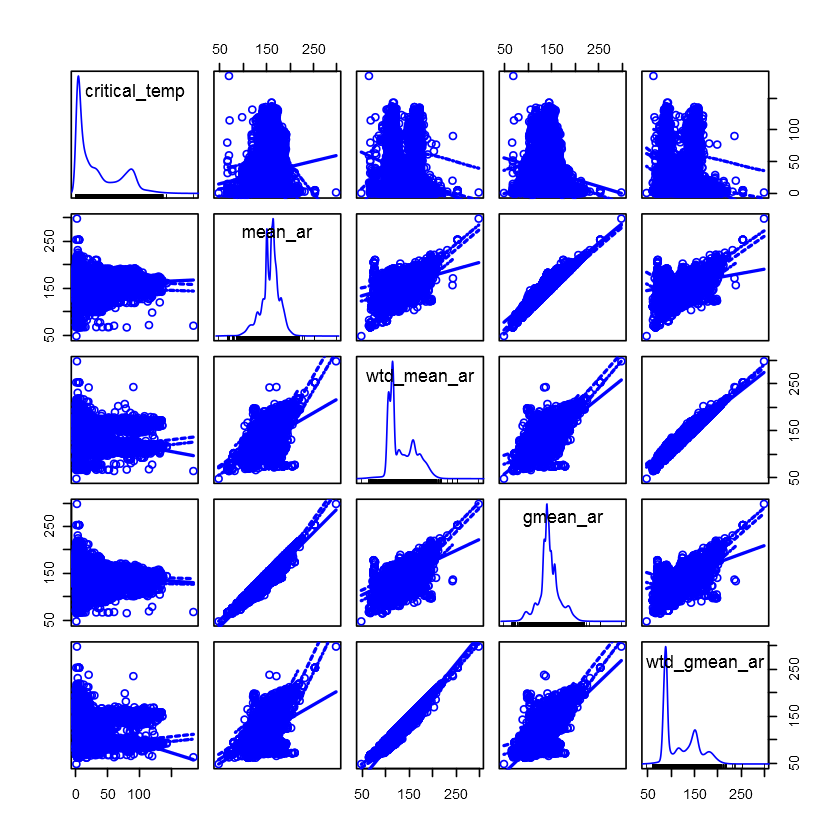

In [25]:
scatterplotMatrix(~critical_temp+mean_ar+wtd_mean_ar+gmean_ar+wtd_gmean_ar, data=dataset)

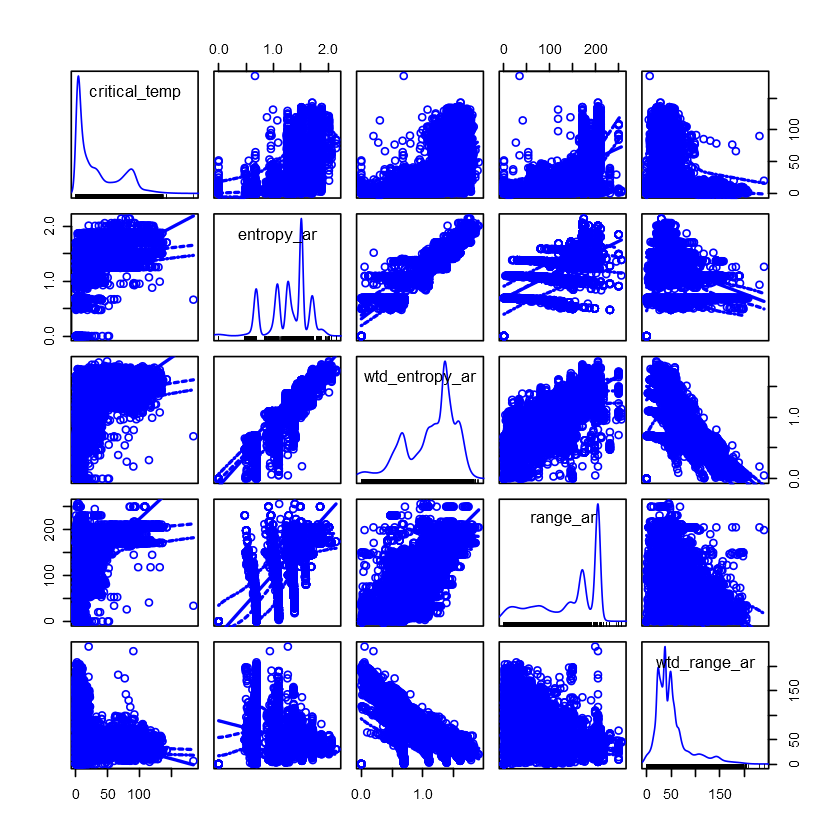

In [26]:
scatterplotMatrix(~critical_temp+entropy_ar+wtd_entropy_ar+range_ar+wtd_range_ar, data=dataset)

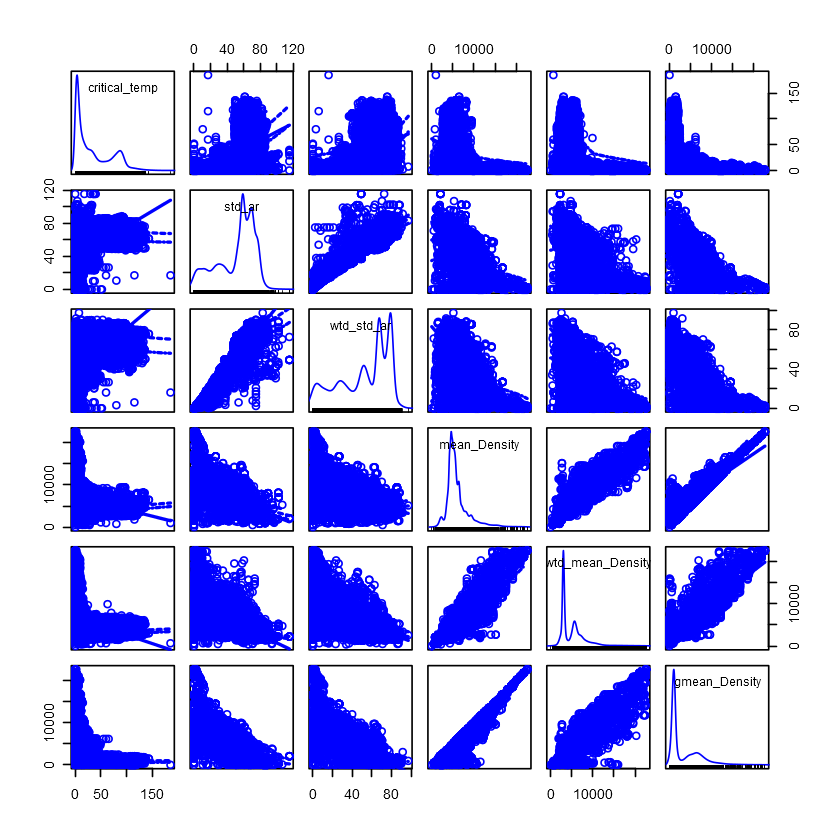

In [27]:
scatterplotMatrix(~critical_temp+std_ar+wtd_std_ar+mean_Density+wtd_mean_Density+gmean_Density, data=dataset)

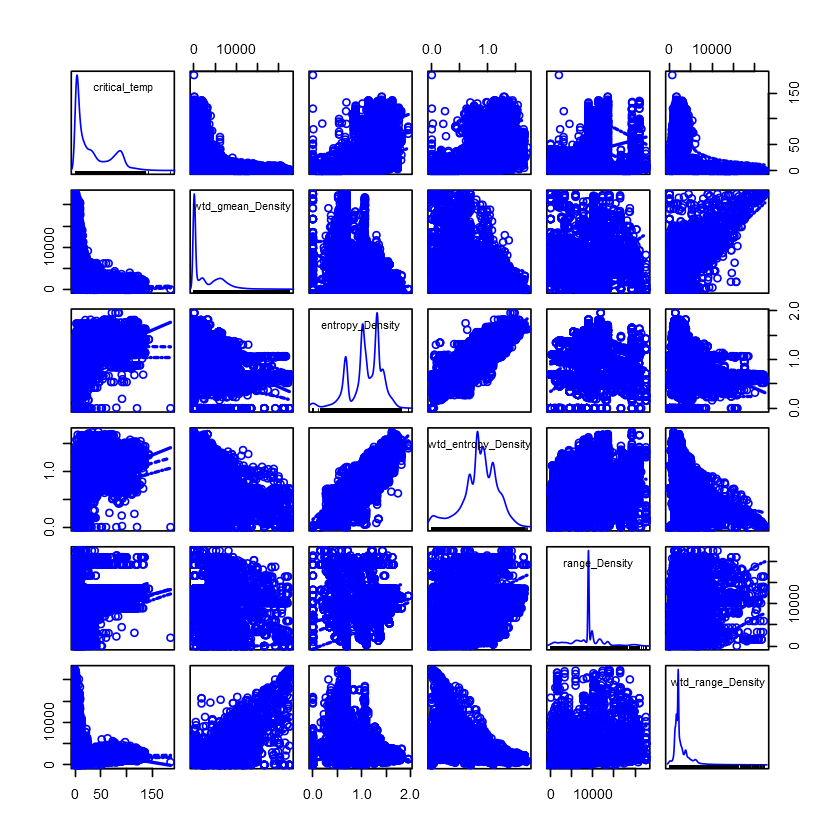

In [28]:
scatterplotMatrix(~critical_temp+wtd_gmean_Density+entropy_Density+wtd_entropy_Density+range_Density+wtd_range_Density, 
                  data=dataset)

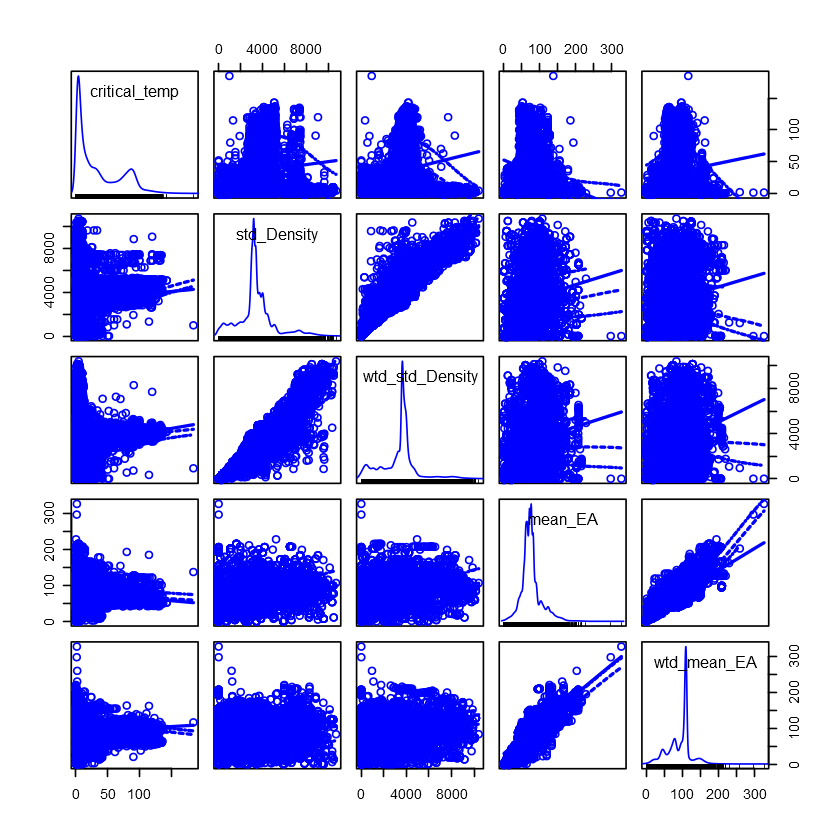

In [29]:
scatterplotMatrix(~critical_temp+std_Density+wtd_std_Density+mean_EA+wtd_mean_EA, data=dataset)

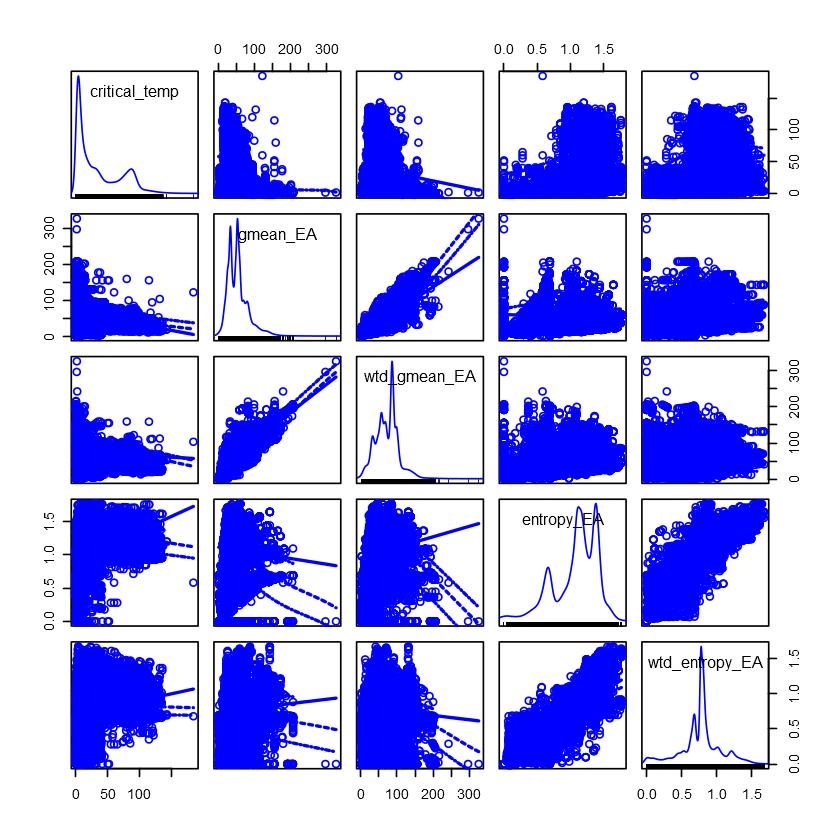

In [30]:
scatterplotMatrix(~critical_temp+gmean_EA+wtd_gmean_EA+entropy_EA+wtd_entropy_EA, data=dataset)

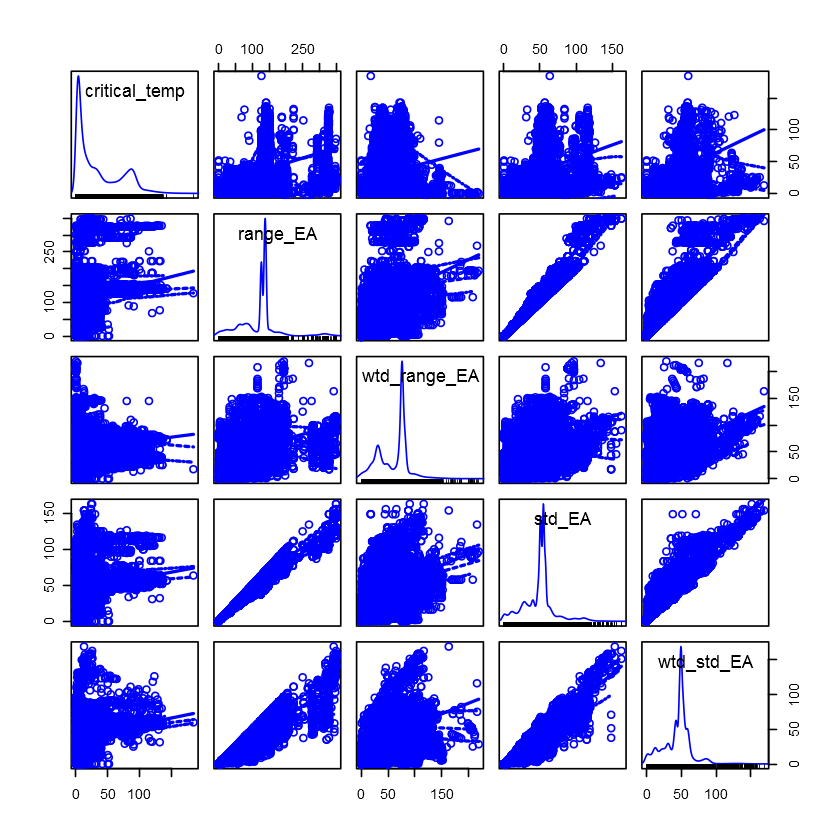

In [31]:
scatterplotMatrix(~critical_temp+range_EA+wtd_range_EA+std_EA+wtd_std_EA, data=dataset)

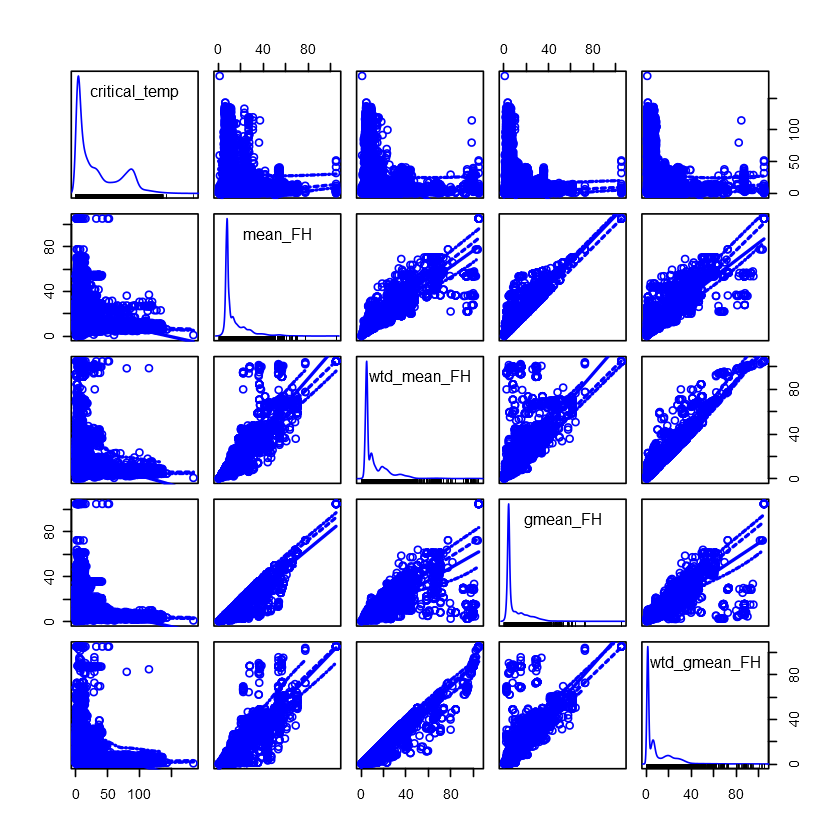

In [32]:
scatterplotMatrix(~critical_temp+mean_FH+wtd_mean_FH+gmean_FH+wtd_gmean_FH, data=dataset)

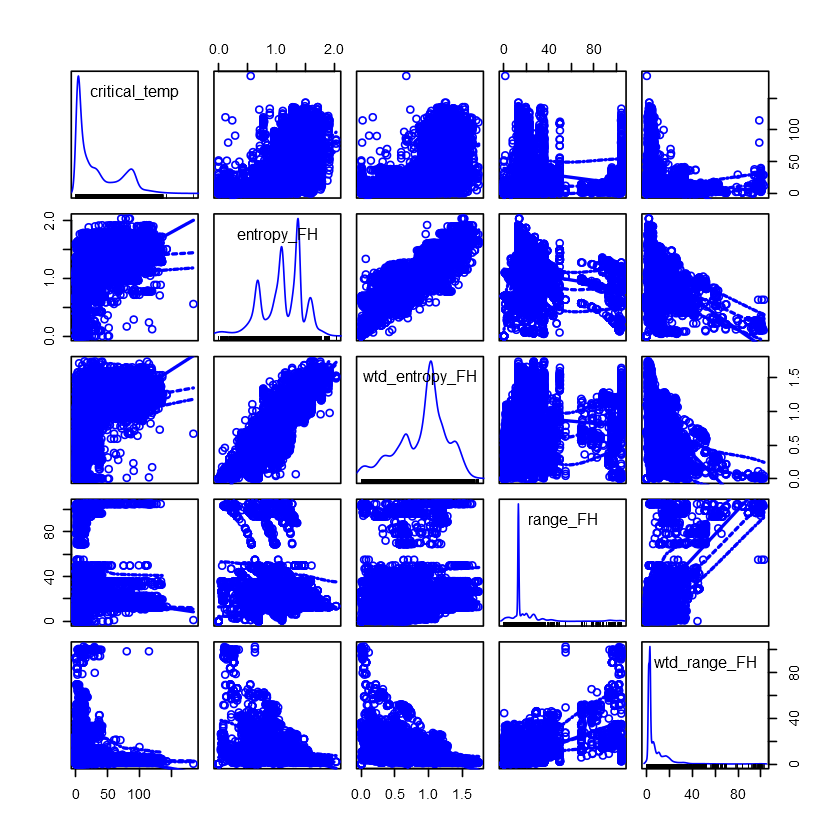

In [33]:
scatterplotMatrix(~critical_temp+entropy_FH+wtd_entropy_FH+range_FH+wtd_range_FH, data=dataset)

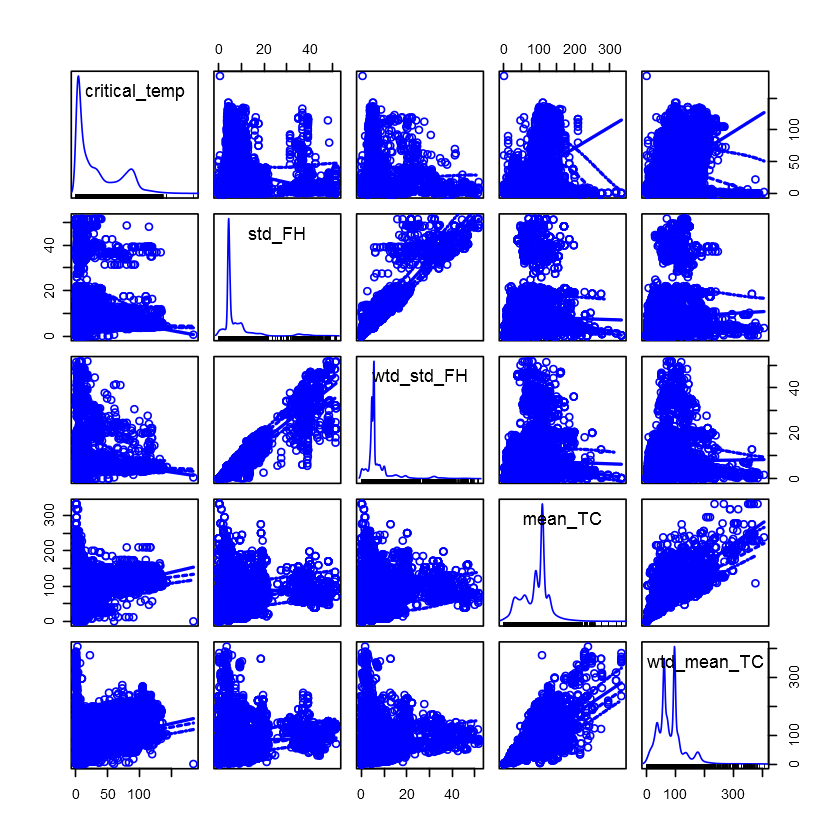

In [34]:
scatterplotMatrix(~critical_temp+std_FH+wtd_std_FH+mean_TC+wtd_mean_TC, data=dataset)

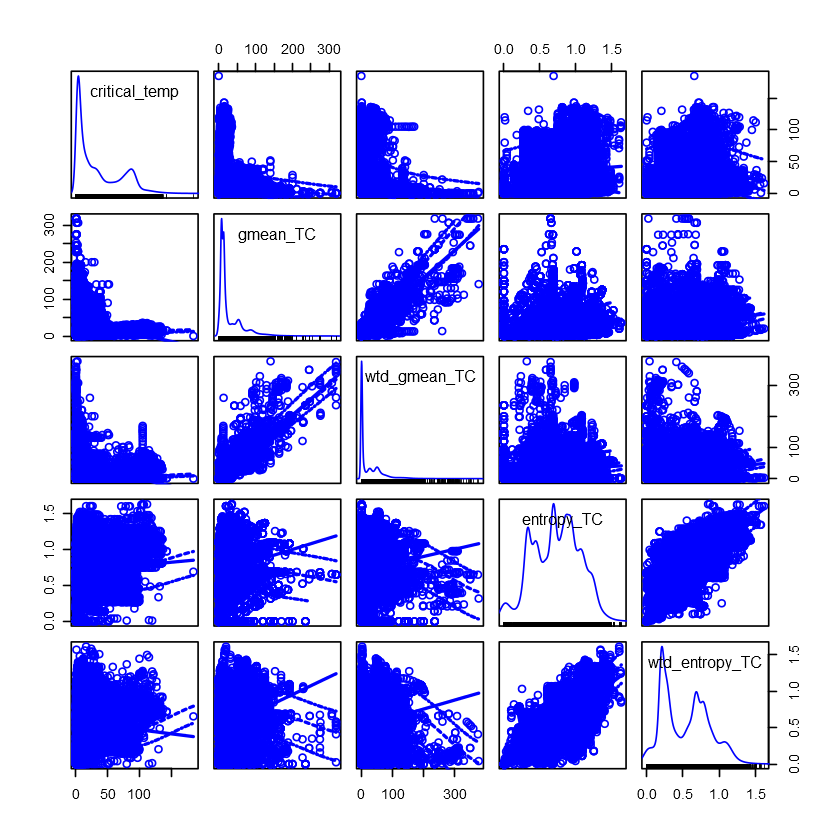

In [35]:
scatterplotMatrix(~critical_temp+gmean_TC+wtd_gmean_TC+entropy_TC+wtd_entropy_TC, data=dataset)

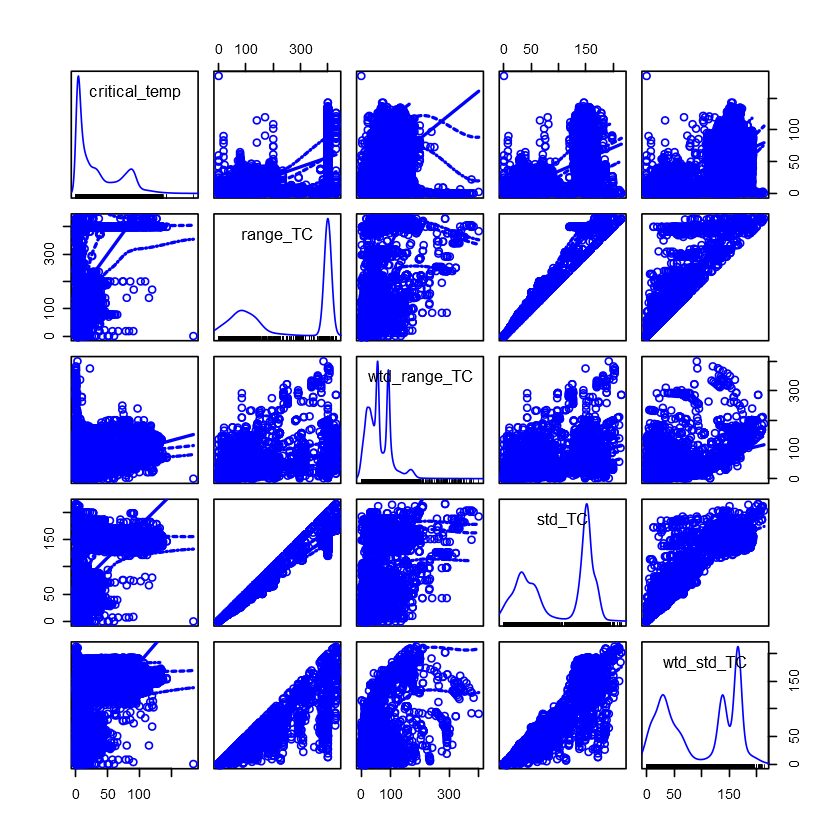

In [36]:
scatterplotMatrix(~critical_temp+range_TC+wtd_range_TC+std_TC+wtd_std_TC, data=dataset)

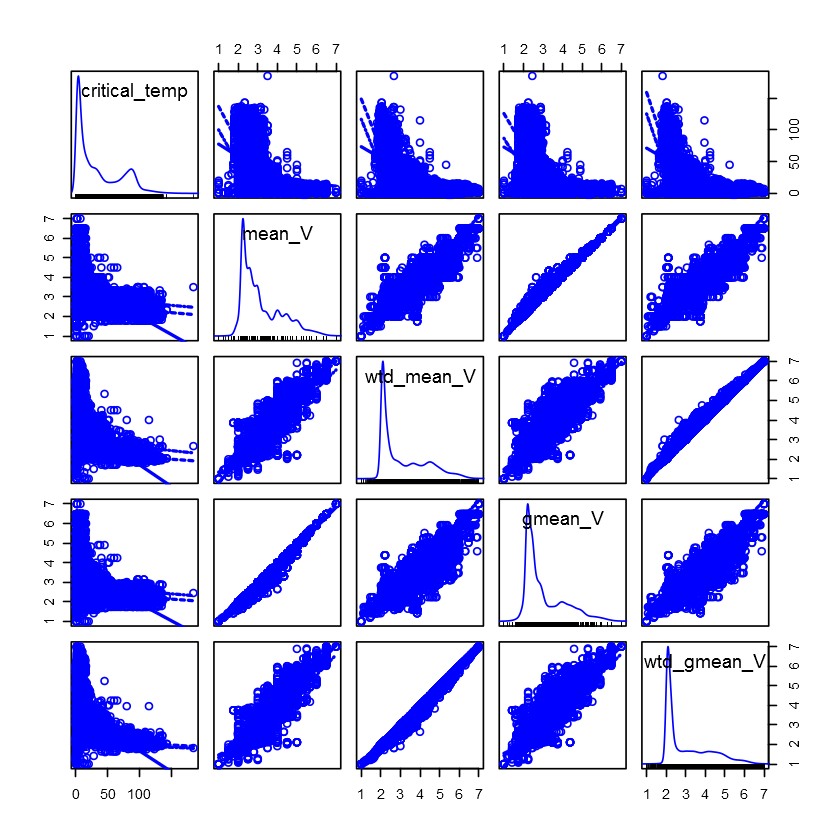

In [37]:
scatterplotMatrix(~critical_temp+mean_V+wtd_mean_V+gmean_V+wtd_gmean_V, data=dataset)

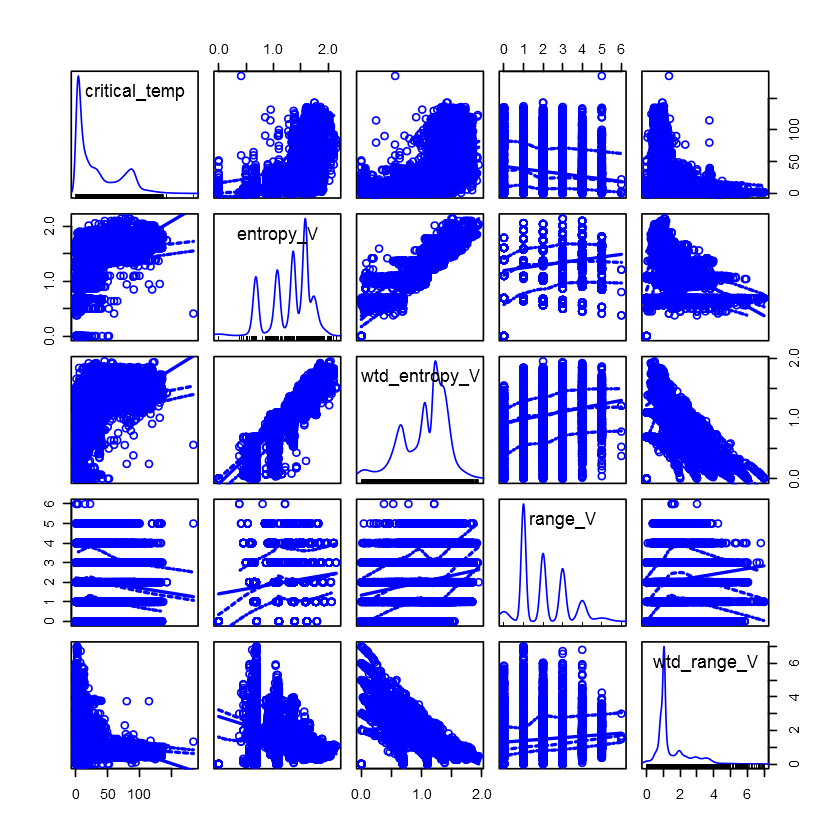

In [38]:
scatterplotMatrix(~critical_temp+entropy_V+wtd_entropy_V+range_V+wtd_range_V, data=dataset)

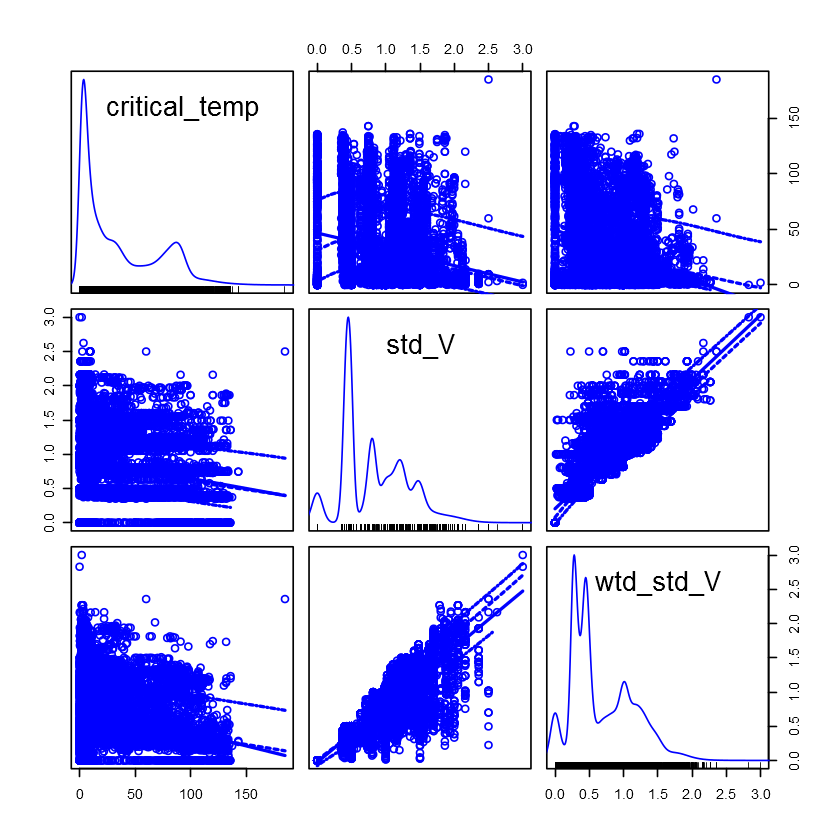

In [39]:
scatterplotMatrix(~critical_temp+std_V+wtd_std_V, data=dataset)

#### 4.2.4 Correlation Matrix Analysis 
<a id="Correlation Matrix Analysis"></a>

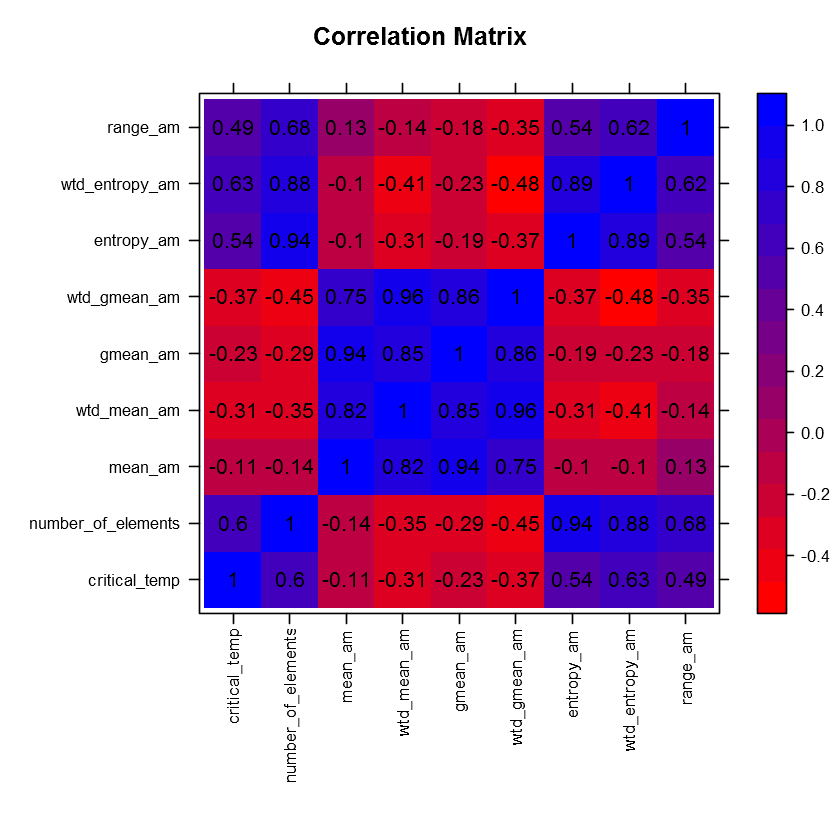

In [40]:
#Define your own panel 
myPanel <- function(x, y, z, ...) {
    panel.levelplot(x, y, z, ...)
    panel.text(x, y, round(z, 2))
}

# Define color scheme
cols = colorRampPalette(c("red", "blue"))
# plot the correlation matrix
levelplot(cor(dataset[, c(82, 1:8)]), col.regions = cols(100), main = "Correlation Matrix", xlab = NULL, ylab = NULL, 
         scales = list(x = list(rot = 90)), panel = myPanel)

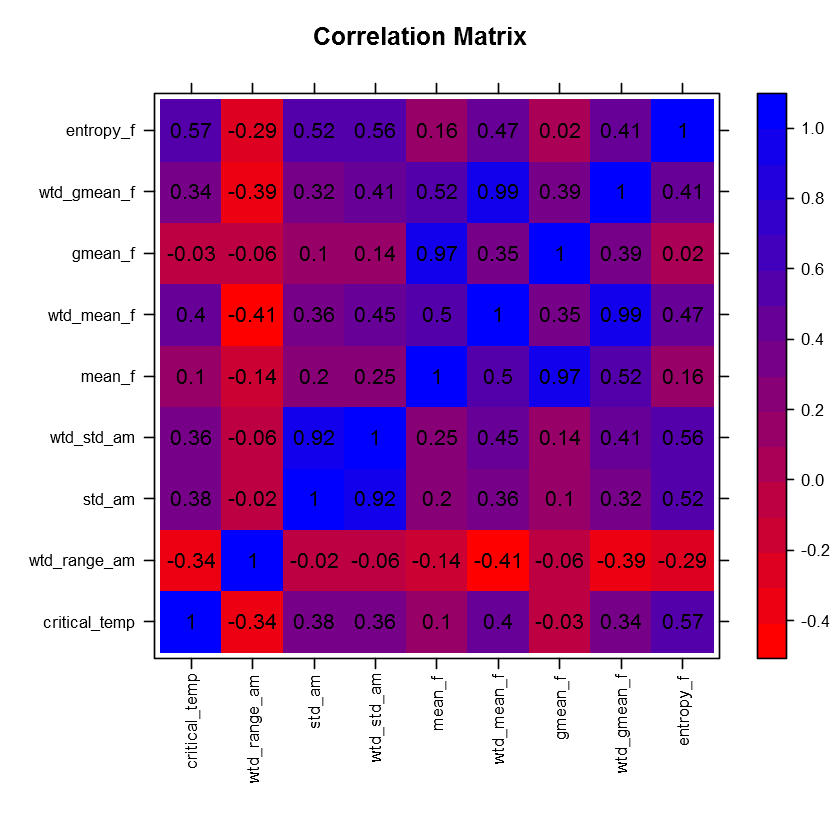

In [41]:
levelplot(cor(dataset[, c(82, 9:16)]), col.regions = cols(100), main = "Correlation Matrix", xlab = NULL, ylab = NULL, 
         scales = list(x = list(rot = 90)), panel = myPanel)

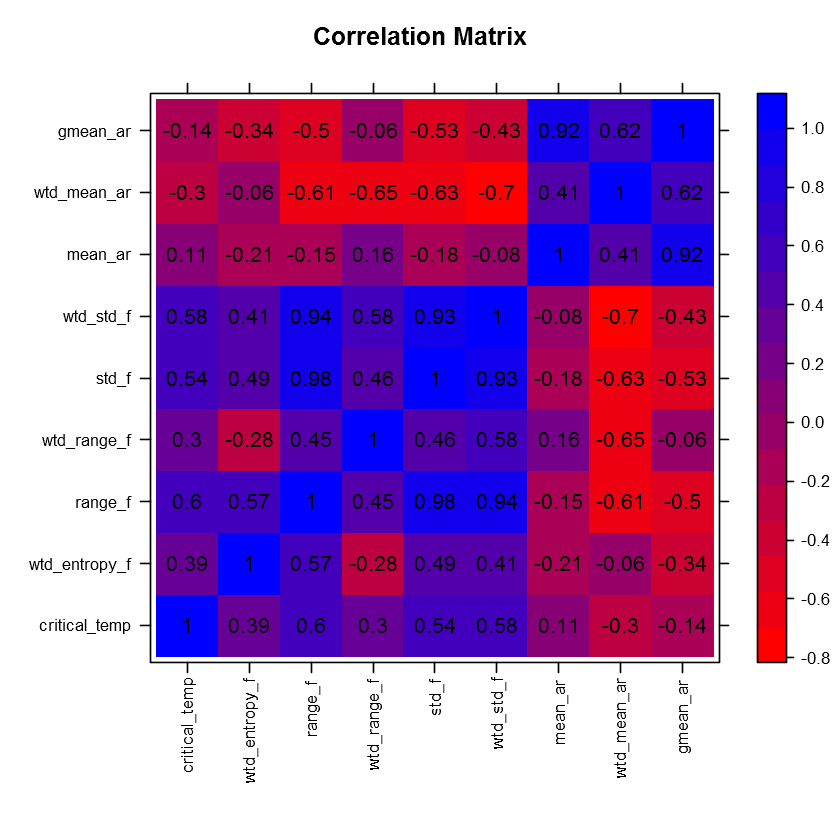

In [42]:
levelplot(cor(dataset[, c(82, 17:24)]), col.regions = cols(100), main = "Correlation Matrix", xlab = NULL, ylab = NULL, 
         scales = list(x = list(rot = 90)), panel = myPanel)

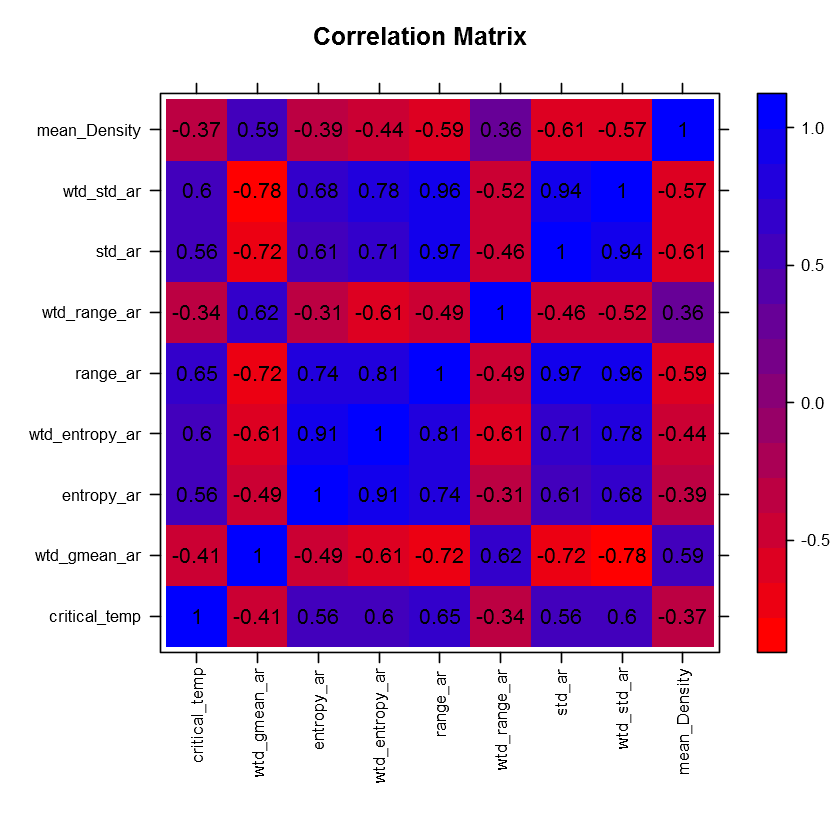

In [43]:
levelplot(cor(dataset[, c(82, 25:32)]), col.regions = cols(100), main = "Correlation Matrix", xlab = NULL, ylab = NULL, 
         scales = list(x = list(rot = 90)), panel = myPanel)

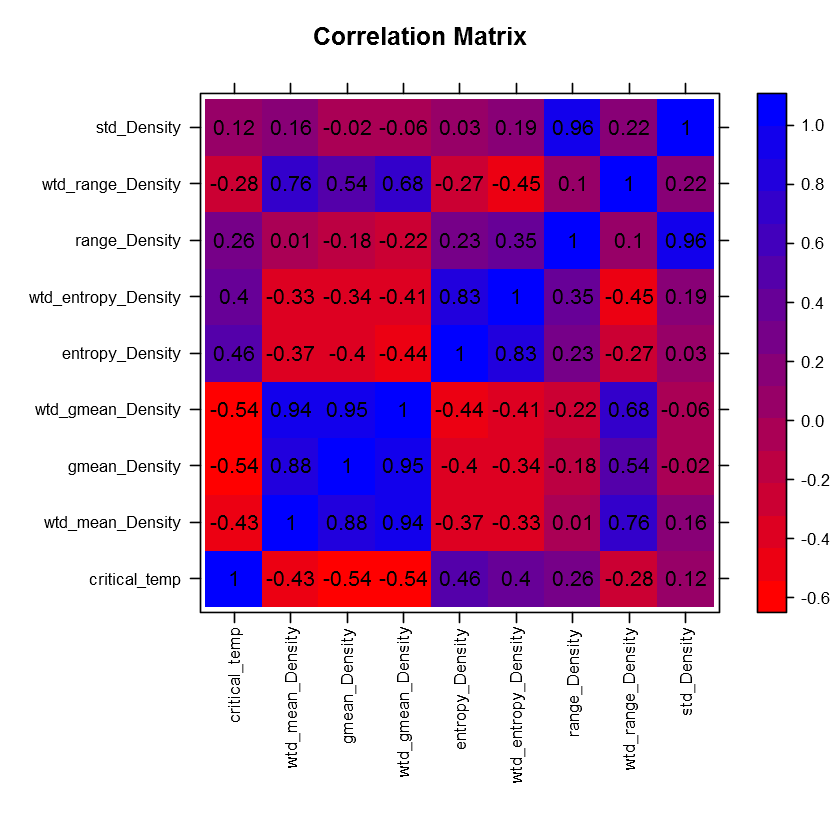

In [44]:
levelplot(cor(dataset[, c(82, 33:40)]), col.regions = cols(100), main = "Correlation Matrix", xlab = NULL, ylab = NULL, 
         scales = list(x = list(rot = 90)), panel = myPanel)

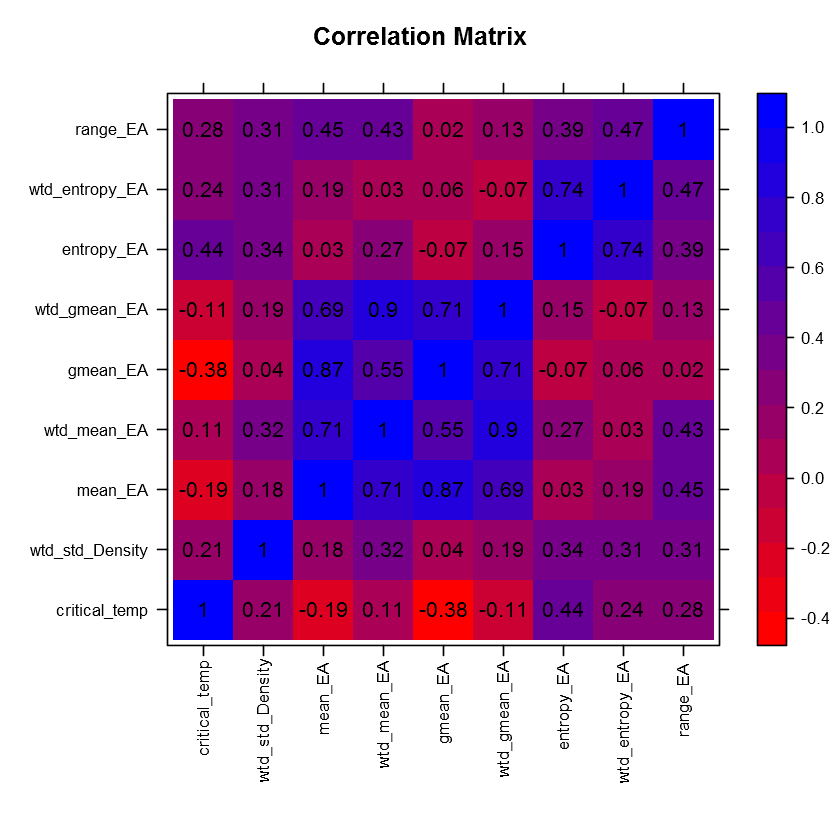

In [45]:
levelplot(cor(dataset[, c(82, 41:48)]), col.regions = cols(100), main = "Correlation Matrix", xlab = NULL, ylab = NULL, 
         scales = list(x = list(rot = 90)), panel = myPanel)

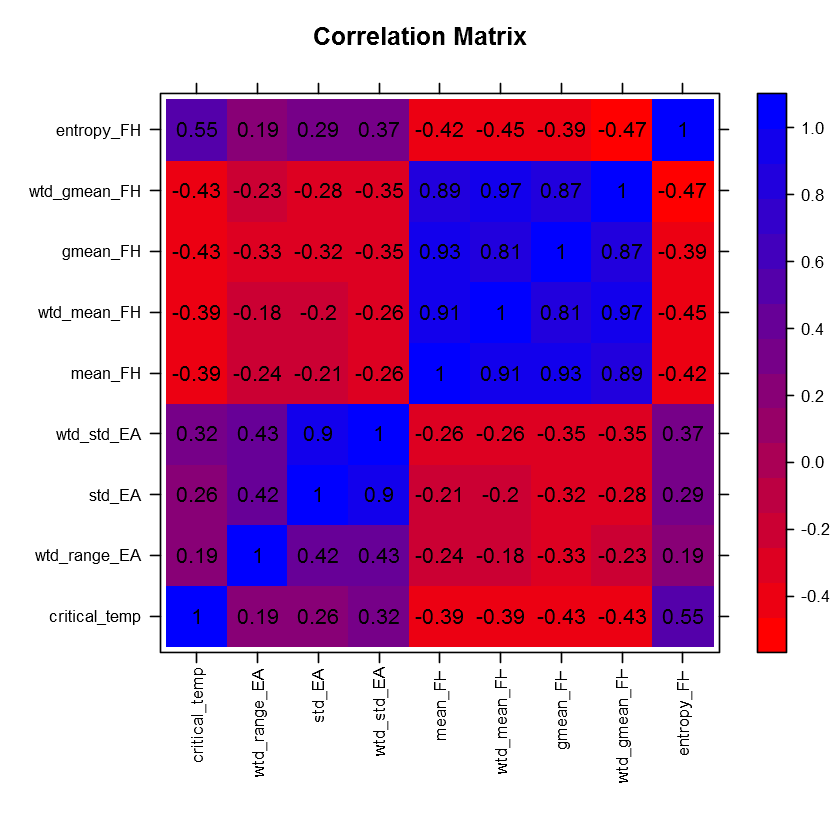

In [46]:
levelplot(cor(dataset[, c(82, 49:56)]), col.regions = cols(100), main = "Correlation Matrix", xlab = NULL, ylab = NULL, 
         scales = list(x = list(rot = 90)), panel = myPanel)

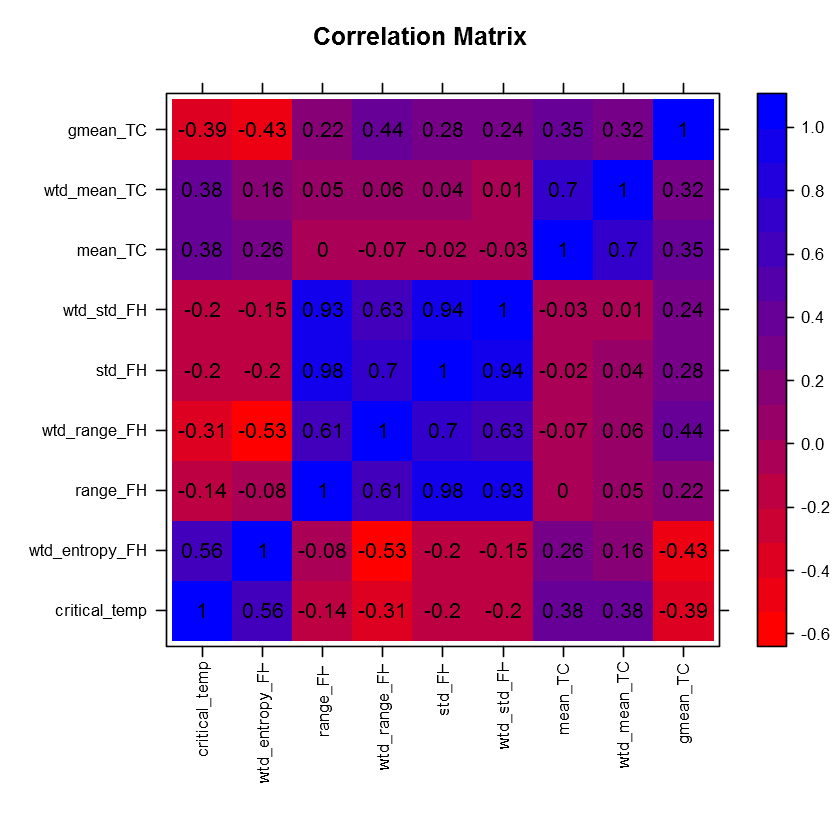

In [47]:
levelplot(cor(dataset[, c(82, 57:64)]), col.regions = cols(100), main = "Correlation Matrix", xlab = NULL, ylab = NULL, 
         scales = list(x = list(rot = 90)), panel = myPanel)

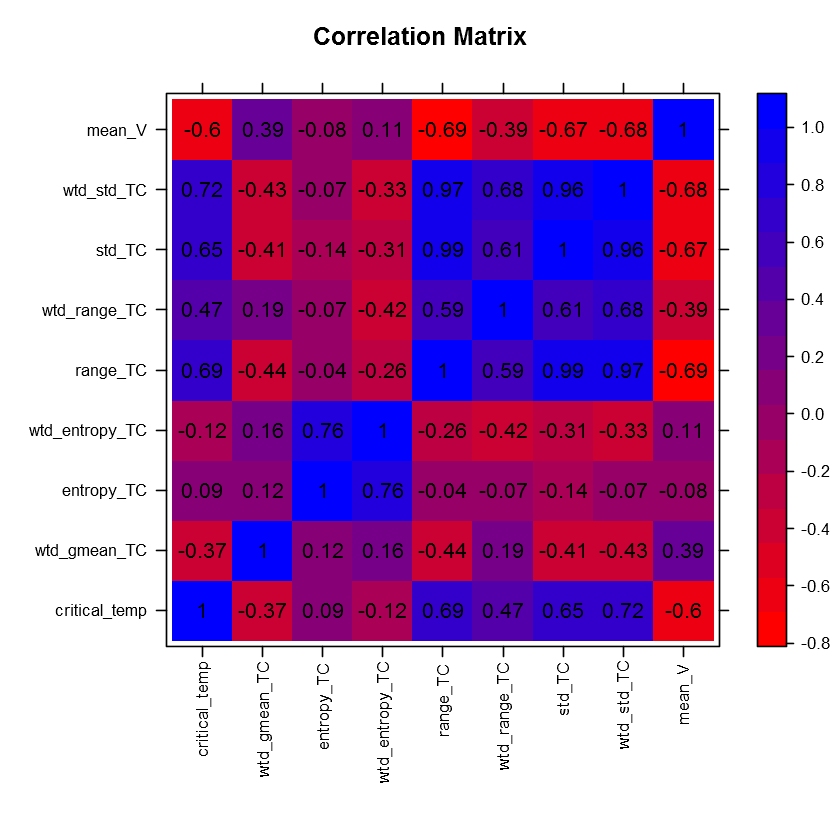

In [48]:
levelplot(cor(dataset[, c(82, 65:72)]), col.regions = cols(100), main = "Correlation Matrix", xlab = NULL, ylab = NULL, 
         scales = list(x = list(rot = 90)), panel = myPanel)

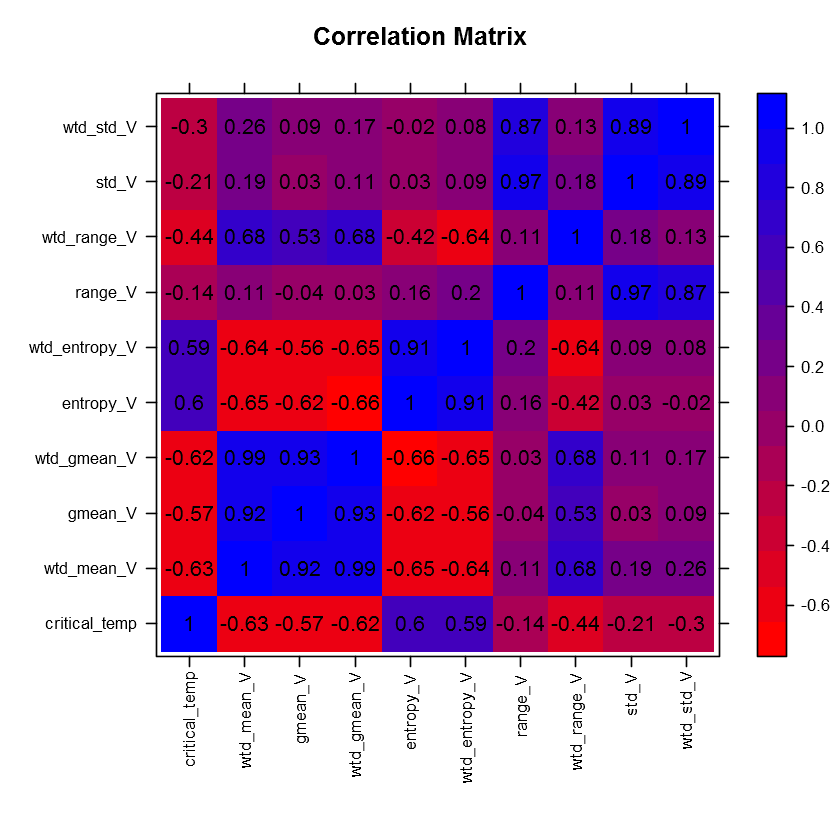

In [49]:
levelplot(cor(dataset[, c(82, 73:81)]), col.regions = cols(100), main = "Correlation Matrix", xlab = NULL, ylab = NULL, 
         scales = list(x = list(rot = 90)), panel = myPanel)

## 5. Data preprocessing and Reformatting
<a id="Data preprocessing and Reformatting"></a>

### 5.1 Multicollinearity Detection 
<a id="Multicollinearity Detection"></a>

To avoid and fix multicollinearity in the dataset `train.csv` a dataframe was constructed from the **correlation matrix for the dataset train.csv** and a **single variable** out of all **feature/variable pairs with correlation greater than 97%** will be removed from the dataframe `dataset` and stored under the variable name `feature_selected_dataset`.

In [487]:
correl <- cor(dataset) # correlation for original dataset `train.csv` 

# now remove redundancies as the upper correlation matrix is equivalent to the lower correlation matrix 
correl[upper.tri(correl, diag=TRUE)] <- NA # make upper triangle and diagnoal correlations in correlation table NA/Null values 
cor.df <- reshape2::melt(correl, na.rm=TRUE, value.name="cor")# create dataframe of feature pairs and corresponding correlations

In [488]:
cor.df[cor.df$cor > 0.97,] # return all variable/feature pairs with correlation greater than 97% 

Var1         Var2               cor  
16   entropy_f    number_of_elements 0.973
26   entropy_ar   number_of_elements 0.972
436  entropy_ar   entropy_am         0.972
999  wtd_gmean_f  wtd_mean_f         0.992
1256 entropy_ar   entropy_f          0.998
1306 entropy_V    entropy_f          0.993
1414 std_f        range_f            0.982
1829 wtd_gmean_ar wtd_mean_ar        0.980
2126 entropy_V    entropy_ar         0.990
3904 std_EA       range_EA           0.973
4319 wtd_gmean_FH wtd_mean_FH        0.971
4734 std_FH       range_FH           0.985
5564 std_TC       range_TC           0.988
5896 gmean_V      mean_V             0.990
5979 wtd_gmean_V  wtd_mean_V         0.995
6394 std_V        range_V            0.974

In [489]:
del_col_names <- as.vector(cor.df[cor.df$cor > 0.97,]$Var1) # column/feature names for variables with grater than 97% correlati 

In [490]:
feature_selected_dataset <- dataset[,!names(dataset) %in% del_col_names] # remove columns with more than 97% correlation

In [491]:
dim(dataset) # number of rows x columns for orignal dataset 
dim(feature_selected_dataset) # number of rows x columns for feature selected dataset 

[1] 21263    82

[1] 21263    69

In [492]:
head(feature_selected_dataset)

number_of_elements mean_am wtd_mean_am gmean_am wtd_gmean_am entropy_am
1 4                  88.9    57.9        66.4     36.1         1.18      
2 5                  92.7    58.5        73.1     36.4         1.45      
3 4                  88.9    57.9        66.4     36.1         1.18      
4 4                  88.9    57.9        66.4     36.1         1.18      
5 4                  88.9    57.8        66.4     36.1         1.18      
6 4                  88.9    57.8        66.4     36.1         1.18      
  wtd_entropy_am range_am wtd_range_am std_am ... range_TC wtd_range_TC
1 1.062          123      31.8         52.0   ... 400      57.1        
2 1.058          123      36.2         47.1   ... 430      51.4        
3 0.976          123      35.7         52.0   ... 400      57.1        
4 1.022          123      33.8         52.0   ... 400      57.1        
5 1.129          123      27.8         52.0   ... 400      57.1        
6 1.225          123      20.7         52.0   ... 400      57.1        
  wtd_std_TC mean_V wtd_mean_V wtd_entropy_V range_V wtd_range_V wtd_std_V
1 139        2.25   2.26       1.07          1       1.09        0.437    
2 140        2.00   2.26       1.05          2       1.13        0.469    
3 139        2.25   2.27       1.03          1       1.11        0.445    
4 139        2.25   2.26       1.05          1       1.10        0.441    
5 138        2.25   2.24       1.10          1       1.06        0.429    
6 138        2.25   2.21       1.14          1       1.00        0.410    
  critical_temp
1 29           
2 26           
3 19           
4 22           
5 23           
6 23

### 5.2 Data Transformation for reducing skewness  
<a id="Data Transformation for reducing skewness"></a>

In [460]:
transform_cols <- c("mean_am", "wtd_mean_am", "gmean_am", "wtd_gmean_am", "wtd_range_am", "wtd_mean_Density", 
                    "gmean_Density", "critical_temp")
feature_selected_dataset[transform_cols] <- log10(feature_selected_dataset[transform_cols])

## 6. Split the dataset into training set and testing set 
<a id="Split the dataset into training set and testing set"></a>

### 6.1 Initial dataset training set and testing set split
<a id="Initial dataset training set and testing set split"></a>

In [486]:
# ensures pseudo-random numbers is reproducible 
set.seed(100)

# create a list of random numbers randing from 1 to number of rows in the dataset train.csv which stored under the variable 
# name dataset 
row.number <- sort(sample(nrow(dataset), nrow(dataset)*0.8)) # 80/20 split where 80% data for training and 20% data for testing 

train.data <- dataset[row.number,] # training dataset
test.data <- dataset[-row.number,] # testing dataset

#### 6.1.1 Initial Dataset Training Set and Testing Set Split Exploratory Data Analysis
<a id="Initial Dataset Training Set and Testing Set Split Exploratory Data Analysis"></a>

In [462]:
dim(train.data) # examine the number of rows x columns in the training dataset 
dim(test.data) # examine the number of rows x columns in the testing dataset 

[1] 17010    82

[1] 4253   82

In [463]:
head(train.data) # examine first six rows in training dataset 
head(test.data) # examine first six rows in testing dataset 

number_of_elements mean_am wtd_mean_am gmean_am wtd_gmean_am entropy_am
1 4                  88.9    57.9        66.4     36.1         1.18      
2 5                  92.7    58.5        73.1     36.4         1.45      
4 4                  88.9    57.9        66.4     36.1         1.18      
5 4                  88.9    57.8        66.4     36.1         1.18      
6 4                  88.9    57.8        66.4     36.1         1.18      
7 4                  88.9    57.7        66.4     36.1         1.18      
  wtd_entropy_am range_am wtd_range_am std_am ... wtd_mean_V gmean_V
1 1.06           123      31.8         52.0   ... 2.26       2.21   
2 1.06           123      36.2         47.1   ... 2.26       1.89   
4 1.02           123      33.8         52.0   ... 2.26       2.21   
5 1.13           123      27.8         52.0   ... 2.24       2.21   
6 1.23           123      20.7         52.0   ... 2.21       2.21   
7 1.32           123      10.8         52.0   ... 2.14       2.21   
  wtd_gmean_V entropy_V wtd_entropy_V range_V wtd_range_V std_V wtd_std_V
1 2.22        1.37      1.07          1       1.086       0.433 0.437    
2 2.21        1.56      1.05          2       1.129       0.632 0.469    
4 2.23        1.37      1.05          1       1.100       0.433 0.441    
5 2.21        1.37      1.10          1       1.057       0.433 0.429    
6 2.18        1.37      1.14          1       1.000       0.433 0.410    
7 2.12        1.37      1.19          1       0.857       0.433 0.350    
  critical_temp
1 29           
2 26           
4 22           
5 23           
6 23           
7 11

number_of_elements mean_am wtd_mean_am gmean_am wtd_gmean_am entropy_am
3  4                  88.9     57.9       66.4     36.1         1.18      
8  4                  76.5     57.2       59.3     35.9         1.20      
15 5                  92.7     59.5       73.1     36.8         1.45      
16 5                  92.7     61.1       73.1     37.5         1.45      
30 4                  97.5    104.6       70.1     73.4         1.15      
54 4                  91.8     90.2       67.7     73.5         1.17      
   wtd_entropy_am range_am wtd_range_am std_am ... wtd_mean_V gmean_V
3  0.976          123      35.7         52.0   ... 2.27       2.21   
8  0.944          123      36.5         44.3   ... 2.27       2.21   
15 1.115          123      35.7         47.1   ... 2.24       1.89   
16 1.147          123      35.7         47.1   ... 2.20       1.89   
30 0.810          157      73.9         61.4   ... 2.45       2.21   
54 1.158          134      37.0         54.9   ... 2.14       2.21   
   wtd_gmean_V entropy_V wtd_entropy_V range_V wtd_range_V std_V wtd_std_V
3  2.23        1.37      1.03          1       1.114       0.433 0.445    
8  2.23        1.37      1.03          1       1.114       0.433 0.445    
15 2.18        1.56      1.06          2       1.114       0.632 0.502    
16 2.12        1.56      1.05          2       1.114       0.632 0.550    
30 2.40        1.37      1.11          1       1.250       0.433 0.497    
54 2.12        1.37      1.31          1       0.571       0.433 0.350    
   critical_temp
3  19.0         
8  33.0         
15 26.0         
16 27.0         
30 65.3         
54 43.0

In [464]:
summary(train.data)

 number_of_elements    mean_am       wtd_mean_am       gmean_am    
 Min.   :1.00       Min.   :  6.9   Min.   :  6.4   Min.   :  5.3  
 1st Qu.:3.00       1st Qu.: 72.4   1st Qu.: 52.1   1st Qu.: 58.0  
 Median :4.00       Median : 84.7   Median : 60.5   Median : 66.4  
 Mean   :4.12       Mean   : 87.4   Mean   : 72.8   Mean   : 71.1  
 3rd Qu.:5.00       3rd Qu.:100.4   3rd Qu.: 85.6   3rd Qu.: 77.8  
 Max.   :9.00       Max.   :209.0   Max.   :209.0   Max.   :209.0  
  wtd_gmean_am     entropy_am    wtd_entropy_am     range_am    
 Min.   :  2.0   Min.   :0.000   Min.   :0.000   Min.   :  0.0  
 1st Qu.: 35.2   1st Qu.:0.973   1st Qu.:0.783   1st Qu.: 78.9  
 Median : 39.8   Median :1.200   Median :1.149   Median :122.9  
 Mean   : 58.4   Mean   :1.167   Mean   :1.066   Mean   :115.8  
 3rd Qu.: 72.6   3rd Qu.:1.445   3rd Qu.:1.361   3rd Qu.:154.1  
 Max.   :209.0   Max.   :1.984   Max.   :1.945   Max.   :208.0  
  wtd_range_am       std_am        wtd_std_am        mean_f       wtd

In [465]:
round(describe(train.data), 3)

vars n     mean    sd      median  trimmed mad     min   
number_of_elements  1   17010   4.120   1.435   4.000   4.112   1.483   1.00
mean_am             2   17010  87.432  29.561  84.711  85.663  19.649   6.94
wtd_mean_am         3   17010  72.843  33.471  60.529  68.195  18.160   6.42
gmean_am            4   17010  71.121  30.920  66.362  67.442  14.837   5.32
wtd_gmean_am        5   17010  58.372  36.613  39.804  51.858  14.979   1.96
entropy_am          6   17010   1.167   0.365   1.200   1.194   0.360   0.00
wtd_entropy_am      7   17010   1.066   0.402   1.149   1.095   0.371   0.00
range_am            8   17010 115.771  54.422 122.906 118.951  60.427   0.00
wtd_range_am        9   17010  33.173  27.110  26.504  28.589  15.965   0.00
std_am             10   17010  44.438  19.975  45.123  45.382  19.072   0.00
wtd_std_am         11   17010  41.465  19.899  44.286  42.095  17.166   0.00
mean_f             12   17010 770.286  87.451 765.850 763.692  53.596 496.85
wtd_mean_f         13   17010 871.303 142.816 892.111 880.078 172.092 502.50
gmean_f            14   17010 738.048  78.406 728.706 730.681  53.702 490.63
wtd_gmean_f        15   17010 833.512 119.334 858.566 840.428 125.462 502.50
entropy_f          16   17010   1.301   0.381   1.359   1.327   0.389   0.00
wtd_entropy_f      17   17010   0.928   0.334   0.918   0.925   0.221   0.00
range_f            18   17010 573.992 308.842 764.100 594.926  68.941   0.00
wtd_range_f        19   17010 484.175 224.143 514.805 495.680 273.017   0.00
std_f              20   17010 216.265 109.576 267.260 222.385  76.788   0.00
wtd_std_f          21   17010 224.669 127.671 258.723 233.850 135.858   0.00
mean_ar            22   17010 157.907  20.101 160.200 158.926  15.419  48.00
wtd_mean_ar        23   17010 134.568  28.666 125.843 132.132  28.600  48.00
gmean_ar           24   17010 144.320  22.006 142.333 144.099  15.721  48.00
wtd_gmean_ar       25   17010 120.788  35.707 113.168 117.309  39.601  48.00
entropy_ar         26   17010   1.269   0.374   1.332   1.294   0.353   0.00
wtd_entropy_ar     27   17010   1.133   0.407   1.245   1.170   0.349   0.00
range_ar           28   17010 139.728  67.047 171.000 147.271  50.408   0.00
wtd_range_ar       29   17010  51.242  34.979  42.960  45.566  22.550   0.00
std_ar             30   17010  51.749  22.817  58.667  53.933  18.700   0.00
...                ...  ...   ...     ...     ...     ...     ...     ...   
wtd_mean_FH        53   17010  13.799  14.202   8.321  10.913  5.664  0.222 
gmean_FH           54   17010  10.103  10.033   5.216   8.116  2.575  0.222 
wtd_gmean_FH       55   17010  10.082  13.067   4.899   7.570  5.437  0.222 
entropy_FH         56   17010   1.094   0.375   1.112   1.115  0.394  0.000 
wtd_entropy_FH     57   17010   0.915   0.369   0.996   0.939  0.330  0.000 
range_FH           58   17010  21.197  20.425  12.878  16.932  5.305  0.000 
wtd_range_FH       59   17010   8.191  11.320   3.433   5.903  2.606  0.000 
std_FH             60   17010   8.340   8.680   4.948   6.394  1.675  0.000 
wtd_std_FH         61   17010   7.730   7.298   5.505   6.238  1.841  0.000 
mean_TC            62   17010  89.888  38.666  96.605  90.097 29.249  0.027 
wtd_mean_TC        63   17010  81.733  45.617  73.668  77.094 35.673  0.027 
gmean_TC           64   17010  29.746  34.301  14.288  22.876 10.712  0.027 
wtd_gmean_TC       65   17010  27.213  40.323   6.088  18.931  8.104  0.023 
entropy_TC         66   17010   0.727   0.326   0.739   0.730  0.378  0.000 
wtd_entropy_TC     67   17010   0.540   0.319   0.545   0.523  0.398  0.000 
range_TC           68   17010 251.835 158.607 399.973 262.458  0.288  0.000 
wtd_range_TC       69   17010  62.178  42.989  56.556  57.971 45.729  0.000 
std_TC             70   17010  99.324  60.133 136.465 101.757 49.014  0.000 
wtd_std_TC         71   17010  96.582  63.728 116.570  97.781 78.960  0.000 
mean_V             72   17010   3.194   1.044   2.833   3.056  0.865  1.000 
wtd_mean_V     

### 6.2 Feature selected dataset training set and testing set split 
<a id="Feature selected dataset training set and testing set split"></a>

In [493]:
fs.train.data <- feature_selected_dataset[row.number,] # feature selected training dataset
fs.test.data <- feature_selected_dataset[-row.number,] # feature selected testing dataset

#### 6.2.1 Feature selected dataset Training Set and Testing Set Split Exploratory Data Analysis
<a id="Feature selected dataset Training Set and Testing Set Split Exploratory Data Analysis"></a>

In [494]:
dim(fs.train.data) # number of rows x columns in feature selected training dataset 
dim(fs.test.data) # number of rows x columns in feature selected testing dataset 

[1] 17010    69

[1] 4253   69

In [495]:
head(fs.train.data) # examine first six rows in feature selected training dataset
head(fs.test.data) # examine first six rows in feature selected testing dataset

number_of_elements mean_am wtd_mean_am gmean_am wtd_gmean_am entropy_am
1 4                  88.9    57.9        66.4     36.1         1.18      
2 5                  92.7    58.5        73.1     36.4         1.45      
4 4                  88.9    57.9        66.4     36.1         1.18      
5 4                  88.9    57.8        66.4     36.1         1.18      
6 4                  88.9    57.8        66.4     36.1         1.18      
7 4                  88.9    57.7        66.4     36.1         1.18      
  wtd_entropy_am range_am wtd_range_am std_am ... range_TC wtd_range_TC
1 1.06           123      31.8         52.0   ... 400      57.1        
2 1.06           123      36.2         47.1   ... 430      51.4        
4 1.02           123      33.8         52.0   ... 400      57.1        
5 1.13           123      27.8         52.0   ... 400      57.1        
6 1.23           123      20.7         52.0   ... 400      57.1        
7 1.32           123      10.8         52.0   ... 400      57.1        
  wtd_std_TC mean_V wtd_mean_V wtd_entropy_V range_V wtd_range_V wtd_std_V
1 139        2.25   2.26       1.07          1       1.086       0.437    
2 140        2.00   2.26       1.05          2       1.129       0.469    
4 139        2.25   2.26       1.05          1       1.100       0.441    
5 138        2.25   2.24       1.10          1       1.057       0.429    
6 138        2.25   2.21       1.14          1       1.000       0.410    
7 138        2.25   2.14       1.19          1       0.857       0.350    
  critical_temp
1 29           
2 26           
4 22           
5 23           
6 23           
7 11

number_of_elements mean_am wtd_mean_am gmean_am wtd_gmean_am entropy_am
3  4                  88.9     57.9       66.4     36.1         1.18      
8  4                  76.5     57.2       59.3     35.9         1.20      
15 5                  92.7     59.5       73.1     36.8         1.45      
16 5                  92.7     61.1       73.1     37.5         1.45      
30 4                  97.5    104.6       70.1     73.4         1.15      
54 4                  91.8     90.2       67.7     73.5         1.17      
   wtd_entropy_am range_am wtd_range_am std_am ... range_TC wtd_range_TC
3  0.976          123      35.7         52.0   ... 400       57.1       
8  0.944          123      36.5         44.3   ... 400       57.1       
15 1.115          123      35.7         47.1   ... 430       42.8       
16 1.147          123      35.7         47.1   ... 430       30.7       
30 0.810          157      73.9         61.4   ... 400      100.0       
54 1.158          134      37.0         54.9   ... 400      171.4       
   wtd_std_TC mean_V wtd_mean_V wtd_entropy_V range_V wtd_range_V wtd_std_V
3  139        2.25   2.27       1.03          1       1.114       0.445    
8  138        2.25   2.27       1.03          1       1.114       0.445    
15 141        2.00   2.24       1.06          2       1.114       0.502    
16 144        2.00   2.20       1.05          2       1.114       0.550    
30 163        2.25   2.45       1.11          1       1.250       0.497    
54 192        2.25   2.14       1.31          1       0.571       0.350    
   critical_temp
3  19.0         
8  33.0         
15 26.0         
16 27.0         
30 65.3         
54 43.0

# Predictive Models 
<a id="Prediction"></a>

The models that were developed for **predicting the critical temperature (Tc) of a superconductor** are: 
* Linear Regression 
* Lasso Regression 
* Gradient Boosting 


Respectively, for each of these three models a **benchmark model** was developed by **utilising all the features in the dataset train.csv** to establish a **baseline** to be used as comparison against building each of the models respectively with the **features selected throughout the Exploratory Data Analysis (EDA)**.   

## 7. Model Developments and Implementations
<a id="Model Developments and Implementation"></a>

These models were selected based on the following visualisation on **Machine Learning Algorithmic tradeoff in terms of interpretability against accuracy:**
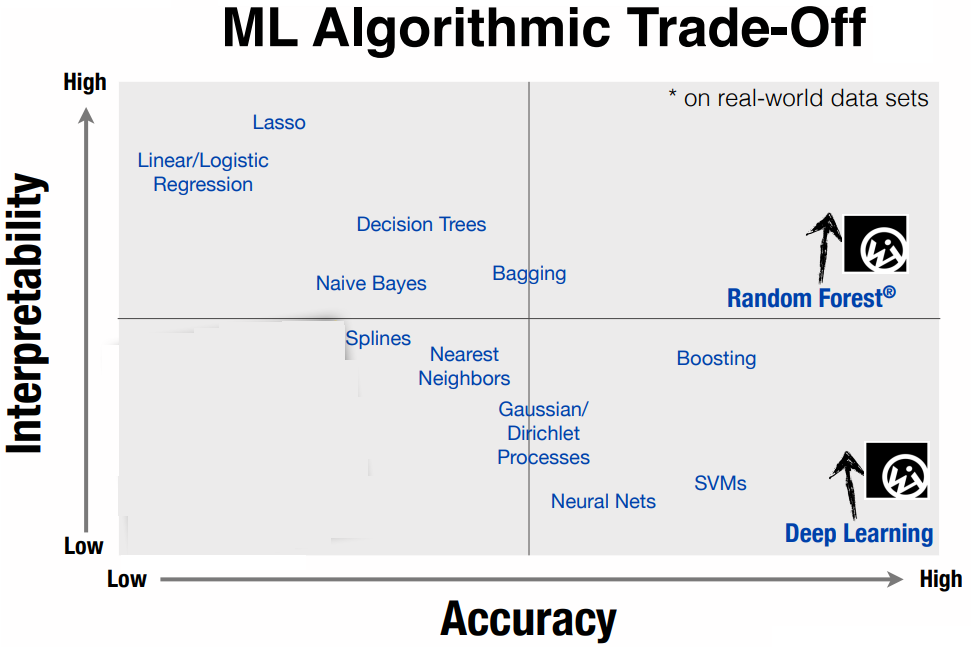


Thus, from this visualisation (Bloom & Brink, 2014) it can be observed that **regression models** have **high interpretability**, but **low accuracy**. Conversely, **boosting models** have **low interpretability**, but **high accuracy**. 

Therefore, the models were chosen to validate, test and critically experiment the accuracy of these models by utilising a **benchmark** for each model **respectively built from the complete original dataset with all the features** as comparison against an alternative model constructed from the **features selected throughout the Exploratory Data Analysis (EDA) phase**.  

### 7.1 Linear Regression 
<a id="Linear Regression"></a>

### 7.1.1 Linear Regression Implementation 
<a id="Linear Regression Implementation"></a>

#### 7.1.1.1 Linear Regression Benchmark Model using all features
<a id="Linear Regression Benchmark Model using all features"></a>

In [496]:
lr.fit.all <- lm(critical_temp ~., data=train.data) # benchmark linear model 

In [497]:
summary(lr.fit.all)


Call:
lm(formula = critical_temp ~ ., data = train.data)

Residuals:
   Min     1Q Median     3Q    Max 
-84.29  -9.44   0.65  10.98 172.00 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)         -2.06e+01   5.57e+00   -3.70  0.00021 ***
number_of_elements  -4.13e+00   8.34e-01   -4.96  7.2e-07 ***
mean_am              8.93e-01   9.16e-02    9.76  < 2e-16 ***
wtd_mean_am         -9.77e-01   1.14e-01   -8.58  < 2e-16 ***
gmean_am            -5.51e-01   9.08e-02   -6.07  1.3e-09 ***
wtd_gmean_am         7.16e-01   1.08e-01    6.64  3.3e-11 ***
entropy_am          -3.78e+01   5.13e+00   -7.36  1.9e-13 ***
wtd_entropy_am       4.91e+00   4.07e+00    1.21  0.22782    
range_am             2.17e-01   1.85e-02   11.76  < 2e-16 ***
wtd_range_am         2.21e-02   2.48e-02    0.89  0.37393    
std_am              -5.89e-01   7.00e-02   -8.41  < 2e-16 ***
wtd_std_am           1.15e-01   6.08e-02    1.89  0.05916 .  
mean_f               1.77e-01   7.14e

From the observed model summary for **linear regression benchmark model fitted with the training dataset** it can be observed that several **attributes/features** are **not signifcant**. The least significant **attributes/features are**: 
* **wtd_entropy_am**
* **wtd_range_am** 
* **wtd_std_f**
* **gmean_ar** 
* ***wtd_mean_Density**
* **wtd_range_Density**
* **entropy_EA**
* **wtd_entropy_TC**
* **std_entropy_TC**
* **range_V**

Therefore, these **10 attributes/features** will be removed from the dataframe **fs.train.data** and **fs.test.data** prior to implementing and training the **feature selected models**. 

Additionally it can be seen that with regards to the **linear regression benchmark model** the:
* **Residual standard error** is **17.6** 
* **The R-Square value** is **74%** which indicates that the model explains **74** of the variation in the **critical temperature for the superconductor**. 

In [498]:
# drop all not significant columns/attributes as observed from the model summary for the benchmark model 

drop_insig_cols <- c("wtd_entropy_am", "wtd_range_am", "wtd_std_f", "gmean_ar", "wtd_mean_Density", "wtd_range_Density", 
                     "entropy_EA", "wtd_entropy_TC", "std_entropy_TC", "range_V") 
fs.train.data <- fs.train.data[ , !(names(fs.train.data) %in% drop_insig_cols)] # drop not significant columns in fs train df
fs.test.data <- fs.test.data[, !(names(fs.test.data) %in% drop_insig_cols)] # drop not significant columns in fs test df 

#### 7.1.1.2 Linear Regression fitting selected features to examine improvement and difference analysis 
<a id="Linear Regression fitting selected features to examine improvement and difference analysis"></a>

In [499]:
lr.fs.model <- lm(critical_temp ~., data= fs.train.data) # feature selected linear model 

In [500]:
summary(lr.fs.model)


Call:
lm(formula = critical_temp ~ ., data = fs.train.data)

Residuals:
   Min     1Q Median     3Q    Max 
-80.55 -10.38   0.53  11.50 171.95 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)         -2.71e+01   5.39e+00   -5.03  5.1e-07 ***
number_of_elements  -5.80e+00   6.45e-01   -9.00  < 2e-16 ***
mean_am              8.80e-01   8.26e-02   10.65  < 2e-16 ***
wtd_mean_am         -7.24e-01   9.43e-02   -7.68  1.7e-14 ***
gmean_am            -5.52e-01   8.44e-02   -6.54  6.3e-11 ***
wtd_gmean_am         5.01e-01   9.58e-02    5.23  1.7e-07 ***
entropy_am          -3.49e+01   3.92e+00   -8.90  < 2e-16 ***
range_am             2.49e-01   1.84e-02   13.52  < 2e-16 ***
std_am              -5.30e-01   6.71e-02   -7.90  3.0e-15 ***
wtd_std_am          -9.62e-02   5.61e-02   -1.71  0.08653 .  
mean_f               5.63e-03   4.21e-02    0.13  0.89381    
wtd_mean_f          -1.05e-02   7.29e-03   -1.44  0.14854    
gmean_f              3.08e-02   4.

### 7.1.2 Linear Regression Model Predictions and Analysis 
<a id="Linear Regression Prediction and Analysis"></a>

#### 7.1.2.1 Linear Regression Benchmark Model Predictions and Analysis 
<a id="Linear Regression Benchmark Model Predictions and Analysis"></a>

In [222]:
prediction <- predict(lr.fit.all, newdata = test.data)
rmse <- sqrt(mean((prediction - test.data$critical_temp)^2))
c(RMSE = rmse, R2=summary(lr.fit.all)$r.squared)

RMSE    R2 
17.73  0.74

In [173]:
# dataframe to store predictions and test error for Linear Regression Benchmark Model 
lr.bm.df <- data.frame(actual = test.data$critical_temp,
                    predictions = prediction, 
                    type = 'Linear Regression BM')

In [174]:
# compute test error and add it as a column to the dataframe lr.bm.df under the name test_error 
lr.bm.df$test_error <- lr.bm.df$predictions - lr.bm.df$actual

In [175]:
head(lr.bm.df)

actual predictions type                 test_error
3  19.0   26.4        Linear Regression BM   7.39    
8  33.0   22.0        Linear Regression BM -11.05    
15 26.0   43.8        Linear Regression BM  17.85    
16 27.0   49.3        Linear Regression BM  22.25    
30 65.3   54.4        Linear Regression BM -10.91    
54 43.0   69.5        Linear Regression BM  26.45

#### 7.1.2.2 Feature Selected Linear Regression Model Predictions and Analysis 
<a id="Feature Selected Linear Regression Model Predictions and Analysis"></a>

In [378]:
fs.prediction <- predict(lr.fs.model, newdata = fs.test.data)
fs.rmse <- sqrt(mean((fs.prediction - fs.test.data$critical_temp)^2))
c(RMSE = fs.rmse, R2=summary(lr.fs.model)$r.squared)

RMSE     R2 
18.200  0.724

In [420]:
# dataframe to store predictions and test error for Linear Regression Feature Selected Model 
lr.fs.df <- data.frame(actual = fs.test.data$critical_temp,
                    predictions = prediction, 
                    type = 'Linear Regression FS')

In [421]:
# compute test error and add it as a column to the dataframe lr.fs.df under the name fs_test_error 
lr.fs.df$fs_test_error <- lr.fs.df$predictions - lr.fs.df$actual

In [422]:
head(lr.fs.df)

actual predictions type                 fs_test_error
3  19.0   25.8        Linear Regression FS   6.83       
8  33.0   21.6        Linear Regression FS -11.39       
15 26.0   43.0        Linear Regression FS  16.97       
16 27.0   48.7        Linear Regression FS  21.68       
30 65.3   55.6        Linear Regression FS  -9.73       
54 43.0   70.4        Linear Regression FS  27.40

### 7.2 Lasso Regression 
<a id="Lasso Regression"></a>

### 7.2.1 Lasso Regression Implementation
<a id="Lasso Regression Implementation"></a>

#### 7.2.1.1 Lasso Regression Benchmark Model using all features
<a id="Lasso Regression Benchmark Model using all features"></a>

In [384]:
x_variables <- model.matrix(critical_temp~., train.data)[, -1]
y_label <- train.data$critical_temp
lambda_seq <- 10^seq(2, -2, by = -0.1)

cv_output <- cv.glmnet(x_variables, y_label, alpha = 1, lambda = lambda_seq)

In [385]:
optimal_lambda <- cv_output$lambda.min 
print(optimal_lambda)

[1] 0.01


In [387]:
lasso.bm <- glmnet(x_variables, y_label, alpha=1, lambda=optimal_lambda)
summary(lasso.bm)

          Length Class     Mode   
a0         1     -none-    numeric
beta      81     dgCMatrix S4     
df         1     -none-    numeric
dim        2     -none-    numeric
lambda     1     -none-    numeric
dev.ratio  1     -none-    numeric
nulldev    1     -none-    numeric
npasses    1     -none-    numeric
jerr       1     -none-    numeric
offset     1     -none-    logical
call       5     -none-    call   
nobs       1     -none-    numeric

#### 7.2.1.2 Lasso Regression fitting selected features to examine improvement and difference analysis 
<a id="Lasso Regression fitting selected features to examine improvement and difference analysis"></a>

In [393]:
fs_x_variables <- model.matrix(critical_temp~., fs.train.data)[, -1]
fs_y_label <- fs.train.data$critical_temp
lambda_seq <- 10^seq(2, -2, by = -0.1)

fs.train.index <- row.number # use the row indicies computed in section 5. Split the dataset into training set and testing set 

fs.cv_output <- cv.glmnet(fs_x_variables, fs_y_label, alpha = 1, lambda = lambda_seq)

In [394]:
fs.optimal_lambda <- fs.cv_output$lambda.min 
print(fs.optimal_lambda)

[1] 0.01


In [395]:
lasso.fs <- glmnet(fs_x_variables, fs_y_label, alpha=1, lambda=fs.optimal_lambda)
summary(lasso.fs)

          Length Class     Mode   
a0         1     -none-    numeric
beta      68     dgCMatrix S4     
df         1     -none-    numeric
dim        2     -none-    numeric
lambda     1     -none-    numeric
dev.ratio  1     -none-    numeric
nulldev    1     -none-    numeric
npasses    1     -none-    numeric
jerr       1     -none-    numeric
offset     1     -none-    logical
call       5     -none-    call   
nobs       1     -none-    numeric

### 7.2.2 Lasso Regression Model Predictions and Analysis 
<a id="Lasso Regression Prediction and Analysis"></a>

#### 7.2.2.1 Lasso Regression Benchmark Model Predictions and Analysis
<a id="Lasso Regression Benchmark Model Predictions and Analysis"></a>

In [388]:
test_x_variables <- model.matrix(critical_temp~., test.data)[, -1]

In [389]:
lasso.bm.prediction <- predict(lasso.bm, s = optimal_lambda, newx = test_x_variables)

In [390]:
# dataframe to store predictions and test error for Lasso Regression Benchmark Model 
lasso.bm.df <- data.frame(actual = test.data$critical_temp,
                          predictions = c(lasso.bm.prediction), 
                          type = 'Lasso Regression BM')

In [391]:
# compute test error and add it as a column to the dataframe lasso.bm.df under the name lasso_test_error 
lasso.bm.df$lasso_test_error <- c(lasso.bm.prediction - test.data$critical_temp) 

In [392]:
head(lasso.bm.df)

actual predictions type                lasso_test_error
1 19.0   27.8        Lasso Regression BM   8.76          
2 33.0   23.1        Lasso Regression BM  -9.94          
3 26.0   42.0        Lasso Regression BM  16.03          
4 27.0   47.0        Lasso Regression BM  20.05          
5 65.3   52.4        Lasso Regression BM -12.88          
6 43.0   71.3        Lasso Regression BM  28.33

#### 7.2.2.2 Feature Selected Lasso Regression Model Predictions and Analysis 
<a id="Feature Selected Lasso Regression Model Predictions and Analysis"></a>

In [399]:
fs_x_variables <- model.matrix(critical_temp~., fs.test.data)[, -1]

In [400]:
lasso.fs.prediction <- predict(lasso.fs, s = fs.optimal_lambda, newx = fs_x_variables)

In [401]:
# dataframe to store predictions and test error for Lasso Regression Feature Selected Model 
lasso.fs.df <- data.frame(actual = fs.test.data$critical_temp,
                          predictions = c(lasso.fs.prediction), 
                          type = 'Lasso Regression FS')

In [402]:
# compute test error and add it as a column to the dataframe lasso.fs.df under the name lasso_fs_test_error 
lasso.fs.df$lasso_fs_test_error <- c(lasso.fs.prediction - fs.test.data$critical_temp) 

In [403]:
head(lasso.fs.df)

actual predictions type                lasso_fs_test_error
1 19.0   25.8        Lasso Regression FS   6.83             
2 33.0   24.3        Lasso Regression FS  -8.68             
3 26.0   34.6        Lasso Regression FS   8.61             
4 27.0   40.0        Lasso Regression FS  13.03             
5 65.3   47.6        Lasso Regression FS -17.75             
6 43.0   72.5        Lasso Regression FS  29.54

### 7.3 Gradient Boosting 
<a id="Gradient Boosting"></a>

### 7.3.1 Gradient Boosting Implementation 
<a id="Gradient Boosting Implementation"></a>

#### 7.3.1.1 Gradient Boosting Benchmark Model using all features
<a id="Gradient Boosting Benchmark Model using all features"></a>

In [183]:
dataset.boost <- gbm(critical_temp ~., data=train.data, distribution = "gaussian", n.trees = 10000, shrinkage = 0.01, 
                     interaction.depth = 4)

var                             rel.inf
range_ThermalConductivity       range_ThermalConductivity       33.775 
range_atomic_radius             range_atomic_radius              9.562 
wtd_gmean_ThermalConductivity   wtd_gmean_ThermalConductivity    7.498 
wtd_mean_Valence                wtd_mean_Valence                 6.166 
wtd_entropy_atomic_mass         wtd_entropy_atomic_mass          4.363 
wtd_entropy_Valence             wtd_entropy_Valence              3.079 
wtd_std_ElectronAffinity        wtd_std_ElectronAffinity         2.579 
wtd_mean_ThermalConductivity    wtd_mean_ThermalConductivity     2.472 
wtd_std_ThermalConductivity     wtd_std_ThermalConductivity      2.341 
std_atomic_mass                 std_atomic_mass                  2.052 
gmean_Valence                   gmean_Valence                    1.607 
wtd_entropy_ThermalConductivity wtd_entropy_ThermalConductivity  1.448 
wtd_gmean_ElectronAffinity      wtd_gmean_ElectronAffinity       1.178 
gmean_Density                   gmean_Density                    1.058 
wtd_std_Valence                 wtd_std_Valence                  1.008 
std_Density                     std_Density                      0.998 
mean_ThermalConductivity        mean_ThermalConductivity         0.726 
wtd_mean_Density                wtd_mean_Density                 0.711 
std_ElectronAffinity            std_ElectronAffinity             0.706 
wtd_entropy_Density             wtd_entropy_Density              0.699 
wtd_std_atomic_radius           wtd_std_atomic_radius            0.680 
wtd_mean_atomic_mass            wtd_mean_atomic_mass             0.672 
entropy_FusionHeat              entropy_FusionHeat               0.666 
mean_Density                    mean_Density                     0.660 
gmean_ElectronAffinity          gmean_ElectronAffinity           0.567 
wtd_entropy_fie                 wtd_entropy_fie                  0.545 
wtd_std_atomic_mass             wtd_std_atomic_mass              0.497 
wtd_entropy_atomic_radius       wtd_entropy_atomic_radius        0.481 
entropy_Density                 entropy_Density                  0.464 
entropy_ThermalConductivity     entropy_ThermalConductivity      0.414 
...                             ...                             ...    
wtd_entropy_ElectronAffinity    wtd_entropy_ElectronAffinity    0.2550 
wtd_gmean_FusionHeat            wtd_gmean_FusionHeat            0.2443 
wtd_gmean_atomic_radius         wtd_gmean_atomic_radius         0.2275 
wtd_range_atomic_radius         wtd_range_atomic_radius         0.2257 
wtd_range_atomic_mass           wtd_range_atomic_mass           0.2232 
wtd_range_ThermalConductivity   wtd_range_ThermalConductivity   0.2172 
wtd_std_FusionHeat              wtd_std_FusionHeat              0.2122 
wtd_gmean_atomic_mass           wtd_gmean_atomic_mass           0.2110 
gmean_atomic_mass               gmean_atomic_mass               0.2048 
wtd_range_Density               wtd_range_Density               0.2048 
range_ElectronAffinity          range_ElectronAffinity          0.1944 
entropy_ElectronAffinity        entropy_ElectronAffinity        0.1789 
mean_atomic_mass                mean_atomic_mass                0.1701 
range_fie                       range_fie                       0.1548 
wtd_range_ElectronAffinity      wtd_range_ElectronAffinity      0.1524 
mean_FusionHeat                 mean_FusionHeat                 0.1499 
std_fie                         std_fie                         0.1400 
gmean_atomic_radius             gmean_atomic_radius             0.1399 
std_Valence                     std_Valence                     0.1359 
wtd_range_FusionHeat            wtd_range_FusionHeat            0.1282 
gmean_FusionHeat                gmean_FusionHeat                0.1236 
gmean_fie                       gmean_fie                       0.1193 
mean_Valence                    mean_Valence                    0.1187 
mean_fie                        mean_fie                        0.1171 


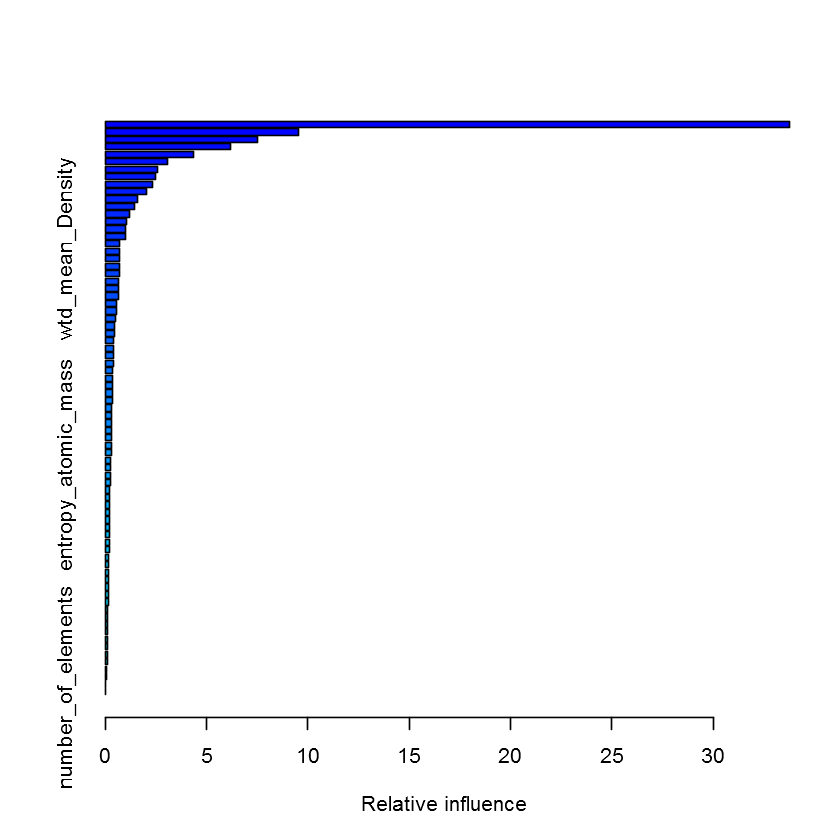

In [184]:
summary(dataset.boost)

#### 7.3.1.2 Gradient Boosting fitting selected features to examine improvement and difference analysis
<a id="Gradient Boosting fitting selected features to examine improvement and difference analysis"></a>

In [501]:
fs.dataset.boost <- gbm(critical_temp ~., data=fs.train.data, distribution = "gaussian", n.trees = 10000, shrinkage = 0.01, 
                     interaction.depth = 4)

var                 rel.inf
range_TC            range_TC            34.026 
range_ar            range_ar            10.000 
wtd_gmean_TC        wtd_gmean_TC         7.642 
wtd_mean_V          wtd_mean_V           6.701 
wtd_entropy_am      wtd_entropy_am       4.492 
wtd_entropy_V       wtd_entropy_V        2.735 
wtd_std_EA          wtd_std_EA           2.710 
wtd_mean_TC         wtd_mean_TC          2.408 
wtd_std_TC          wtd_std_TC           2.333 
std_am              std_am               2.203 
wtd_entropy_TC      wtd_entropy_TC       1.575 
gmean_Density       gmean_Density        1.414 
wtd_gmean_EA        wtd_gmean_EA         1.342 
wtd_std_V           wtd_std_V            0.990 
std_Density         std_Density          0.978 
mean_TC             mean_TC              0.959 
mean_Density        mean_Density         0.747 
wtd_std_ar          wtd_std_ar           0.734 
wtd_mean_Density    wtd_mean_Density     0.733 
gmean_EA            gmean_EA             0.716 
wtd_mean_am         wtd_mean_am          0.702 
wtd_entropy_Density wtd_entropy_Density  0.702 
entropy_FH          entropy_FH           0.669 
wtd_std_am          wtd_std_am           0.559 
wtd_entropy_f       wtd_entropy_f        0.538 
entropy_Density     entropy_Density      0.503 
entropy_TC          entropy_TC           0.497 
wtd_entropy_ar      wtd_entropy_ar       0.495 
wtd_entropy_FH      wtd_entropy_FH       0.494 
wtd_range_f         wtd_range_f          0.479 
...                 ...                 ...    
wtd_gmean_Density   wtd_gmean_Density   0.33732
wtd_std_Density     wtd_std_Density     0.32810
range_am            range_am            0.32530
wtd_mean_f          wtd_mean_f          0.28499
entropy_am          entropy_am          0.27239
range_EA            range_EA            0.27079
wtd_entropy_EA      wtd_entropy_EA      0.25930
wtd_range_TC        wtd_range_TC        0.25718
wtd_range_ar        wtd_range_ar        0.24613
wtd_std_FH          wtd_std_FH          0.24320
wtd_range_am        wtd_range_am        0.22802
wtd_range_Density   wtd_range_Density   0.22771
gmean_am            gmean_am            0.22460
wtd_gmean_am        wtd_gmean_am        0.20992
entropy_EA          entropy_EA          0.20622
mean_FH             mean_FH             0.18394
wtd_range_EA        wtd_range_EA        0.16903
mean_am             mean_am             0.16861
range_f             range_f             0.16316
mean_f              mean_f              0.14995
gmean_FH            gmean_FH            0.14388
gmean_ar            gmean_ar            0.14038
wtd_range_FH        wtd_range_FH        0.13496
mean_EA             mean_EA             0.12823
gmean_f             gmean_f             0.12651
gmean_TC            gmean_TC            0.12272
range_V             range_V             0.10901
range_FH            range_FH            0.09918
range_Density       range_Density       0.01526
number_of_elements  number_of_elements  0.00986

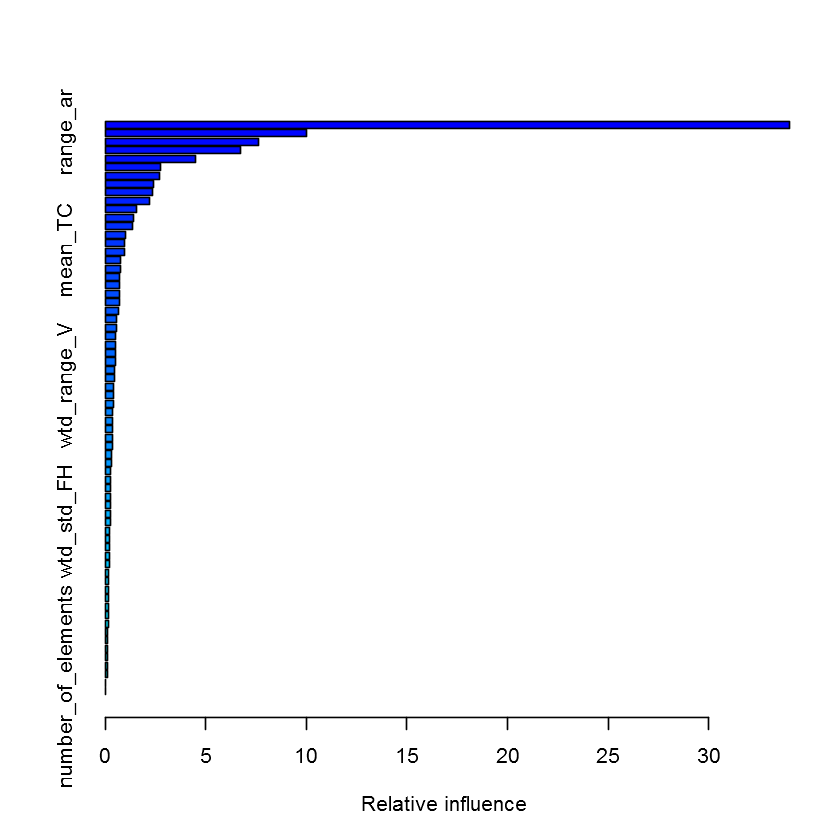

In [405]:
summary(fs.dataset.boost)

### 7.3.2 Gradient Boosting Model Predictions and Analysis 
<a id="Gradient Boosting Model Predictions and Analysis"></a>

#### 7.3.2.1 Gradient Boosting Benchmark Model Predictions and Analysis 
<a id="Gradient Boosting Benchmark Model Predictions and Analysis"></a>

In [185]:
gb.bm.predictions <- predict(dataset.boost, test.data, n.trees = 10000)
gb.bm.predictions

[1]  22.33247  26.91820  28.38501  28.56764  46.09967  85.60658  70.57442
   [8]  33.67035  14.51961  67.17883  76.77399  87.89162  88.19810  89.55553
  [15]  73.40421  63.50256  81.49599  77.13574  17.79820  69.60803  92.89399
  [22]  72.22881  86.84531  53.74685  58.81288  68.34640  63.01473  41.99032
  [29]  90.72286  91.31539  91.94829  19.21201  21.00444 117.84931  69.92471
  [36]  67.04416  54.95972  78.06376  66.71176  84.14239  27.81354  84.09812
  [43]  75.74843  29.92587  91.58035  87.89162  84.49108  60.61109  62.97236
  [50]  89.30006  84.50484  46.34311  72.26862  68.66366  60.63541  89.22995
  [57]  85.59922  59.43852  75.92502  66.62997  60.53814  56.14615  88.01726
  [64]  89.22995  91.58035  92.89399  70.10403  97.99929  86.51976  65.21734
  [71]  50.91361  43.18843  85.93333  78.60709  49.47838  54.40477  90.23295
  [78]  84.56985  82.11535  52.49253  86.51976  60.32722  65.07308  97.03143
  [85]  63.66352  81.07188  53.27140  25.12642  27.31093  87.63498  85.68924
  [92]  26.60154  28.04036  24.13878  86.00621  85.78875  66.65320  37.83520
  [99]  61.53699  71.36417  87.89162  81.03245 109.78311  63.11524  46.34311
 [106]  73.77629  89.55553  33.34264  86.87928  81.86940  84.57766  91.17167
 [113]  72.58001  73.51077  51.08041  26.91820  33.67035  49.88622  52.79120
 [120]  49.61148  78.13008  30.58022  49.79688  48.31263  44.55377  46.74873
 [127]  44.83878  22.93499  74.02311  68.85346  84.49108  90.97414 100.23843
 [134]  50.43862  73.12753  39.23563  29.31755  90.75590  72.70981  72.64793
 [141]  80.22525  80.22525  11.40793  83.03381  63.59956  87.89162  87.87134
 [148]  83.05350  62.22734  59.55520 116.13200  87.89162  80.07234  71.36417
 [155]  52.36688  24.78205  19.49176  62.60599  75.52717  49.29341  87.89162
 [162]  90.54619  74.21538  81.80251  79.43559  99.59288  87.00904  55.39698
 [169]  28.70232  28.92211  23.32957  39.18911  29.02018  82.28645  51.97525
 [176]  52.70604  17.46606  21.09883  19.47150  26.40037  26.48415  21.60076
 [183]  67.59242  17.43693  88.11451  77.84709  31.50590  38.91239  72.09755
 [190]  55.00719 100.67138  84.62853  87.13433  62.94959  90.97414  31.27420
 [197]  29.45947  87.89162  26.28097  24.08691 112.74487  31.27420  23.85032
 [204]  79.43559  77.16438  79.84428 101.80399 102.36155 104.76457 103.81239
 [211]  34.52557  54.42535  55.96253  57.72615  58.71133  76.94143  80.03078
 [218]  80.39685  80.50350  36.23707  69.00591  82.64097  47.49695  78.25852
 [225]  34.62094  78.83258  84.25427  63.42745  92.89399  90.41039  91.17167
 [232]  90.41039  25.73804  81.55948  18.58666  19.08720  80.66481  59.68368
 [239]  86.51976  67.63994  77.51612  33.52891  21.64852  69.28666  79.30578
 [246]  62.74358  17.70608  91.34665  31.97237  33.67035  87.89162  52.79012
 [253]  65.25990  75.21072  79.85284  64.93645  65.86221 108.09403  83.22203
 [260]  63.06914  29.72890  46.86314  51.80245  64.95057  83.16680  84.08459
 [267]  76.98405  77.85214  77.74175  94.72280  76.38205  78.73498  67.78268
 [274]  55.33359  44.92181  71.90412  78.58662  71.99206  78.58662  58.43180
 [281]  29.31755  92.89399  18.40555  88.15030  64.57083  84.30045  87.89162
 [288]  86.51976  83.16680  74.14923  87.49319  84.00152  87.75344  89.90235
 [295]  43.62612  61.06898  85.60658  87.62351  87.89162  86.42654  62.29715
 [302]  94.19931  84.44033  88.27735  84.49108  67.59242  75.92127  76.20162
 [309]  53.48100  51.99098  21.49646  17.64824  17.38542  17.17396  17.20750
 [316]  16.41441  81.24624  91.34665  91.58035  92.89399 117.84931  75.92127
 [323]  22.78380  19.12942  12.13652 104.76457  19.08720  18.76960  74.14923
 [330]  16.29039  13.35979  27.39834  22.70282  22.55219 102.11700  57.40544
 [337]  34.82441  65.22301  64.78904  18.58666  14.26714  15.28303  15.23242
 [344]  13.82428  72.76503  68.66366  26.28202  59.89556  61.82683 111.41293
 [351] 114.86662  70.47404  26.91820  56.31995  91.17167  24.95842  16.14662
 [358]  23.65613  24.54270  25.15930  82.26605  54.99272  47.72362  61.83336

In [186]:
# dataframe to store predictions and test error for Gradient Boosting Benchmark Model 
gb.bm.df <- data.frame(actual = test.data$critical_temp,
                       predictions = c(gb.bm.predictions), 
                       type = 'Gradient Boosting BM')

In [187]:
# compute gradient boosting test error and add it as a column to the dataframe gb.bm.df under the name gradientb_test_error 
gb.bm.df$gradientb_test_error <- c(gb.bm.predictions - test.data$critical_temp) 

In [188]:
head(gb.bm.df)

actual predictions type                 gradientb_test_error
1 19.0   22.3        Gradient Boosting BM   3.33              
2 33.0   26.9        Gradient Boosting BM  -6.08              
3 26.0   28.4        Gradient Boosting BM   2.39              
4 27.0   28.6        Gradient Boosting BM   1.57              
5 65.3   46.1        Gradient Boosting BM -19.20              
6 43.0   85.6        Gradient Boosting BM  42.61

#### 7.3.2.2 Feature Selected Gradient Boosting Model Predictions and Analysis 
<a id="Feature Selected Gradient Boosting Model Predictions and Analysis"></a>

In [503]:
gb.fs.predictions <- predict(fs.dataset.boost, fs.test.data, n.trees = 10000)
gb.fs.predictions

[1]  22.7429  26.7057  25.7964  25.7117  47.0747  86.1735  71.8106  33.4181
   [9]  15.2847  68.4713  78.3512  88.0946  87.5642  90.1977  70.7370  59.7780
  [17]  83.6338  77.8205  17.9030  72.5719  93.2543  73.5838  88.0074  59.2667
  [25]  62.9777  63.8373  59.6799  44.2376  94.0894  93.2440  92.2906  19.4997
  [33]  21.5202 118.7003  67.8013  66.4028  55.2623  80.6758  69.5749  83.9827
  [41]  30.4794  83.7591  78.4487  29.5896  91.6842  88.0946  84.6208  61.6959
  [49]  63.2484  87.5502  82.9659  46.2161  71.6495  68.9385  60.1327  89.3409
  [57]  85.0730  60.7457  75.8496  66.8986  59.8308  55.2397  87.8603  89.3409
  [65]  91.6842  93.2543  67.6749  96.3251  86.0627  64.6480  51.3076  47.9752
  [73]  85.7967  79.1539  51.5981  54.4106  89.4836  84.2803  81.5564  53.8609
  [81]  86.0627  61.1613  63.0257  96.9287  64.3667  81.0138  53.6737  24.5202
  [89]  26.5155  90.0852  86.2375  25.8543  28.4787  23.5418  85.9698  85.9754
  [97]  61.9591  36.9652  61.6132  72.4175  88.0946  80.8776 104.3326  61.9033
 [105]  46.2161  78.5124  90.1977  34.5078  87.3029  83.1194  84.0788  91.6792
 [113]  70.1024  73.2734  51.2942  26.7057  33.4181  51.3202  53.9832  52.2933
 [121]  79.0696  30.1787  52.0405  44.7506  44.4203  43.5954  42.2452  21.6085
 [129]  74.2133  70.7412  84.6208  90.9188  91.8906  49.0715  71.6565  38.8337
 [137]  28.7927  90.6767  73.8964  72.3048  80.4675  80.4675  10.9559  83.8050
 [145]  61.2624  88.0946  86.5604  83.6363  61.8139  58.6097 116.6526  88.0946
 [153]  79.7167  72.4175  53.3095  24.1968  19.8335  62.9246  75.9131  49.2895
 [161]  88.0946  88.4082  74.9580  81.7786  79.4483 100.1500  87.7299  56.3562
 [169]  29.0977  29.4590  30.1254  41.9621  29.0052  82.1728  53.8828  46.3116
 [177]  17.9011  22.3037  19.4320  26.1954  26.5324  22.6549  69.0181  17.3045
 [185]  87.3691  77.4837  34.7149  38.7471  72.9489  55.7846  99.4219  83.6292
 [193]  85.2703  63.0047  90.9188  31.2070  27.9089  88.0946  25.6791  24.0720
 [201] 112.9622  31.2070  24.4821  79.4483  79.4431  80.5046 101.0830 100.8612
 [209] 103.6867 103.0272  34.0197  55.4380  56.3454  57.9290  59.0166  77.2006
 [217]  79.7697  82.1697  80.6314  40.0812  68.2985  80.8083  46.3500  79.4271
 [225]  35.1522  79.1730  85.3871  61.4004  93.2543  90.9066  91.6792  90.9066
 [233]  22.5411  79.0988  18.8332  19.1458  80.6436  60.7171  86.0627  66.1377
 [241]  77.5359  33.0607  22.3456  69.4936  75.6853  59.4782  20.3490  91.6995
 [249]  32.5571  33.4181  88.0946  55.1605  64.3701  72.5093  79.0117  67.9276
 [257]  66.7220 108.0396  84.6601  63.7121  29.4273  47.8626  51.9942  66.0159
 [265]  83.1681  84.3692  76.3003  76.6861  77.4518  95.0726  75.6094  79.5492
 [273]  67.8132  54.7128  46.9385  73.3975  78.4547  68.9747  78.4547  57.0944
 [281]  28.7927  93.2543  18.8380  88.3216  63.6862  84.3585  88.0946  86.0627
 [289]  83.1681  73.3858  86.6392  82.7720  88.3729  88.7003  44.7671  62.8484
 [297]  86.1735  88.0706  88.0946  86.6841  62.1006  94.3540  84.7701  88.0407
 [305]  84.6208  69.0181  75.2736  75.5502  53.7626  53.4758  23.8979  18.9479
 [313]  18.6509  20.2057  17.3391  15.5768  83.4543  91.6995  91.6842  93.2543
 [321] 118.7003  75.2736  22.4204  17.5180  14.5116 103.6867  19.1458  18.8970
 [329]  73.3858  16.0871  12.0295  25.5637  21.9768  22.8626 100.1036  57.2618
 [337]  32.1863  64.9759  65.5567  18.8332  13.7997  13.9986  13.9255  14.4262
 [345]  72.2210  68.9385  25.8856  59.5622  60.7193 109.5771 115.0359  71.3864
 [353]  26.7057  55.8583  91.6792  24.5395  16.8325  23.5503  24.8586  27.0254
 [361]  81.4610  54.4044  46.5695  62.3706  43.9094  86.0627  86.7947  80.2695
 [369]  76.3108  87.8178  89.1118  82.0973  80.4138  88.3729  30.4745  84.7640
 [377]  82.0928  84.6417  75.0172  68.1088  99.9287 109.1049  84.0215  14.0377
 [385]  68.2833  85.4853  64.1378  21.6355  21.7246  16.5313  29.0977  30.1787
 [393]  88.6514  73.0845  73.7833  16.9276  60.2925  54.1504  49.9027  20.8337
 [401]  22.1243  24.1744  20.6414  23.5306  81.0869  

In [504]:
# dataframe to store predictions and test error for Gradient Boosting Feature Selected Model 
gb.fs.df <- data.frame(actual = fs.test.data$critical_temp,
                       predictions = c(gb.fs.predictions), 
                       type = 'Gradient Boosting FS')

In [505]:
# compute gradient boosting test error and add it as a column to the dataframe gb.fs.df under the name gradientfs_test_error 
gb.fs.df$gradientfs_test_error <- c(gb.fs.predictions - fs.test.data$critical_temp) 

In [506]:
head(gb.fs.df)

actual predictions type                 gradientfs_test_error
1 19.0   22.7        Gradient Boosting FS   3.743              
2 33.0   26.7        Gradient Boosting FS  -6.294              
3 26.0   25.8        Gradient Boosting FS  -0.204              
4 27.0   25.7        Gradient Boosting FS  -1.288              
5 65.3   47.1        Gradient Boosting FS -18.225              
6 43.0   86.2        Gradient Boosting FS  43.173

# Model Comparisons, Results Analysis and Feature Selection Discussion
<a id="Model Comparisons, Results Analysis and Feature Selection Discussion"></a>

## 8. Model Comparison and Analysis 
<a id="Model Comparison and Analysis"></a>

### 8.1 Linear Regression Models Influence Analysis
<a id="Linear Regression Models Influence Analysis"></a>

#### 8.1.1 Linear Regression Benchmark Model Diagnostic Visualisation
<a id="Linear Regression Benchmark Model Diagnostic Visualisation"></a>

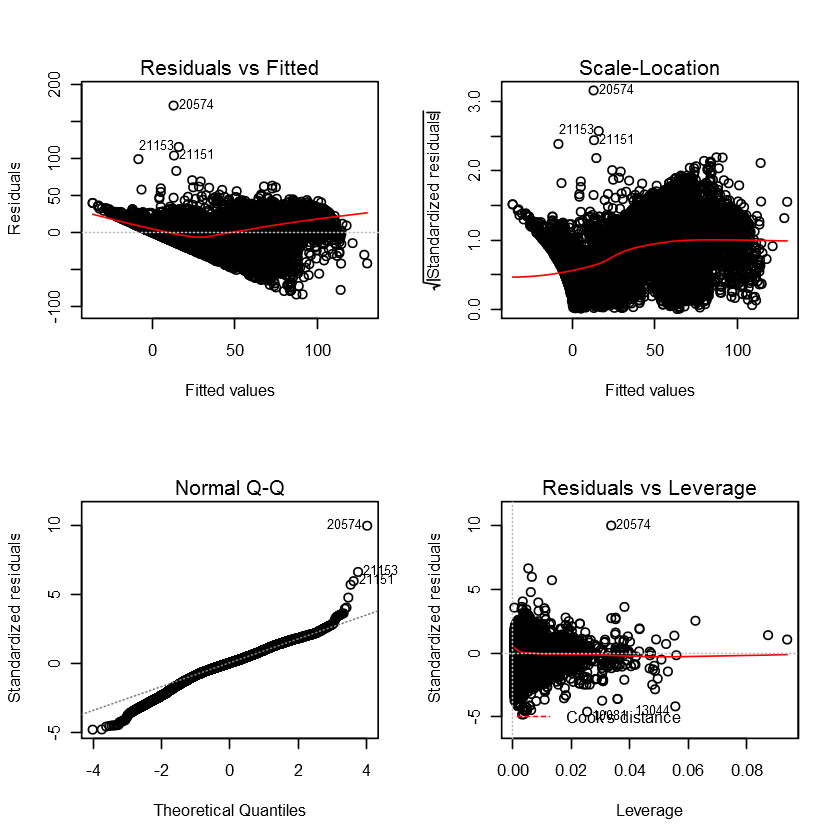

In [423]:
par(mfcol=c(2,2))
plot(lr.fit.all)

These **four model plots** show that:
* In the **Residual vs Fitted** plot the reisudals are not evenly distributed around zero and there's funneling, so the benchmark linear model is not meeting the assumption of homocedasticity. 
* In the **Normal Q-Q** plot the residuals deviate slightly from the dashed line, which indicates the residuals have a close to **normal distribution**.
* In the **Scale-Location** plot the graph shows that the **variance of the residuals is not constant
* In the **Residuals vs Leverage plot** the charts show there are some possibly **influential outliers**, however, they are generally away from the **Cook's line**.

#### 8.1.2 Linear Regression Benchmark Model Influence Visualization
<a id="Linear Regression Benchmark Model Influence Visualization"></a>

StudRes Hat     CookD  
13044 -4.17   0.05555 0.01246
13984  1.05   0.09374 0.00139
14220  1.40   0.08721 0.00227
20574  9.99   0.03367 0.04217
21153  6.62   0.00536 0.00287

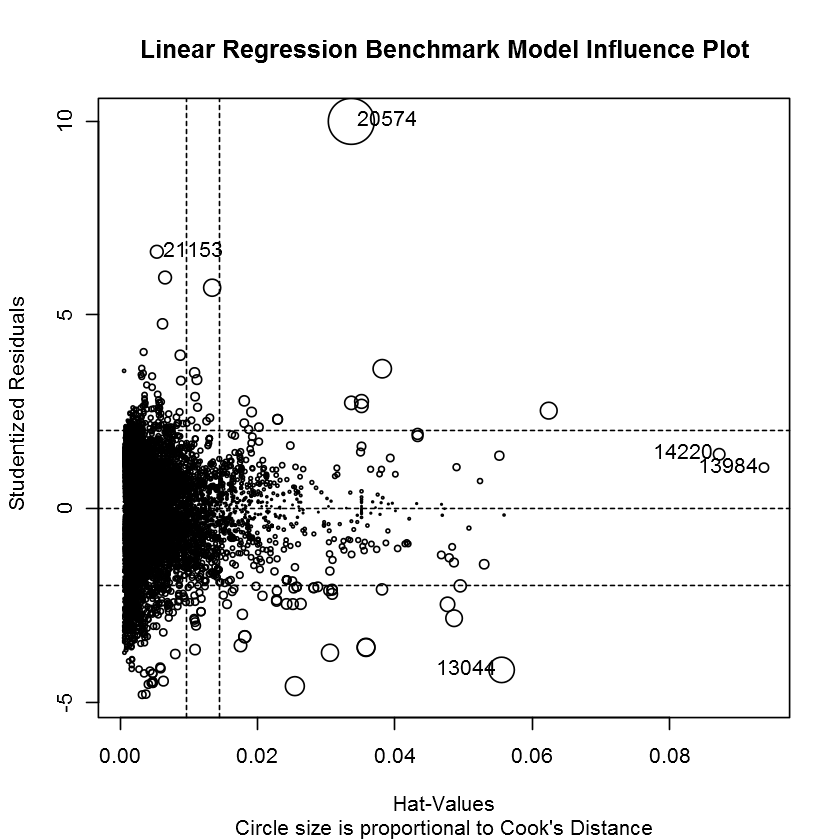

In [424]:
influencePlot(lr.fit.all, scale=5, id.method="noteworthy", main="Linear Regression Benchmark Model Influence Plot", 
             sub="Circle size is proportional to Cook's Distance")

#### 8.2.1 Feature Selected Linear Regression Model Diagnostic Visualisation 
<a id="Feature Selected Linear Regression Model Diagnostic Visualisation "></a>

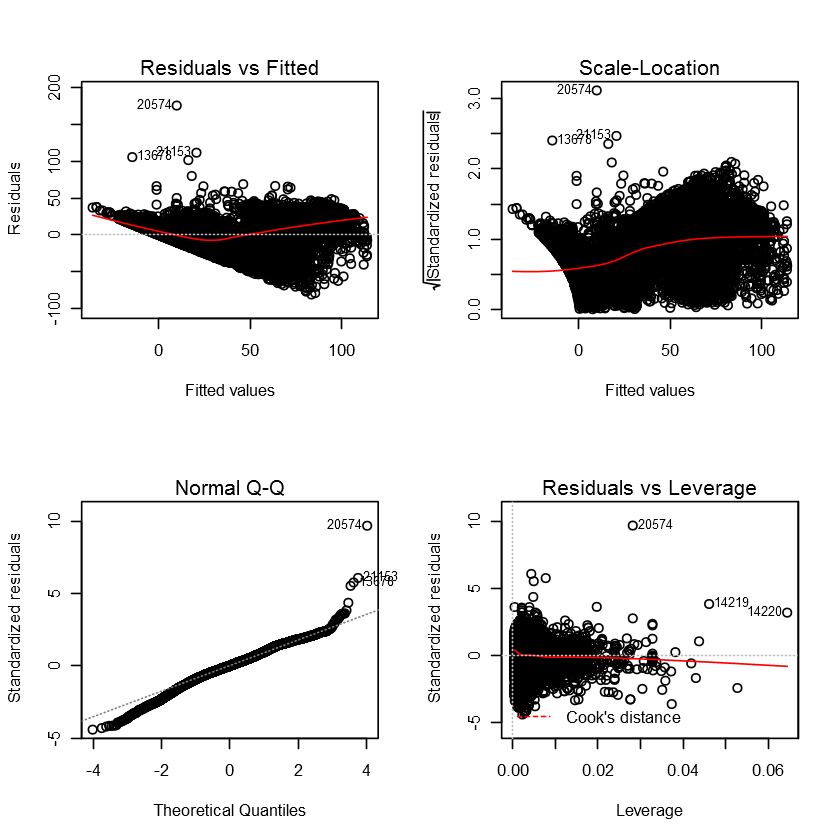

In [425]:
par(mfcol=c(2,2))
plot(lr.fs.model)

These **four model plots** show that:
* In the **Residual vs Fitted** plot the reisudals are not evenly distributed around zero and there's funneling, so the benchmark linear model is not meeting the assumption of homocedasticity. 
* In the **Normal Q-Q** plot the residuals deviate slightly from the dashed line, which indicates the residuals have a close to **normal distribution**.
* In the **Scale-Location** plot the graph shows that the **variance of the residuals is not constant
* In the **Residuals vs Leverage plot** the charts show there are some possibly **influential outliers**, however, they are generally away from the **Cook's line**.

#### 8.2.2 Feature Selected Linear Regression Influence 
<a id="Feature Selected Linear Regression Influence"></a>

StudRes Hat     CookD  
13188 -2.42   0.05275 0.00545
14219  3.84   0.04611 0.01189
14220  3.20   0.06443 0.01175
20574  9.72   0.02819 0.04542
21153  6.09   0.00437 0.00271

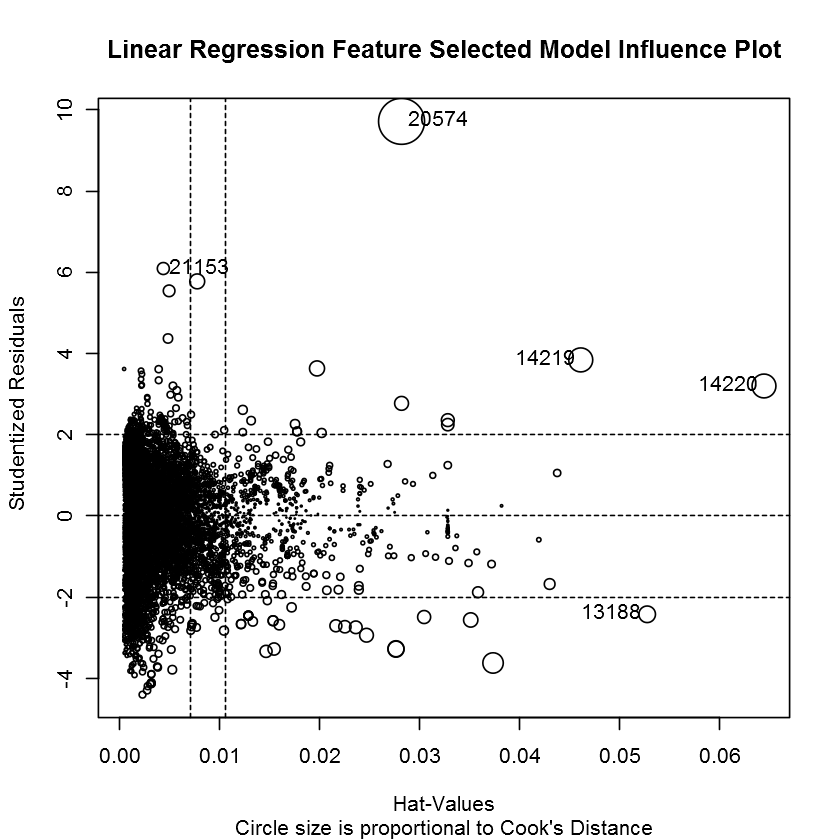

In [426]:
influencePlot(lr.fs.model, scale=5, id.method="noteworthy", main="Linear Regression Feature Selected Model Influence Plot", 
             sub="Circle size is proportional to Cook's Distance")

### 8.2 Tabulated benchmark models test prediction comparison and analysis  
<a id="Tabulated benchmark models test prediction comparison and analysis"></a>

In [189]:
lr.bm.mse <- mean((lr.bm.df$test_error)^2) # linear regression benchmark model Mean Squared Error (MSE)
lr.bm.rmse <- sqrt(lr.bm.mse) # linear regression benchmark model Root Mean Squared Error (RMSE)
lr.bm.rss <- sum((lr.bm.df$test_error)^2) # linear regression benchmark model Residual Sum of Squares (RSS)
lr.bm.tss <- sum((lr.bm.df$actual - mean(lr.bm.df$actual))^2) # linear regression benchmark model Total Sum of Squares (TSS)
lr.bm.rsq <- 1 - (lr.bm.rss/lr.bm.tss) # linear regression benchmark model R-Square 

In [190]:
print(lr.bm.mse) # examine linear regression benchmark model Mean Squared Error (MSE)
print(lr.bm.rmse) # examine linear regression benchmark model Root Mean Squared Error (RMSE)
print(lr.bm.rss) # examine linear regression benchmark model Residual Sum of Squares (RSS)
print(lr.bm.tss) # examine linear regression benchmark model Total Sum of Squares (TSS)
print(lr.bm.rsq) # examine linear regression benchmark model R-Square 

[1] 314
[1] 17.7
[1] 1335156
[1] 4888174
[1] 0.727


In [191]:
lasso.bm.mse <- mean((lasso.bm.df$lasso_test_error)^2) # lasso regression benchmark model Mean Squared Error (MSE)
lasso.bm.rmse <- sqrt(lasso.bm.mse) # lasso regression benchmark model Root Mean Squared Error (RMSE)
lasso.bm.rss <- sum((lasso.bm.df$lasso_test_error)^2) # linear regression benchmark model Residual Sum of Squares (RSS)
lasso.bm.tss <- sum((lasso.bm.df$actual - mean(lasso.bm.df$actual))^2) # lasso regression benchmark model Total Sum Squares(TSS)
lasso.bm.rsq <- 1 - (lasso.bm.rss/lasso.bm.tss) # lasso regression benchmark model R-Square 

In [192]:
print(lasso.bm.mse) # examine lasso regression benchmark model Mean Squared Error (MSE)
print(lasso.bm.rmse) # examine lasso regression benchmark model Root Mean Squared Error (RMSE)
print(lasso.bm.rss) # examine lasso regression benchmark model Residual Sum of Squares (RSS)
print(lasso.bm.tss) # examine lasso regression benchmark model Total Sum of Squares (TSS)
print(lasso.bm.rsq) # examine lasso regression benchmark model R-Square 

[1] 318
[1] 17.8
[1] 1353237
[1] 4888174
[1] 0.723


In [193]:
gb.bm.mse <- mean((gb.bm.df$gradientb_test_error)^2) # gradient boosting benchmark model Mean Squared Error (MSE)
gb.bm.rmse <- sqrt(gb.bm.mse) # gradient boosting benchmark model Root Mean Squared Error (RMSE)
gb.bm.rss <- sum((gb.bm.df$gradientb_test_error)^2) # gradient boosting benchmark model Residual Sum of Squares (RSS)
gb.bm.tss <- sum((gb.bm.df$actual - mean(gb.bm.df$actual))^2) # graident boosting benchmark model Total Sum of Squares (TSS)
gb.bm.rsq <- 1 - (gb.bm.rss/gb.bm.tss) # gradient boosting benchmark model R-Square

In [194]:
print(gb.bm.mse) # examine gradient boosting benchmark model Mean Squared Error (MSE)
print(gb.bm.rmse) # examine gradient boosting benchmark model Root Mean Squared Error (RMSE)
print(gb.bm.rss) # examine gradient boosting benchmark model Residual Sum of Squares (RSS)
print(gb.bm.tss) # examine gradient boosting benchmark model Total Sum of Squares (TSS)
print(gb.bm.rsq) # examine gradient boosting benchmark model R-Square 

[1] 111
[1] 10.5
[1] 469983
[1] 4888174
[1] 0.904


In [134]:
# dataframe summary for benchmark model evaluation metrics 
bm_model_test_comparison_df <- data.frame(model=c('Linear Regression Benchmark Model', 'Lasso Regression Benchmark Model', 
                                          'Gradient Boosting Benchmark Model'),
                                           mse=c(313, 317, 110),
                                           rmse=c(17.7, 17.8, 10.5),
                                           rss=c(1329695, 1350231, 468374),
                                           tss=c(4888174, 4888174, 4888174),
                                           rsq=c(0.728, 0.724, 0.904))

In [135]:
# set specific names for benchmark dataframe model evaulation metrics 
names(bm_model_test_comparison_df) <- c('Benchmark Model', 'Test MSE', 'Test RMSE', 'Test RSS', 'Test TSS', 'Test R-Squared')
bm_model_test_comparison_df

Benchmark Model                   Test MSE Test RMSE Test RSS Test TSS
1 Linear Regression Benchmark Model 313      17.7      1329695  4888174 
2 Lasso Regression Benchmark Model  317      17.8      1350231  4888174 
3 Gradient Boosting Benchmark Model 110      10.5       468374  4888174 
  Test R-Squared
1 0.728         
2 0.724         
3 0.904

The following table summarises, the model comparison measures used which are **Mean Squared Error (MSE)**, **Root Mean Squared Error (RMSE)**, **Residual Sum of Squares (RSS)**, **Total Sum of Squares (TSS)** and **R-Squared** to analyse and compare the performance of the benchmark models for linear regression, lasso regression and gradient boosting:




|Benchmark Model  |Test Mean Squared Error (MSE)  |Test Root Mean Squared Error (RMSE)  |Test Residual Sum of Squares (RSS)    |Test Total Sum of Squares (TSS)|Test R-Squared|
|----------------------------------|----|-----|--------|-------|-----|
|Linear Regression Benchmark Model |313 |17.7 |1329695 |4888174|0.728|
|Lasso Regression Benchmark Model  |317 |17.8 |1350231 |4888174|0.724|
|Gradient Boosting Benchmark Model |110 |10.5 |468374  |4888174|0.904| 

### 8.3 Featured Selected models test prediction comparison and analysis  
<a id="Featured Selected models test prediction comparison and analysis"></a>

In [429]:
lr.fs.mse <- mean((lr.fs.df$fs_test_error)^2) # linear regression feature selected model Mean Squared Error (MSE)
lr.fs.rmse <- sqrt(lr.fs.mse) # linear regression feature selected  model Root Mean Squared Error (RMSE)
lr.fs.rss <- sum((lr.fs.df$fs_test_error)^2) # linear regression feature selected  model Residual Sum of Squares (RSS)
lr.fs.tss <- sum((lr.fs.df$actual - mean(lr.fs.df$actual))^2) # linear regression feature selec model Total Sum of Squares (TSS)
lr.fs.rsq <- 1 - (lr.fs.rss/lr.fs.tss) # linear regression feature selected model R-Square 

In [430]:
print(lr.fs.mse) # examine linear regression feature selected model Mean Squared Error (MSE)
print(lr.fs.rmse) # examine linear regression feature selected model Root Mean Squared Error (RMSE)
print(lr.fs.rss) # examine linear regression feature selected model Residual Sum of Squares (RSS)
print(lr.fs.tss) # examine linear regression feature selected model Total Sum of Squares (TSS)
print(lr.fs.rsq) # examine linear regression feature selected model R-Square 

[1] 314
[1] 17.7
[1] 1337432
[1] 4888174
[1] 0.726


In [431]:
lasso.fs.mse <- mean((lasso.fs.df$lasso_fs_test_error)^2) # lasso regression feature selected model Mean Squared Error (MSE)
lasso.fs.rmse <- sqrt(lasso.fs.mse) # lasso regression feature selected model Root Mean Squared Error (RMSE)
lasso.fs.rss <- sum((lasso.fs.df$lasso_fs_test_error)^2) # lasso regression feature selected model Residual Sum of Squares (RSS)
lasso.fs.tss <- sum((lasso.fs.df$actual - mean(lasso.fs.df$actual))^2) # lasso regression feature s model Total Sum Squares(TSS)
lasso.fs.rsq <- 1 - (lasso.fs.rss/lasso.fs.tss) # lasso regression feature selected model R-Square 

In [432]:
print(lasso.fs.mse) # examine lasso regression feature selected model Mean Squared Error (MSE)
print(lasso.fs.rmse) # examine lasso regression feature selected model Root Mean Squared Error (RMSE)
print(lasso.fs.rss) # examine lasso regression feature selected model Residual Sum of Squares (RSS)
print(lasso.fs.tss) # examine lasso regression feature selected model Total Sum of Squares (TSS)
print(lasso.fs.rsq) # examine lasso regression feature selected model R-Square 

[1] 333
[1] 18.2
[1] 1414804
[1] 4888174
[1] 0.711


In [508]:
gb.fs.mse <- mean((gb.fs.df$gradientfs_test_error)^2) # gradient boosting feature selected model Mean Squared Error (MSE)
gb.fs.rmse <- sqrt(gb.fs.mse) # gradient boosting feature selected model Root Mean Squared Error (RMSE)
gb.fs.rss <- sum((gb.fs.df$gradientfs_test_error)^2) # gradient boosting feature selected model Residual Sum of Squares (RSS)
gb.fs.tss <- sum((gb.fs.df$actual - mean(gb.fs.df$actual))^2) # graident boosting feature selec model Total Sum of Squares (TSS)
gb.fs.rsq <- 1 - (gb.fs.rss/gb.fs.tss) # gradient boosting feature selected model R-Square

In [509]:
print(gb.fs.mse) # examine gradient boosting feature selected model Mean Squared Error (MSE)
print(gb.fs.rmse) # examine gradient boosting feature selected model Root Mean Squared Error (RMSE)
print(gb.fs.rss) # examine gradient boosting feature selected model Residual Sum of Squares (RSS)
print(gb.fs.tss) # examine gradient boosting feature selected model Total Sum of Squares (TSS)
print(gb.fs.rsq) # examine gradient boosting feature selected model R-Square 

[1] 112
[1] 10.6
[1] 476187
[1] 4888174
[1] 0.903


In [510]:
# dataframe summary for feature selected model evaluation metrics 
fs_model_test_comparison_df <- data.frame(model=c('Linear Regression Feature Selected Model', 
                                                  'Lasso Regression Feature Selected Model', 
                                                  'Gradient Boosting Feature Selected Model'),
                                           mse=c(314, 333, 112),
                                           rmse=c(17.7, 18.2, 10.6),
                                           rss=c(1337432, 1414804, 476187),
                                           tss=c(4888174, 4888174, 4888174),
                                           rsq=c(0.726, 0.711, 0.903))

In [512]:
# set specific names for feature selected dataframe model evaulation metrics 
names(fs_model_test_comparison_df) <- c('Feature Selected Model', 'Test MSE', 'Test RMSE', 'Test RSS', 'Test TSS', 
                                        'Test R-Squared')
fs_model_test_comparison_df

Feature Selected Model                   Test MSE Test RMSE Test RSS Test TSS
1 Linear Regression Feature Selected Model 314      17.7      1337432  4888174 
2 Lasso Regression Feature Selected Model  333      18.2      1414804  4888174 
3 Gradient Boosting Feature Selected Model 112      10.6       476187  4888174 
  Test R-Squared
1 0.726         
2 0.711         
3 0.903

The following table summarises, the model comparison measures used which are **Mean Squared Error (MSE)**, **Root Mean Squared Error (RMSE)**, **Residual Sum of Squares (RSS)**, **Total Sum of Squares (TSS)** and **R-Squared** to analyse and compare the performance of the **benchmark models** for linear regression, lasso regression and gradient boosting against their respective **feature selected models**:

|Model Type  |Model Category| Test Mean Squared Error (MSE)  |Test Root Mean Squared Error (RMSE)  |Test Residual Sum of Squares (RSS)    |Test Total Sum of Squares (TSS)|Test R-Squared|
|------------------------------------------|----|-----|--------|-------|-----|
|Linear Regression|Benchmark Model         |313 |17.7 |1329695 |4888174|0.728|
|Linear Regression|Feature Selected Model  |314 |17.7 |1337432 |4888174|0.726
|Lasso Regression|Benchmark Model          |317 |17.8 |1350231 |4888174|0.724|
|Lasso Regression|Feature Selected Model   |333 |18.2 |1414804 |4888174|0.711|
|Gradient Boosting |Benchmark Model        |110 |10.5 |468374  |4888174|0.904|
|Gradient Boosting | Feature Selected Model|112 |10.6 |476187  |4888174|0.903|

It can be observed that in terms of **prediction accuracy** **Gradient Boosting** significantly outperfomrs **Linear Regression** and **Lasso Regression** both for their respective **Benchmark Models** and **Feature Selected Models** with an **R-Sqaure** of approximately **90%**. Additionally, given the large number of features in the dataset `train.csv` and **despite Lasso Regression's capability to prevent overfitting and reducing insignificant parameters to 0** it didn't outperform **Linear Regression at all in terms of prediciton accuracy**, but, rather **underperformed with R-square values than Linear Regression across** both **benchmark modelling comparison** and **feature selected modelling comparison**.  

## 9. Feature selection justification and prediction impact analysis 
<a id="Feature selection justification and prediction impact analysis"></a>

The features for building the three models **Linear Regression**, **Lasso Regression** and **Boosting Gradient** were selected by considering two factors:
* Multicollinearity
* Skewness 

From section **4.2 Graphical Exploratory Data Analysis (EDA)** in the jupyter notebook file **Predicton_Ct_Superconduct_Data_maintain_Japan_NIMS** it can be observed that the **82 features/variables** are either **significantly positively skewed** or **significantly negatively skewed**, therefore, a **log to base 10** transformation was applied on **selected features** to examine the potential improvement in the model performance. However, from the summarised table below comparing each model's benchmark and the feature selected model it can be observed that the benchmark models **outperformed** all **feature selected models** respectively for **Linear Regression, Lasso Regression** and **Gradient Boosting**:




Thus, this potentially indicates that all **82 features/variables** in the dataset `train.csv` are all significant in the predicting the **critical temperature for a superconductor**. Additionally, the prediction accuracy of **Gradient Boosting** outperformed **Linear Regression** and **Lasso Regression** in both **benchmark modelling comparison** and **feature selection model comparison**. However, **despite Lasso Regression's capability to perform feature selection and reduce insignificant parameters to 0** its performance was on par with **Linear Regression** and was not significantly better or worse in **precision or preventing overfitting**. 

## 10. Conlusion 
<a id="Conclusion"></a>

This `jupyter notebook` **Predicton_Ct_Superconduct_Data_maintain_Japan_NIMS** illustrates sequentially the **Exploratory Data Analysis steps** and **Model construction and implementation procedures** for predicting the **critical temperature (Tc) of a superconductor**. The prediction utilisied the dataset `train.csv` maintained and distributed by **Japan's National Institute for Materials Science (NIMS)** which contained **eight properties Atomic Mass, First Ionization Energy, Atomic Radius, Density, Electron Affinity, Fusion Heat, Thermal Conductivity** and **Valence** which for each property there were 10 features extracted which are:
* **Mean**
* **Weighted mean**
* **Geometric mean**
* **Weighted geometric mean**
* **Entropy**
* **Weighted entropy**
* **Range**
* **Weighted Range**
* **Standard deviation** 
* **Weighted standard deviation**

Thus, the dataset had a total of **82 attributes where the additional two are the number of elements for each record respectively and the critical temperature (Tc)**. The models implemented for prediction were **Linear Regression**, **Lasso Regression** and **Gradient Boosting**, which were chosen for there varying levels of accuracy from low, medium to high respectively. However, upon implementing the **benchmark models** for each **model type respectively** and their corresponding **feature selected model**, the results indicated that **Gradient Boosting significantly outperformed both Linear Regression and Lasso Regressionn**. Additionally, **Lasso Regression** didn't perform any better **Linear Regression**, despite its capabilities to prevent **overfitting and penalize insiginificant parameters**. Which the hypothesis was given the large number of features **Lasso Regression would significantly outperform Linear Regression, however, the R-Square values indicated their respective predicitive capabilities was very similar**.  


## References 
<a id="references"></a>

- AiO. (2016), "Detailed Exploratory Data Analysis using R" kaggle [Online] Available at: https://www.kaggle.com/notaapple/detailed-exploratory-data-analysis-using-r (Accessed: 23/08/2019)  
- Allen, Jeff. (2012, November 28), "How do I convert certain columns of a data frame to become factors? [duplicate]" Stack Overflow [Online] Available at: https://stackoverflow.com/questions/13613913/how-do-i-convert-certain-columns-of-a-data-frame-to-become-factors (Accessed: 25/08/2019) 
- Allison, Ben. (2012, November 29), "Is there a rule-of-thumb for how to divide a dataset into training and validation sets?" Stack Overflow [Online] Available at: https://stackoverflow.com/questions/13610074/is-there-a-rule-of-thumb-for-how-to-divide-a-dataset-into-training-and-validatio (Accessed: 2/09/2019) 
- Bloom, Josh & Brink, Henrik. (2014, February 12), "Overcoming the Barriers to Production-Ready Machine Learning Workflows" wise.io University of California, Berkeley [Online] Available at: https://cdn.oreillystatic.com/en/assets/1/event/105/Overcoming%20the%20Barriers%20to%20Production-Ready%20Machine-Learning%20Workflows%20Presentation%201.pdf (Accessed: 7/09/2019) 
- ChadBDot. (2012, January 20), "Returning multiple objects in an R function [duplicate]" Stack Overflow [Online] Available at: https://stackoverflow.com/questions/8936099/returning-multiple-objects-in-an-r-function (Accessed: 29/08/2019)  
- Chase. (2011, December 14), "boxplot from row values in a dataframe" Stack Overflow [Online] Available at: https://stackoverflow.com/questions/8510870/boxplot-from-row-values-in-a-dataframe (Accessed: 13/09/2019)  
- Community♦ & gung♦. (2017, April 13), "When can we speak of collinearity" StackExchange Cross Validated [Online] Available at: https://stats.stackexchange.com/questions/100175/when-can-we-speak-of-collinearity (Accessed: 7/09/2019)  
- Daniels, Arnold Jasny. (2013, January 29), "twitter bootstrap carousel size" Stack Overflow [Online] Available at: https://stackoverflow.com/questions/14590792/twitter-bootstrap-carousel-size/14604459#14604459 (Accessed: 5/09/2019) 
- Elin. (2018, January 11), "How to get index in a loop in R" Stack Overflow [Online] Available at: https://stackoverflow.com/questions/48205370/how-to-get-index-in-a-loop-in-r (Accessed: 3/09/2019) 
- Evers, Maurits. (2017, November 28), "Taking cube root and log transformation in R" Stack Overflow [Online] Available at: https://stackoverflow.com/questions/47541903/taking-cube-root-and-log-transformation-in-r (Accessed: 15/09/2019) 
- Flom♦, Peter. (2014, July 14), "Plotting Scatterplot Matrix or Correlation matrix or both?" StackExchange Cross Validated [Online] Available at: https://stats.stackexchange.com/questions/107843/plotting-scatterplot-matrix-or-correlation-matrix-or-both (Accessed: 11/09/2019)  
- Gottipati, Srivathsa. (2019, January 30), "EXPLORATORY DATA ANALYSIS(EDA)" Medium Towards Data Science [Online] Available at: https://medium.com/@srivathsagottipati/exploratory-data-analysis-eda-4b81d84ef5cf (Accessed: 3/09/2019)
- Harlalka, Rajat. (2018, June 16), "Choosing the Right Machine Learning Algorithm" HACKERNOON [Online] Available at: https://hackernoon.com/choosing-the-right-machine-learning-algorithm-68126944ce1f (Accessed: 7/09/2019)  
- Henrik & Meys, Joris. (2016, February 26), "Drop data frame columns by name" Stack Overflow [Online] Available at: https://stackoverflow.com/questions/4605206/drop-data-frame-columns-by-name (Accessed: 5/09/2019)  
- jncraton. (2016, January 21), "How can I dynamically distinguish between categorical data and numerical data?" StackExchange Data Science [Online] Available at: https://datascience.stackexchange.com/questions/9892/how-can-i-dynamically-distinguish-between-categorical-data-and-numerical-data (Accessed: 3/09/2019)  
- Johnson, Mark & Nguyen, Quoc Dat. (2017, September 4), "How much data is enough? Predicting how accuracy varies with training data size" web.science.mq.edu.au [Online] Available at: http://web.science.mq.edu.au/~mjohnson/papers/Johnson17Power-talk.pdf (Accessed: 1/09/2019)  
- joran. (2011, August 15), "Convert data.frame column to a vector?" Stack Overflow [Online] Available at: https://stackoverflow.com/questions/7070173/convert-data-frame-column-to-a-vector (Accesse: 5/09/2019)  
- Kabacoff, I. Robert. (2017), "Importing Data" Quick-R by DataCamp [Online] Available at: https://www.statmethods.net/input/importingdata.html (Accessed: 2/09/2019)  
- Odegua, Rising. (2018, December 15), "Exploratory Data Analysis, Feature Engineering and Modelling using Supermarket Sales Data. Part 1." Medium Towards Data Science [Online] Available at: https://towardsdatascience.com/exploratory-data-analysis-feature-engineering-and-modelling-using-supermarket-sales-data-part-1-228140f89298 (Accessed: 29/08/2019) 
- RS, AbdulMajedRaja. (2018, February 17), "Simple Fast Exploratory Data Analysis in R with DataExplorer Package" Medium Towards Data Science [Online] Available at: https://towardsdatascience.com/simple-fast-exploratory-data-analysis-in-r-with-dataexplorer-package-e055348d9619 (Accessed: 25/08/2019)  
- Stephanie. (2015, July 28), "What are Identifier Variables?" Statistics How To Statistics for the rest of us! Identifier Variables [Online] Available at: https://www.statisticshowto.datasciencecentral.com/identifier-variables-2/ (Accessed: 7/09/2019) 
- Surbhi, S. (2017, September 16), "Difference Between Discrete and Continuous Data" Key Differences [Online] Available at: https://keydifferences.com/difference-between-discrete-and-continuous-data.html (Accessed: 7/09/2019) 
- Thapliyal, Manish. (2018, November 19), "Machine Learning Basics: Data Skewness and handling" Medium Towards Data Science [Online] Available at: https://medium.com/mlrecipies/machine-learning-basics-data-skewness-and-handling-778ec7adb18c (Accessed: 15/09/2019)  
- The Carpentries & Software Carpentry Foundation. (2019), "Creating Functions" Programming with R swcarpentry.github.io [Online] Available at: http://swcarpentry.github.io/r-novice-inflammation/02-func-R/index.html (Accessed: 7/09/2019) 
- The Carpentries & Software Carpentry Foundation. (2019), "Reading and Writing CSV Files" Programming with R swcarpentry.github.io [Online] Available at: http://swcarpentry.github.io/r-novice-inflammation/11-supp-read-write-csv/ (Accessed: 7/09/2019)  
- Ulrich, Joshua. (2011, June 8), "Remove an entire column from a data.frame in R" Stack Overflow [Online] Available at: https://stackoverflow.com/questions/6286313/remove-an-entire-column-from-a-data-frame-in-r (Accessed: 7/09/2019) 
- Ulrich, Joshua. (2013, July 3), "Efficiently transform multiple columns of a data frame" Stack Overflow [Online] Available at: https://stackoverflow.com/questions/17453440/efficiently-transform-multiple-columns-of-a-data-frame (Accessed: 15/09/2019)  
- user20650. (2017, August 22), "Correlations for pairs of combinations" Stack Overflow [Online] Available at: https://stackoverflow.com/questions/45825685/correlations-for-pairs-of-combinations (Accessed: 3/09/2019) 
- Willems, Karlijn. (2018, November 21), "This R Data Import Tutorial Is Everything You Need" DataCamp Community [Online] Available at: https://www.datacamp.com/community/tutorials/r-data-import-tutorial#csv (Accessed: 2/09/2019) 
- wkmor1. (2010, May 18), "select only rows if its value in a particular column is less than its value in the other column" Stack Overflow [Online] Available at: https://stackoverflow.com/questions/2854625/select-only-rows-if-its-value-in-a-particular-column-is-less-than-its-value-in-t (Accessed: 5/09/2019) 